# Data Science Course - Final Project

## Using Machine Learning to Predict the House Price

**Group A**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import bokeh
import seaborn as sns
from sklearn.preprocessing import StandardScaler #function to perform standardization
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

## Table of Contents

1. [Dataset Introduction](#dataintro)
2. [Data Cleaning](#dataclean)
3. [Exploratory Data Analysis](#eda)
4. [Development of Machine Learning Models](#ml)
5. [Predictions and Results](#pred)
6. [Discussion](#discussion)

## Dataset Introduction <a class="anchor" id="dataintro"></a>

To carry out this project, 2 different datasets have been given, 'HousePrices-ToBuildAndTestTheModel.csv' to train and test the models and 'HousePrices-FreshDataToPredict' to later apply the resulting models and make predictions .

***

In [5]:
df = pd.read_csv('HousePrices-ToBuildAndTestTheModel.csv') #read the dataset to train and test
df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

From this information we know that our dataset has 38 numerical variables (one of them being the **Id**) and 43 non-numerical variables. The independent variable corresponds to the **SalePrice**, and all other 78 (excluding the Id) the so called dependent variables.

***

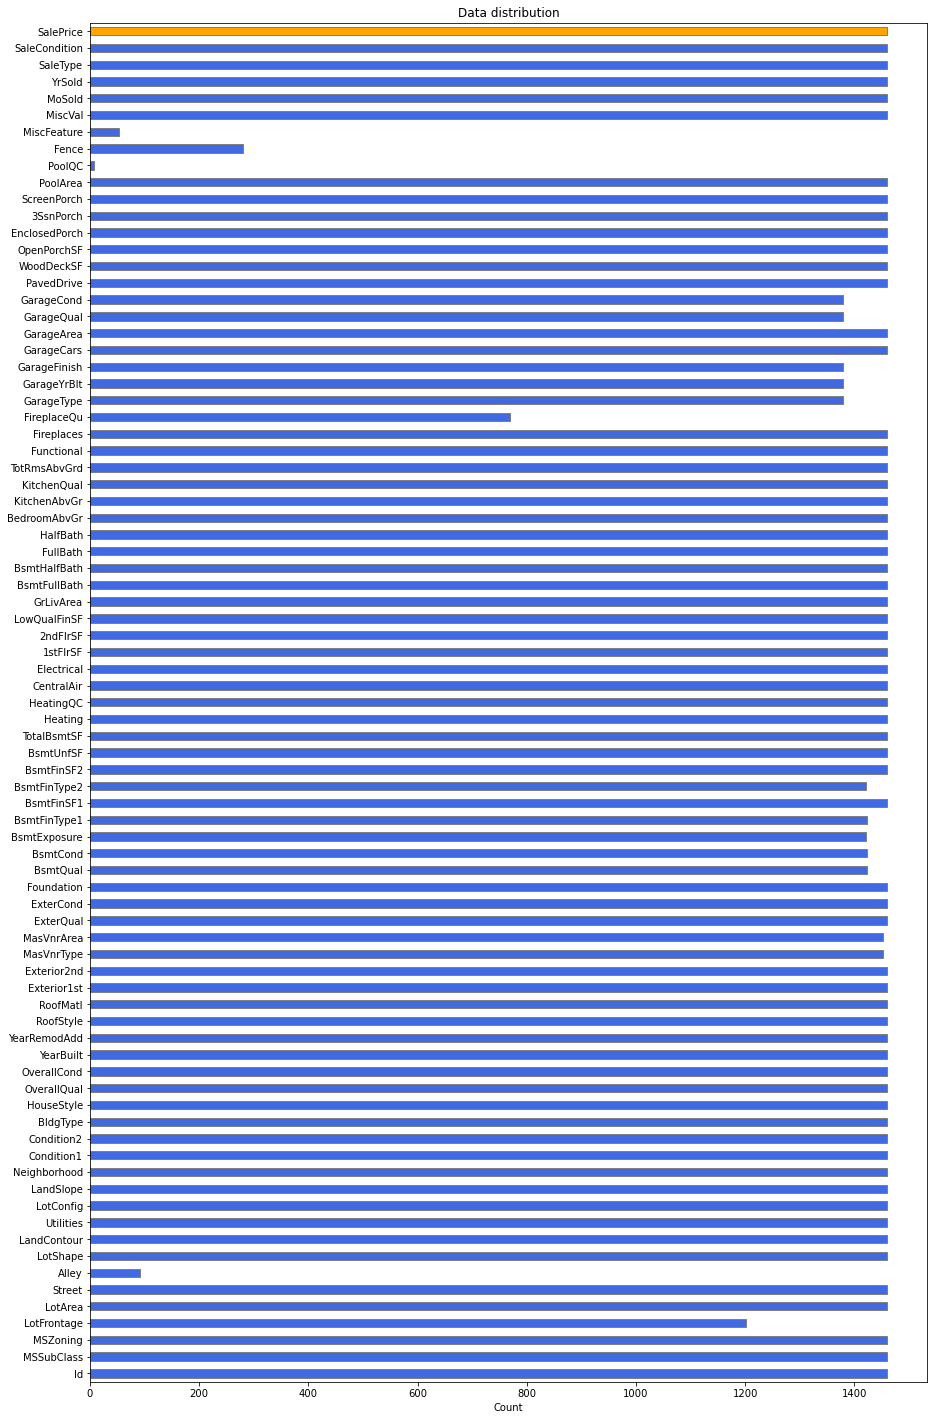

In [8]:
#Data distribution

count = df.notnull().sum()
color = ['royalblue']*80 #dependent variable
color.append('orange')

plt.figure(figsize=(15,25))
ax = count.plot.barh(color = color, edgecolor='gray')
plt.title('Data distribution')
plt.xlabel('Count')
plt.show()

From the data distribution we can infer certain information regarding each class:

- Out of all 80 variables, the following are represented in less than 20% of the dataset: **MiscFeature, Fence, PoolQC, Alley** (4). They will be analysed in order to deduce whether or not they are relevant to our model, but will most likely not be considered for the final model as they are so lowly represented.
- The following are represented in between around 50% and 96%: **GarageCond, GarageQual, GarageFinish, GarageYrBlt, GarageType, FireplaceQu, BsmtFinType2, BsmtFinType1, BsmtExposure, BsmtCond, BsmtQual, MasVnrArea, MasVnrType, LotFrontage** (14). These classes are significantly represented, so they should not be excluded.
- All the others are highly representative, therefore, all of them must be processed in order to take into account as many parameters as possible for the input of the models and see their influence on the final forecast.
- Finally, a reminder that the variable we aim to predict is **SalePrice**.

## Dataset Cleaning <a class="anchor" id="dataclean"></a>

The first step to take is to clean the dataset. As we saw previsouly, a lot of varibles have values missing, so it is necessary to standardize the dataset, check for duplicates and analyze outliers.

_**Duplicates**_

In [9]:
#Checking for duplicated values

duplicate = df[df.duplicated()] 
print("Duplicate Rows :") 
duplicate

Duplicate Rows :


Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

Our dataset appears to not have any duplicates!

***

_**Null values**_

In [10]:
#Handling null values
df.apply(lambda x: sum(x.isnull()),axis=0)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
#List out all columns that contain null values
nullcol = df.columns[df.isna().any()].tolist()
print('Columns containing null values:')
nullcol

Columns containing null values:


['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [12]:
df[nullcol].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

For the variables with low representation in the dataset, we will be removing them altogether:

In [13]:
df = df.drop(columns=['MiscFeature', 'Fence', 'PoolQC', 'Alley'])
nullcol.remove('MiscFeature')
nullcol.remove('Fence')
nullcol.remove('PoolQC')
nullcol.remove('Alley')

The values corresponding to type *object* will be replaced with 0:

In [14]:
df[['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','GarageYrBlt']] = df[['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','GarageYrBlt']].replace(np.nan, 0)

In [15]:
df[nullcol].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrType    1460 non-null   object 
 2   MasVnrArea    1452 non-null   float64
 3   BsmtQual      1460 non-null   object 
 4   BsmtCond      1460 non-null   object 
 5   BsmtExposure  1460 non-null   object 
 6   BsmtFinType1  1460 non-null   object 
 7   BsmtFinType2  1460 non-null   object 
 8   Electrical    1460 non-null   object 
 9   FireplaceQu   1460 non-null   object 
 10  GarageType    1460 non-null   object 
 11  GarageYrBlt   1460 non-null   float64
 12  GarageFinish  1460 non-null   object 
 13  GarageQual    1460 non-null   object 
 14  GarageCond    1460 non-null   object 
dtypes: float64(3), object(12)
memory usage: 171.2+ KB


The other values will be replace with the mean value:

In [16]:
for i in ['LotFrontage','MasVnrArea']:
    varMean = df[i].mean()
    df[i] = df[i].replace(np.nan, round(varMean))

In [17]:
df[nullcol].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1460 non-null   float64
 1   MasVnrType    1460 non-null   object 
 2   MasVnrArea    1460 non-null   float64
 3   BsmtQual      1460 non-null   object 
 4   BsmtCond      1460 non-null   object 
 5   BsmtExposure  1460 non-null   object 
 6   BsmtFinType1  1460 non-null   object 
 7   BsmtFinType2  1460 non-null   object 
 8   Electrical    1460 non-null   object 
 9   FireplaceQu   1460 non-null   object 
 10  GarageType    1460 non-null   object 
 11  GarageYrBlt   1460 non-null   float64
 12  GarageFinish  1460 non-null   object 
 13  GarageQual    1460 non-null   object 
 14  GarageCond    1460 non-null   object 
dtypes: float64(3), object(12)
memory usage: 171.2+ KB


In [18]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

In [19]:
nullcol = df.columns[df.isna().any()].tolist()
nullcol

[]

All null values have been removed!

***

_**Outliers**_

In [20]:
print(df['SalePrice'].quantile(0.10))
print(df['SalePrice'].quantile(0.90))

106475.0
278000.0


In [21]:
df[df['SalePrice']>350000]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
53      54          20       RL         68.0    50271   Pave      IR1   
58      59          60       RL         66.0    13682   Pave      IR2   
112    113          60       RL         77.0     9965   Pave      Reg   
151    152          20       RL        107.0    13891   Pave      Reg   
161    162          60       RL        110.0    13688   Pave      IR1   
178    179          20       RL         63.0    17423   Pave      IR1   
185    186          75       RM         90.0    22950   Pave      IR2   
224    225          20       RL        103.0    13472   Pave      Reg   
231    232          60       RL        174.0    15138   Pave      IR1   
278    279          20       RL        107.0    14450   Pave      Reg   
309    310          20       RL         90.0    12378   Pave      IR1   
313    314          20       RL        150.0   215245   Pave      IR3   
321    322          60       RL         99.0    12099   Pave      IR1   
336    337          20       RL         86.0    14157   Pave      IR1   
349    350          60       RL         56.0    20431   Pave      IR2   
378    379          20       RL         88.0    11394   Pave      Reg   
389    390          60       RL         96.0    12474   Pave      Reg   
440    441          20       RL        105.0    15431   Pave      Reg   
473    474          20       RL        110.0    14977   Pave      IR1   
477    478          60       RL        105.0    13693   Pave      Reg   
481    482          20       RL         72.0    11846   Pave      IR1   
496    497          20       RL         70.0    12692   Pave      IR1   
515    516          20       RL         94.0    12220   Pave      Reg   
527    528          60       RL         67.0    14948   Pave      IR1   
585    586          20       RL         88.0    11443   Pave      Reg   
591    592          60       RL         97.0    13478   Pave      IR1   
608    609          70       RL         78.0    12168   Pave      Reg   
644    645          20       FV         85.0     9187   Pave      Reg   
661    662          60       RL         52.0    46589   Pave      IR2   
664    665          20       RL         49.0    20896   Pave      IR2   
678    679          20       RL         80.0    11844   Pave      IR1   
688    689          20       RL         60.0     8089   Pave      Reg   
691    692          60       RL        104.0    21535   Pave      IR1   
702    703          60       RL         82.0    12438   Pave      IR1   
769    770          60       RL         47.0    53504   Pave      IR2   
774    775          20       RL        110.0    14226   Pave      Reg   
798    799          60       RL        104.0    13518   Pave      Reg   
803    804          60       RL        107.0    13891   Pave      Reg   
825    826          20       RL        114.0    14803   Pave      Reg   
898    899          20       RL        100.0    12919   Pave      IR1   
987    988          20       RL         83.0    10159   Pave      IR1   
1046  1047          60       RL         85.0    16056   Pave      IR1   
1142  1143          60       RL         77.0     9965   Pave      Reg   
1169  1170          60       RL        118.0    35760   Pave      IR1   
1181  1182         120       RM         64.0     5587   Pave      IR1   
1182  1183          60       RL        160.0    15623   Pave      IR1   
1228  1229         120       RL         65.0     8769   Pave      Reg   
1243  1244          20       RL        107.0    13891   Pave      Reg   
1267  1268          20       RL         89.0    13214   Pave      IR1   
1268  1269          50       RL         70.0    14100   Pave      IR1   
1353  1354          50       RL         56.0    14720   Pave      IR1   
1373  1374          20       RL         70.0    11400   Pave      Reg   
1388  1389          20       RL         42.0    14892   Pave      IR1   
1437  1438          20       RL         96.0    12444   Pave      

In [22]:
df = df.drop(df[df['SalePrice'] > 350000].index)

## Exploratory Data Analysis <a class="anchor" id="eda"></a>

Moving onto exploratory data analysis,each variables needs to be analysed to infer correlation with our target value. We also have 39 non-numerical variables with need to be analysed. In order to decide which variables will be considered when developing the model, we can represent the correlation between the variables in a **Pearson Correlation Matrix**:

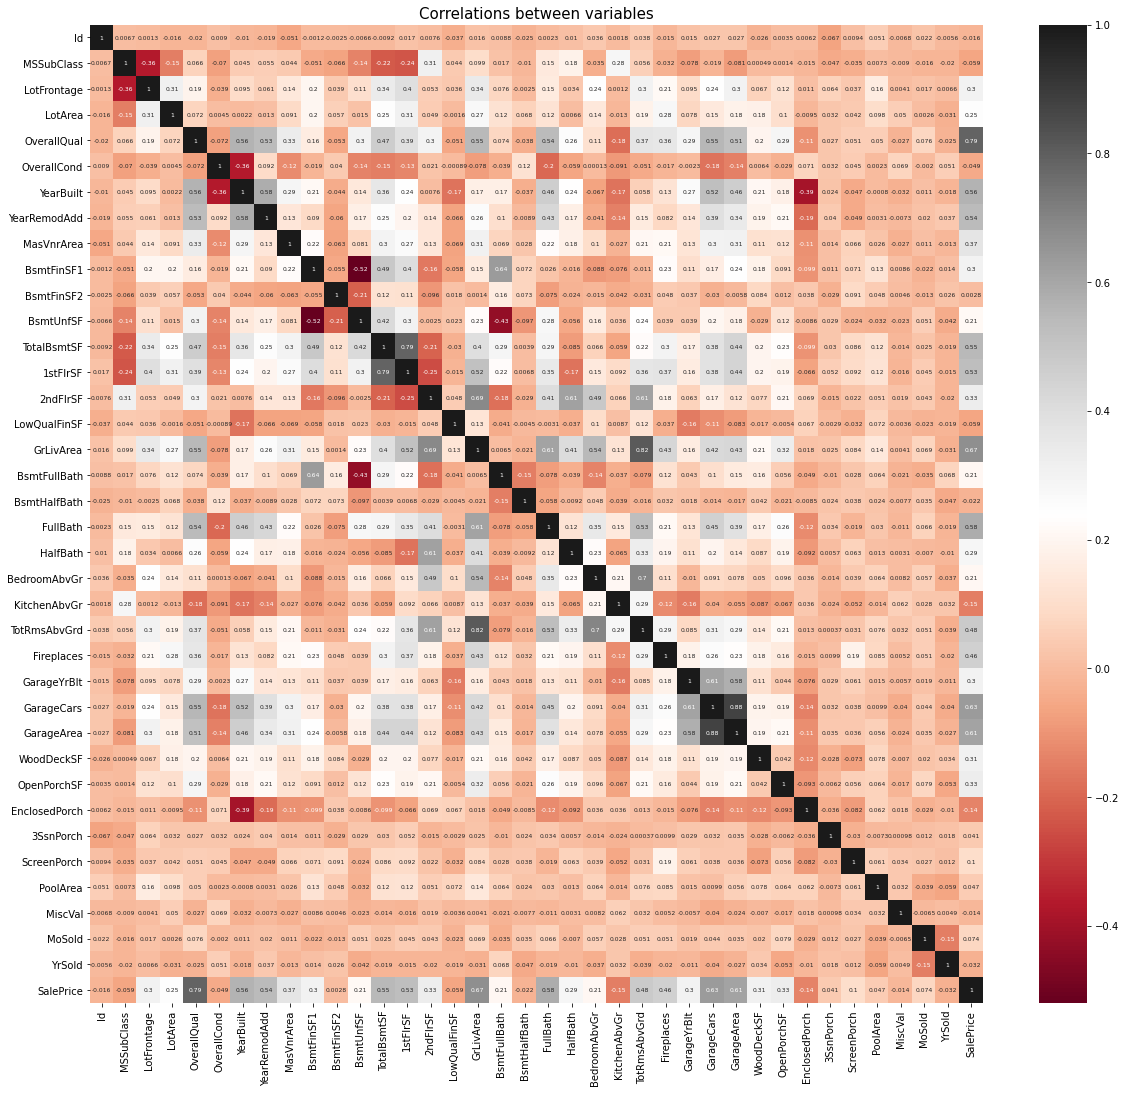

In [23]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot=True, cmap="RdGy", annot_kws={"size":6})
plt.title("Correlations between variables", size = 15)
plt.show()

This plot represent only the numerical values. According to the graph, the variables that have a correlation coefficient below 0 will be excluded as they do not provide information on the relationship between the two variables.

In [24]:
#Excluding variables with a negative correlation
df = df.drop(columns=['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch','MiscVal','YrSold','MoSold'])

_**Sale Price**_ - Price of the sale, target variable

count      1406.000000
mean     171111.937411
std       60364.233852
min       34900.000000
25%      129000.000000
50%      159975.000000
75%      205000.000000
max      350000.000000
Name: SalePrice, dtype: float64


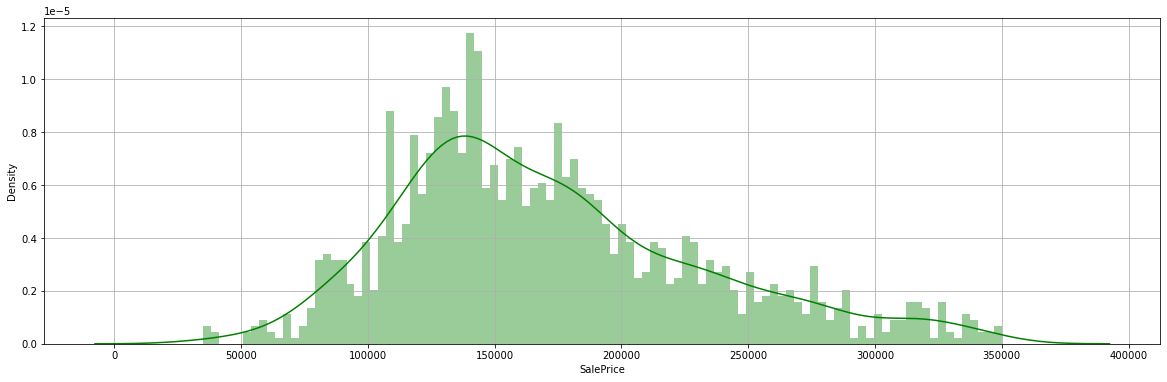

In [25]:
print(df['SalePrice'].describe())
plt.figure(figsize=(20, 6))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});
plt.grid()
plt.show()

**_Sale Condition_** - Condition of sale

In [26]:
salecondition = df['SalePrice'].groupby(df['SaleCondition']).mean()
salecondition2 = df['SalePrice'].groupby(df['SaleCondition']).count()

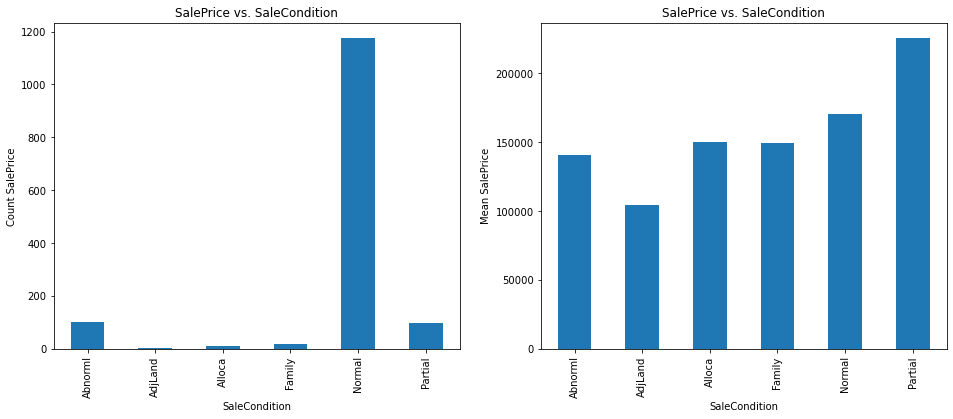

In [27]:
plt.subplot(1, 2, 2)
salecondition.plot(kind='bar', title='SalePrice vs. SaleCondition', xlabel='SaleCondition', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
salecondition2.plot(kind='bar', title='SalePrice vs. SaleCondition', xlabel='SaleCondition', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

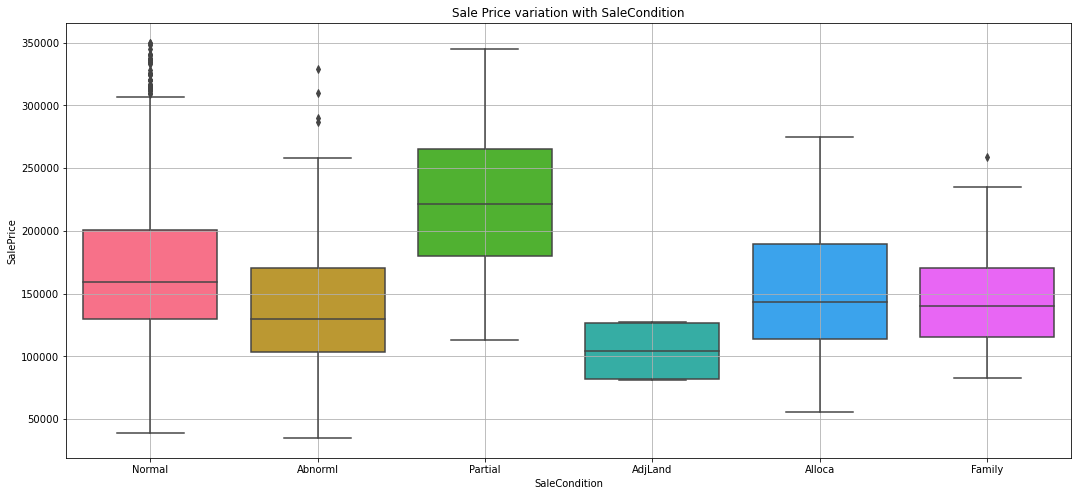

In [28]:
plt.figure(figsize=(18,8))
sns.boxplot(x='SaleCondition', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('SaleCondition')
plt.title('Sale Price variation with SaleCondition')
plt.grid()

**_Sale Type_** - Type of sale 

In [29]:
saletype = df['SalePrice'].groupby(df['SaleType']).mean()
saletype2 = df['SalePrice'].groupby(df['SaleType']).count()

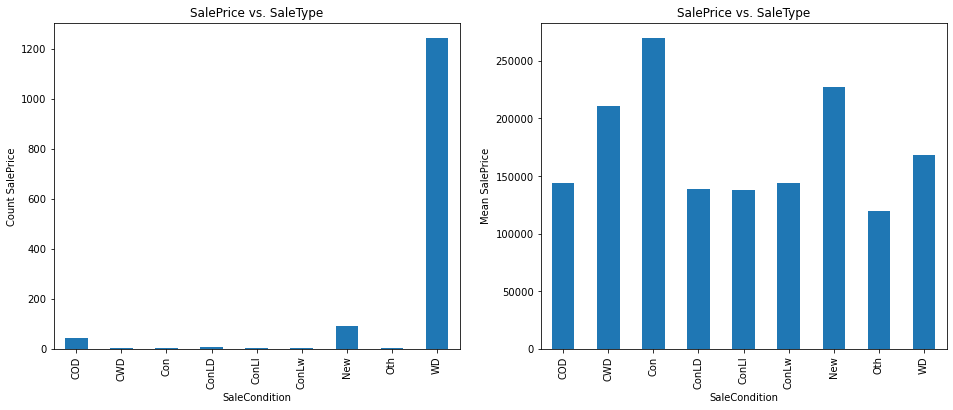

In [30]:
plt.subplot(1, 2, 2)
saletype.plot(kind='bar', title='SalePrice vs. SaleType', xlabel='SaleCondition', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
saletype2.plot(kind='bar', title='SalePrice vs. SaleType', xlabel='SaleCondition', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

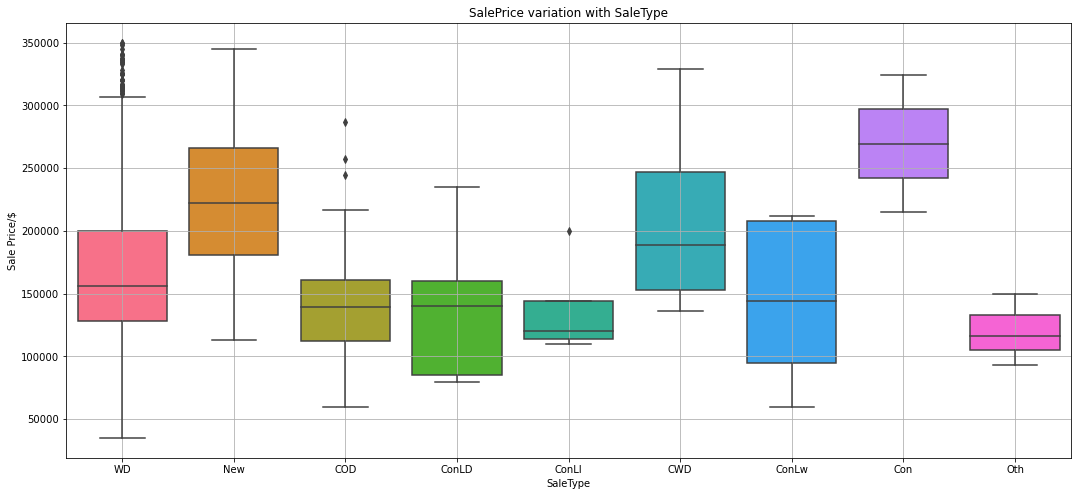

In [31]:
plt.figure(figsize=(18,8))
sns.boxplot(x='SaleType', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('SaleType')
plt.ylabel('Sale Price/$')
plt.title('SalePrice variation with SaleType')
plt.grid()

**_PoolArea_** - Pool area in square feet

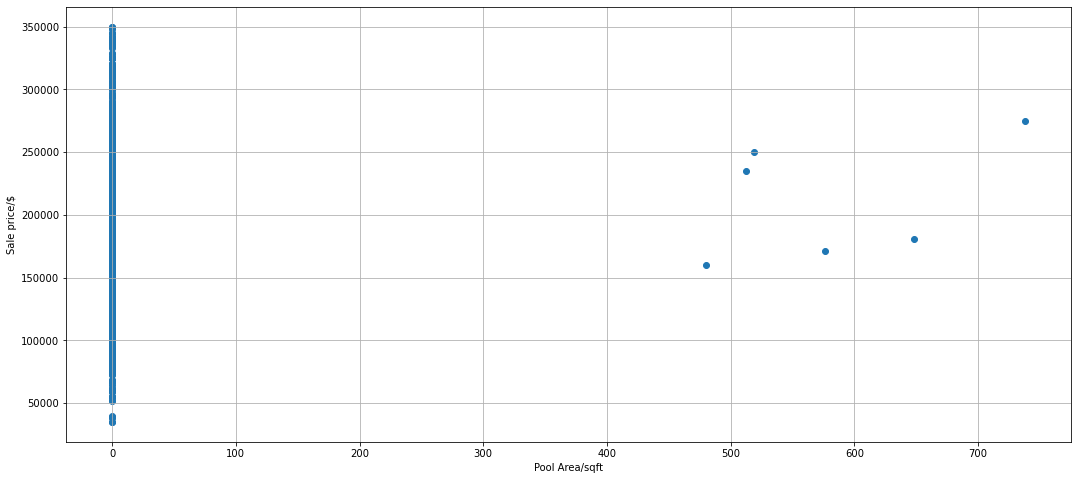

In [32]:
plt.figure(figsize=(18,8))
plt.scatter(df['PoolArea'], df['SalePrice'])
plt.xlabel('Pool Area/sqft')
plt.ylabel('Sale price/$')
plt.grid()
plt.show()

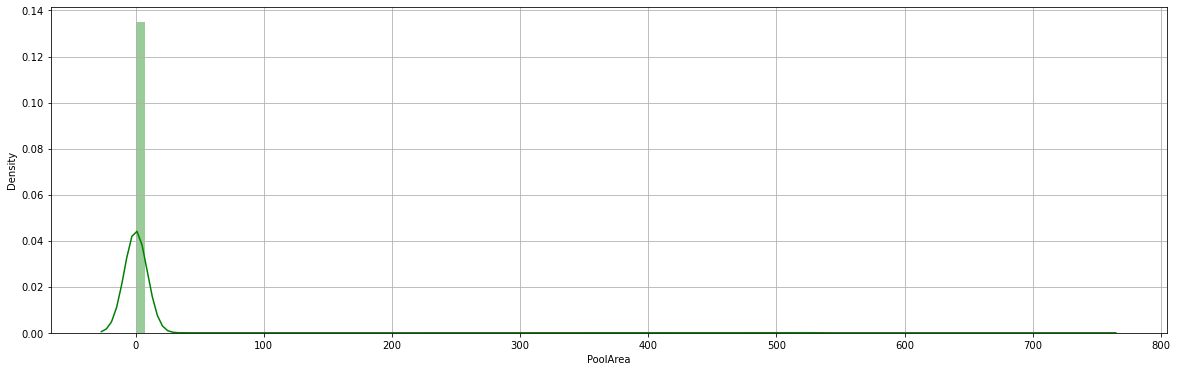

In [33]:
plt.figure(figsize=(20, 6))
sns.distplot(df['PoolArea'], color='g', bins=100, hist_kws={'alpha': 0.4});
plt.grid()
plt.show()

The correlation between the **PoolArea** and the **Sale Price** is difficult to determine since so many entries have it defined as zero, so it's best if we drop it from the dataset.

In [34]:
df = df.drop(columns = ['PoolArea'])

_**ScreenPorch**_ - Screen porch area in square feet

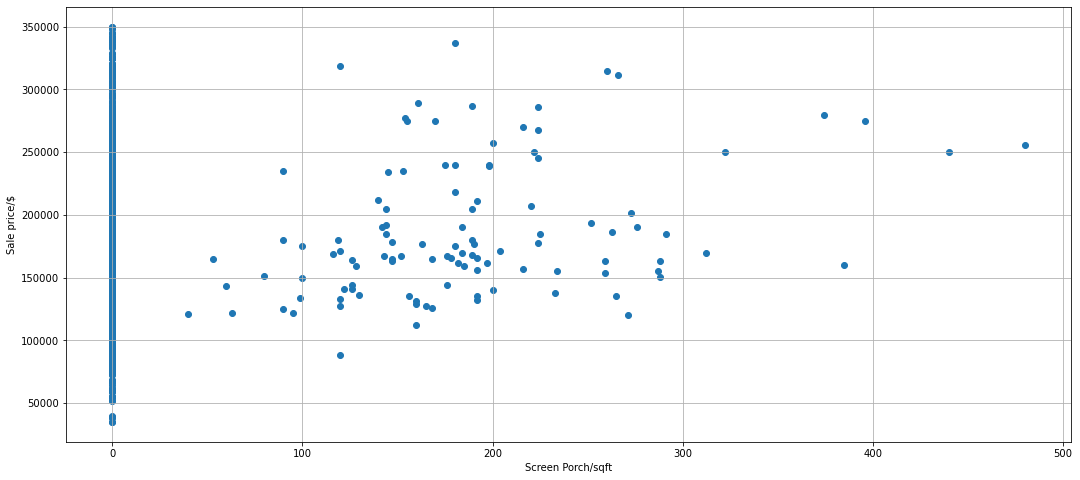

In [35]:
plt.figure(figsize=(18,8))
plt.scatter(df['ScreenPorch'], df['SalePrice'])
plt.xlabel('Screen Porch/sqft')
plt.ylabel('Sale price/$')
plt.grid()
plt.show()

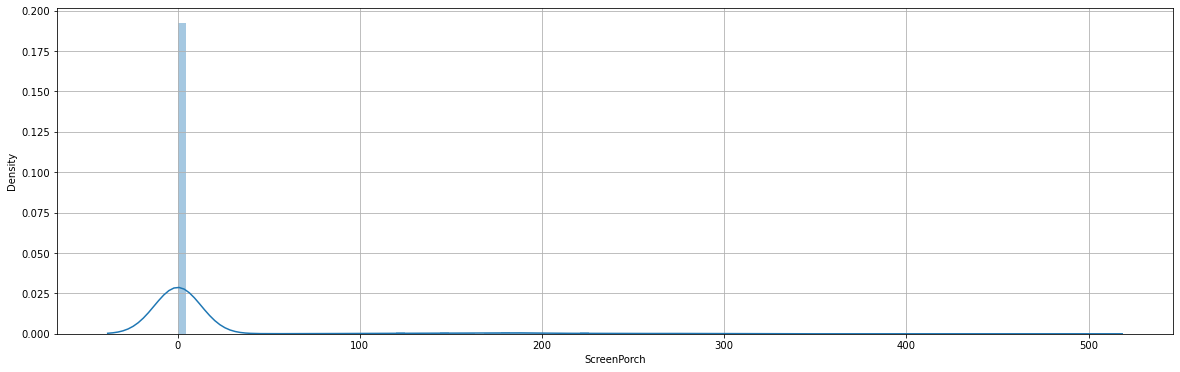

In [36]:
plt.figure(figsize=(20, 6))
sns.distplot(df['ScreenPorch'], bins=100, hist_kws={'alpha': 0.4});
plt.grid()
plt.show()

In [37]:
df = df.drop(columns = ['ScreenPorch'])

**_3SsnPorch_** - Three season porch area in square feet 

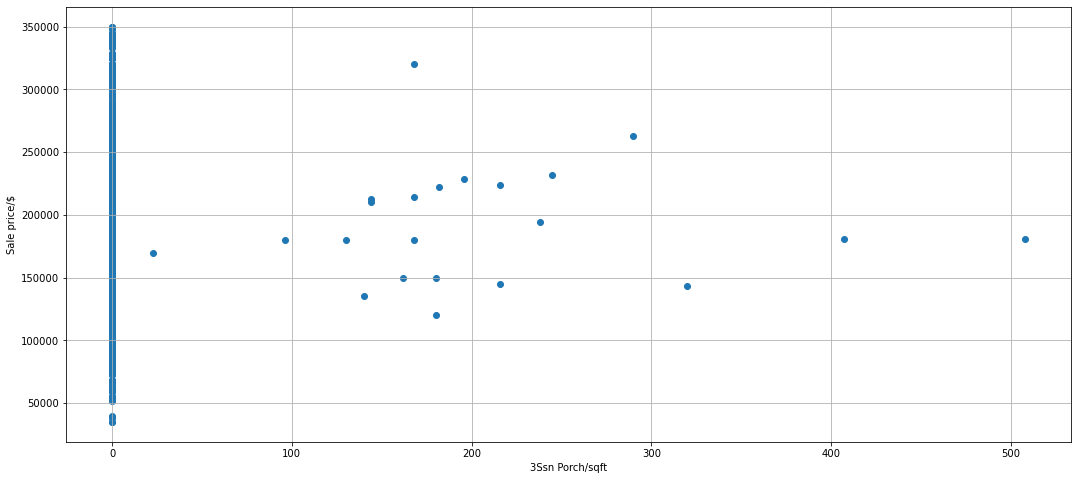

In [38]:
plt.figure(figsize=(18,8))
plt.scatter(df['3SsnPorch'], df['SalePrice'])
plt.xlabel('3Ssn Porch/sqft')
plt.ylabel('Sale price/$')
plt.grid()
plt.show()

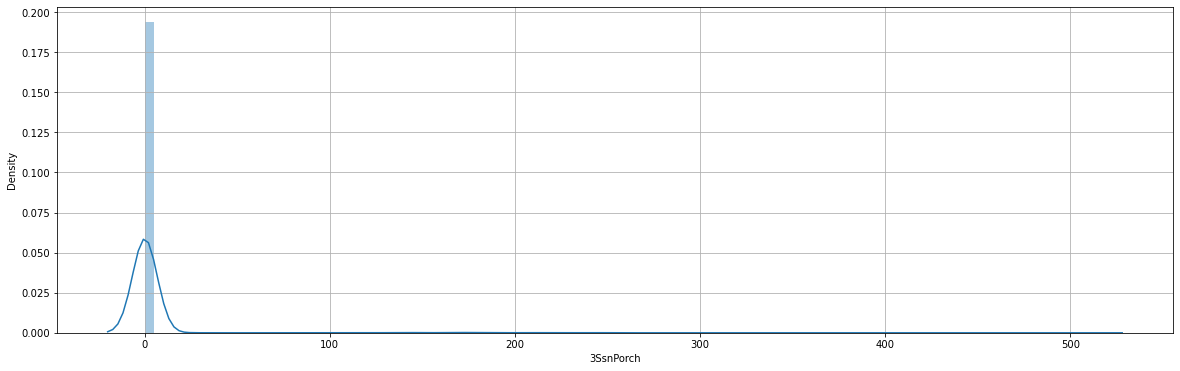

In [39]:
plt.figure(figsize=(20, 6))
sns.distplot(df['3SsnPorch'], bins=100, hist_kws={'alpha': 0.4});
plt.grid()
plt.show()

In [40]:
df = df.drop(columns = ['3SsnPorch'])

_**OpenPorchSF**_ - Open porch area in square feet

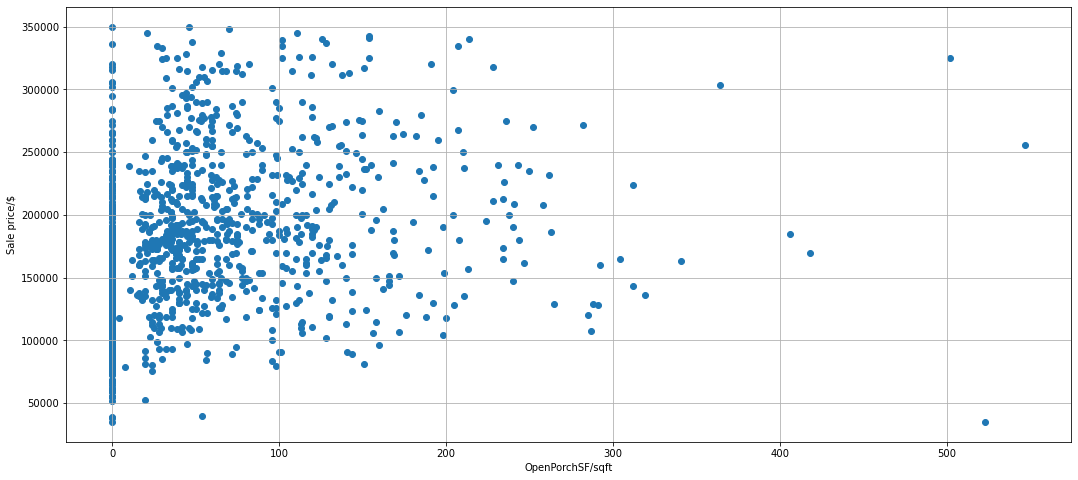

In [41]:
plt.figure(figsize=(18,8))
plt.scatter(df['OpenPorchSF'], df['SalePrice'])
plt.xlabel('OpenPorchSF/sqft')
plt.ylabel('Sale price/$')
plt.grid()
plt.show()

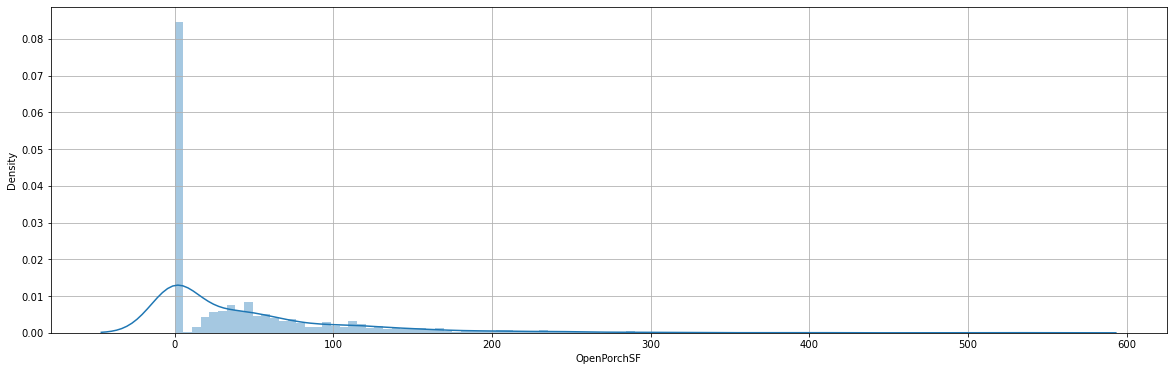

In [42]:
plt.figure(figsize=(20, 6))
sns.distplot(df['OpenPorchSF'], bins=100, hist_kws={'alpha': 0.4});
plt.grid()
plt.show()

In [43]:
df = df.drop(columns = ['OpenPorchSF'])

**_WoodDeckSF_** - Wood deck area in square feet

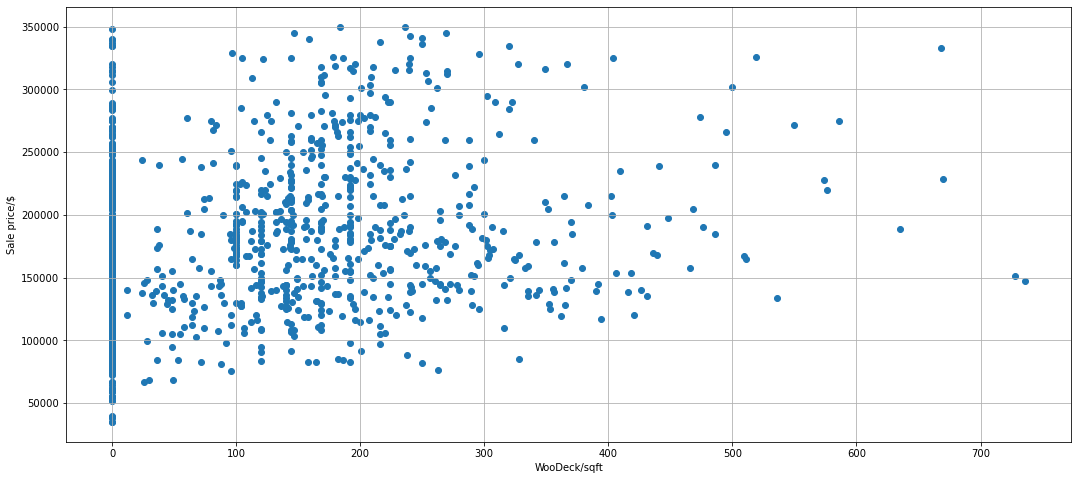

In [44]:
plt.figure(figsize=(18,8))
plt.scatter(df['WoodDeckSF'], df['SalePrice'])
plt.xlabel('WooDeck/sqft')
plt.ylabel('Sale price/$')
plt.grid()
plt.show()

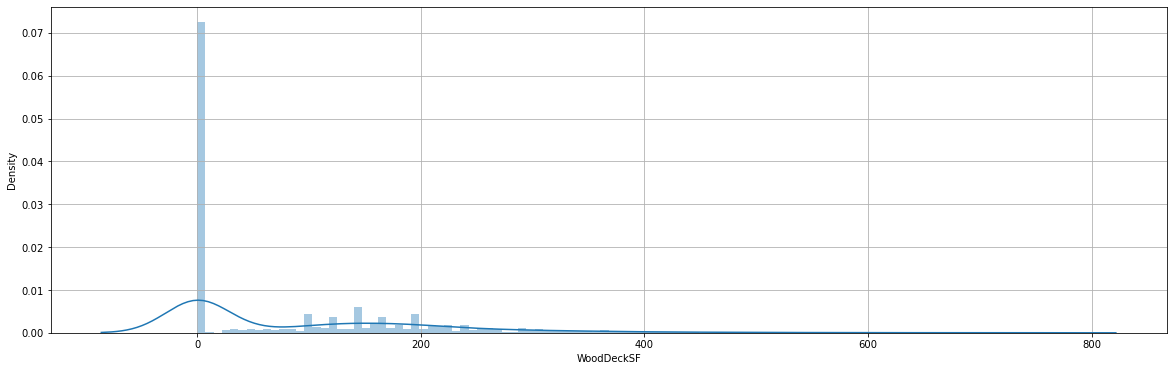

In [45]:
plt.figure(figsize=(20, 6))
sns.distplot(df['WoodDeckSF'], bins=100, hist_kws={'alpha': 0.4});
plt.grid()
plt.show()

In [46]:
df = df.drop(columns = ['WoodDeckSF'])

_**PavedDrive**_ - Paved driveway 

In [47]:
paved = df['SalePrice'].groupby(df['PavedDrive']).mean()
paved2 = df['SalePrice'].groupby(df['PavedDrive']).count()

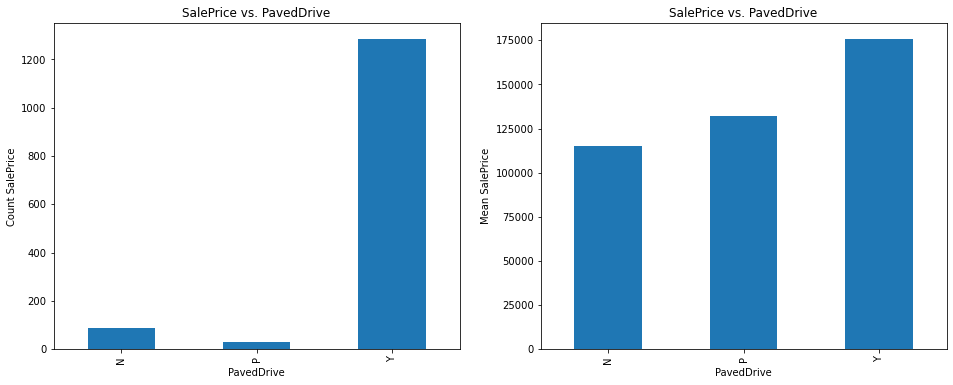

In [48]:
plt.subplot(1, 2, 2)
paved.plot(kind='bar', title='SalePrice vs. PavedDrive', xlabel='PavedDrive', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
paved2.plot(kind='bar', title='SalePrice vs. PavedDrive', xlabel='PavedDrive', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

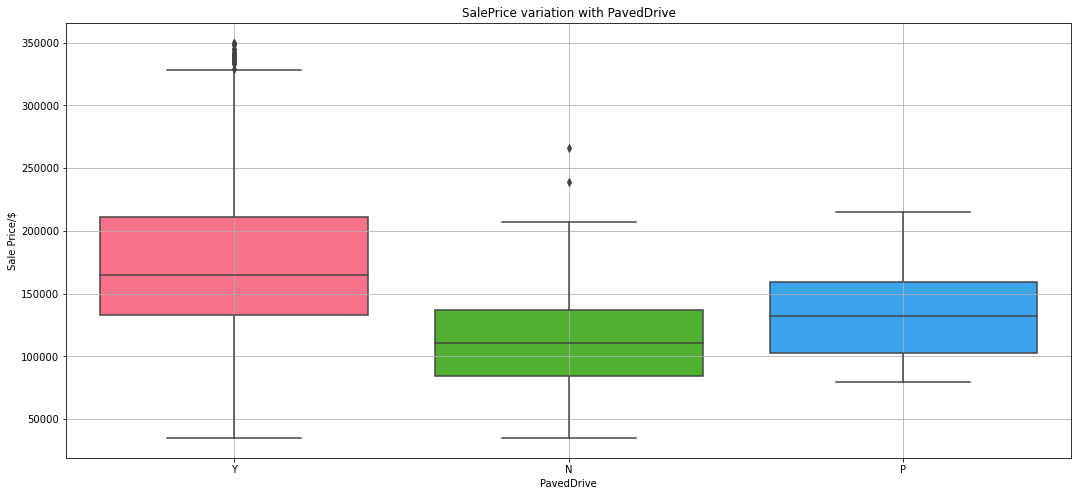

In [49]:
plt.figure(figsize=(18,8))
sns.boxplot(x='PavedDrive', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('PavedDrive')
plt.ylabel('Sale Price/$')
plt.title('SalePrice variation with PavedDrive')
plt.grid()

_**GarageCond**_ - Garage condition

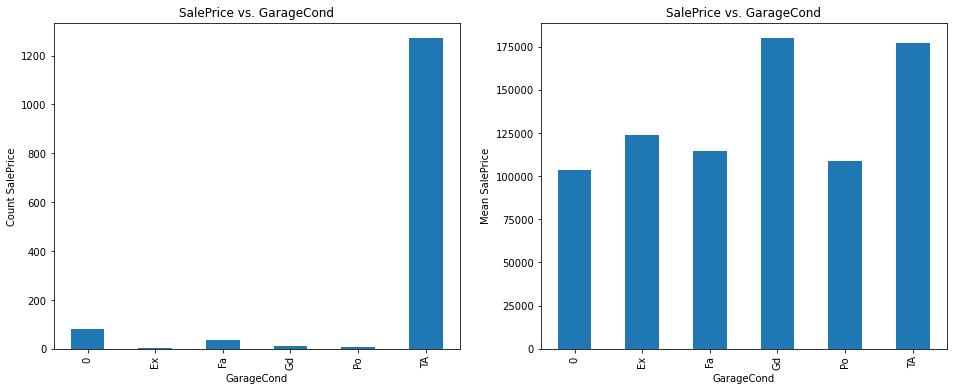

In [50]:
garacond = df['SalePrice'].groupby(df['GarageCond']).mean()
garacond2 = df['SalePrice'].groupby(df['GarageCond']).count()

plt.subplot(1, 2, 2)
garacond.plot(kind='bar', title='SalePrice vs. GarageCond', xlabel='GarageCond', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
garacond2.plot(kind='bar', title='SalePrice vs. GarageCond', xlabel='GarageCond', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

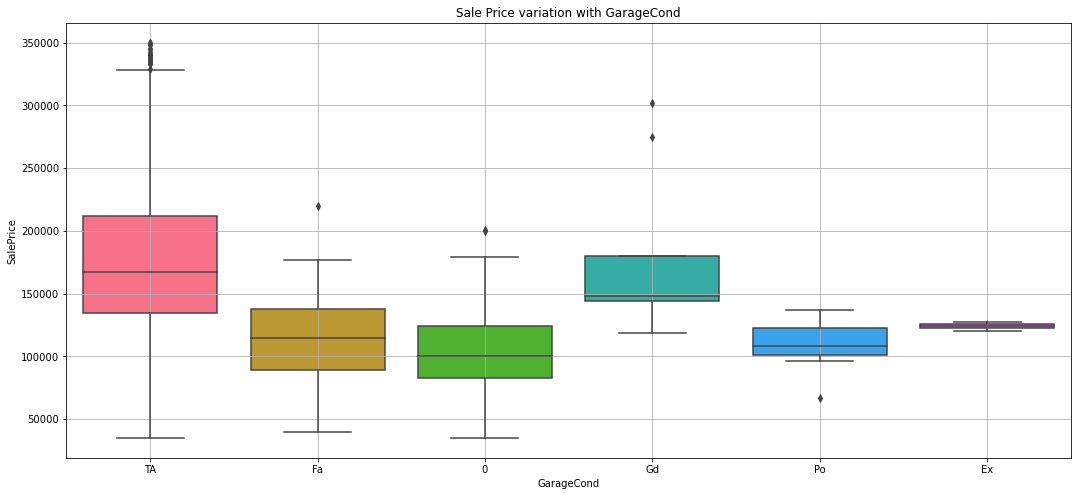

In [51]:
plt.figure(figsize=(18,8))
sns.boxplot(x='GarageCond', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('GarageCond')
plt.title('Sale Price variation with GarageCond')
plt.grid()

**_GarageQual_** - Garage quality

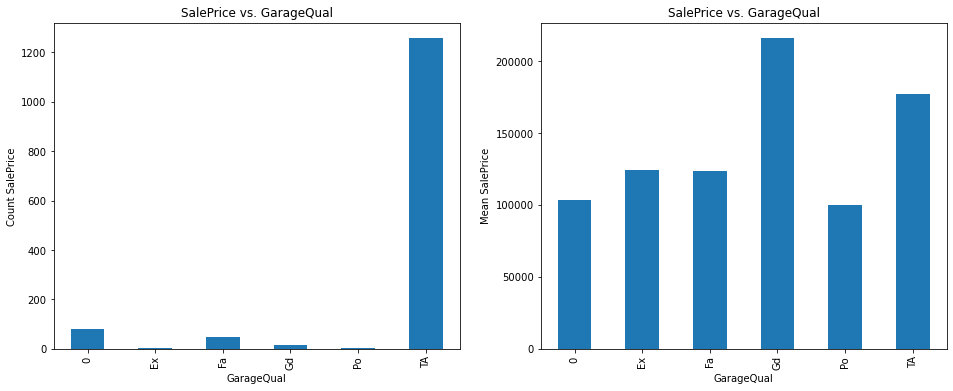

In [52]:
garaqual = df['SalePrice'].groupby(df['GarageQual']).mean()
garaqual2 = df['SalePrice'].groupby(df['GarageQual']).count()

plt.subplot(1, 2, 2)
garaqual.plot(kind='bar', title='SalePrice vs. GarageQual', xlabel='GarageQual', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
garaqual2.plot(kind='bar', title='SalePrice vs. GarageQual', xlabel='GarageQual', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

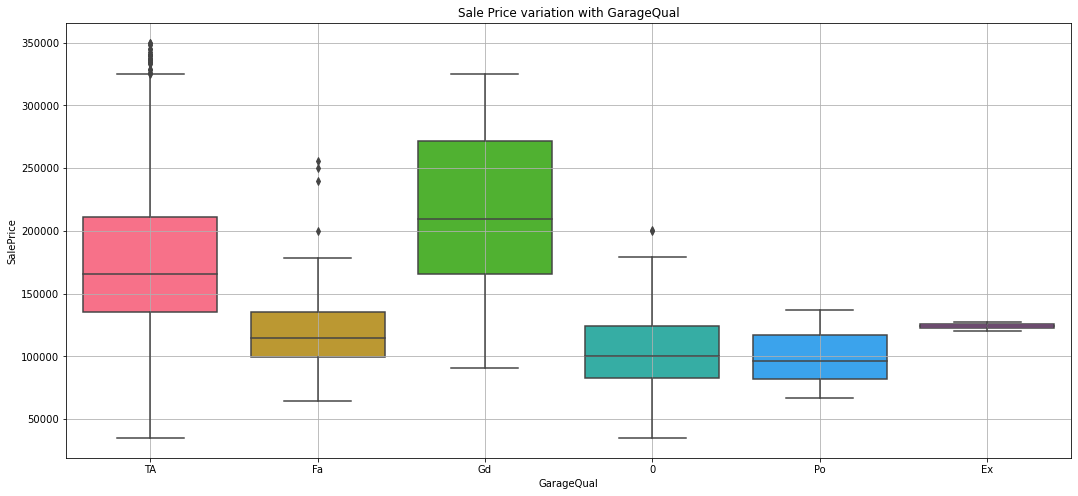

In [53]:
plt.figure(figsize=(18,8))
sns.boxplot(x='GarageQual', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('GarageQual')
plt.title('Sale Price variation with GarageQual')
plt.grid()

_**GarageArea**_ - Size of garage in square feet

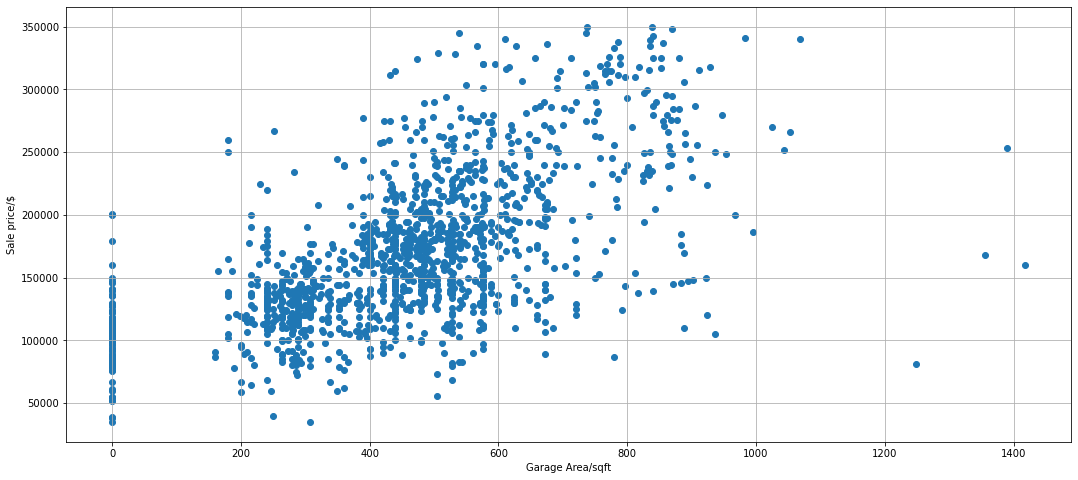

In [54]:
plt.figure(figsize=(18,8))
plt.scatter(df['GarageArea'], df['SalePrice'])
plt.xlabel('Garage Area/sqft')
plt.ylabel('Sale price/$')
plt.grid()
plt.show()

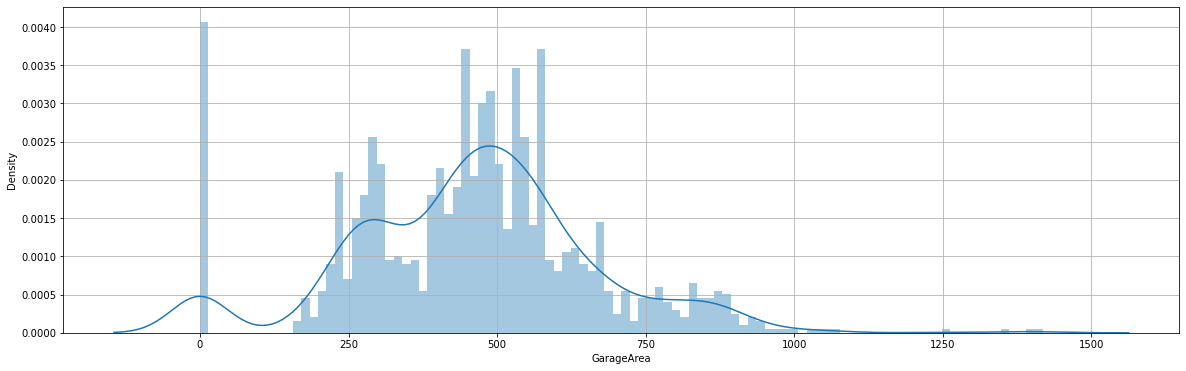

In [55]:
plt.figure(figsize=(20, 6))
sns.distplot(df['GarageArea'], bins=100, hist_kws={'alpha': 0.4});
plt.grid()
plt.show()

_**GarageCars**_ - Size of garage in car capacity

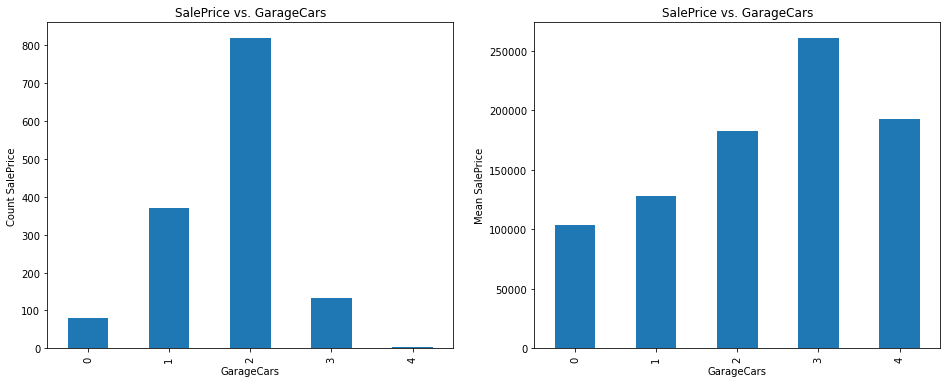

In [56]:
garacar = df['SalePrice'].groupby(df['GarageCars']).mean()
garacar2 = df['SalePrice'].groupby(df['GarageCars']).count()

plt.subplot(1, 2, 2)
garacar.plot(kind='bar', title='SalePrice vs. GarageCars', xlabel='GarageCars', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
garacar2.plot(kind='bar', title='SalePrice vs. GarageCars', xlabel='GarageCars', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

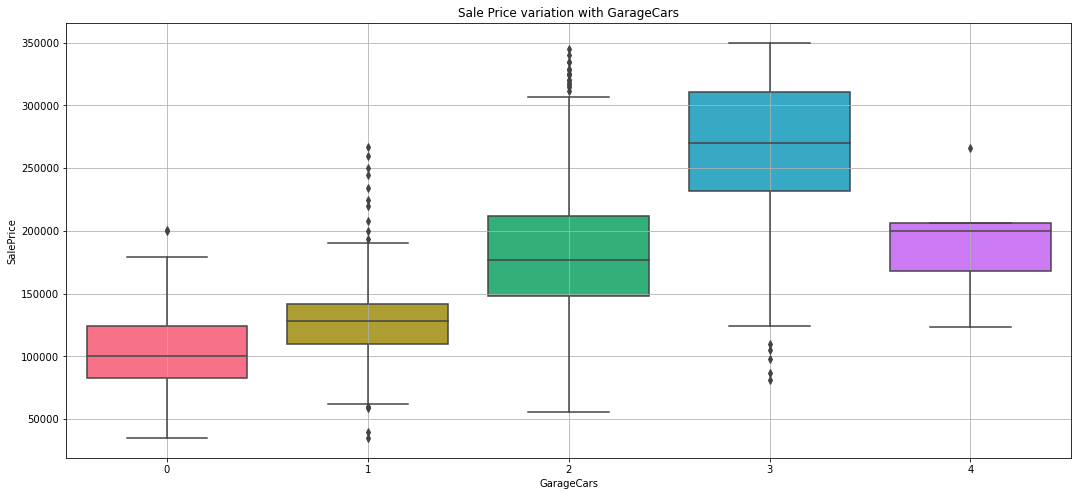

In [57]:
plt.figure(figsize=(18,8))
sns.boxplot(x='GarageCars', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('GarageCars')
plt.title('Sale Price variation with GarageCars')
plt.grid()

_**GarageFinish**_ - Interior finish of the garage

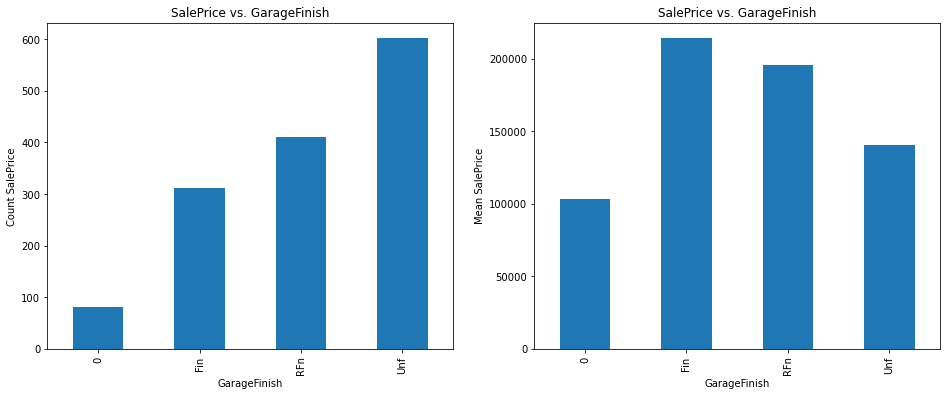

In [58]:
garafin = df['SalePrice'].groupby(df['GarageFinish']).mean()
garafin2 = df['SalePrice'].groupby(df['GarageFinish']).count()

plt.subplot(1, 2, 2)
garafin.plot(kind='bar', title='SalePrice vs. GarageFinish', xlabel='GarageFinish', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
garafin2.plot(kind='bar', title='SalePrice vs. GarageFinish', xlabel='GarageFinish', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

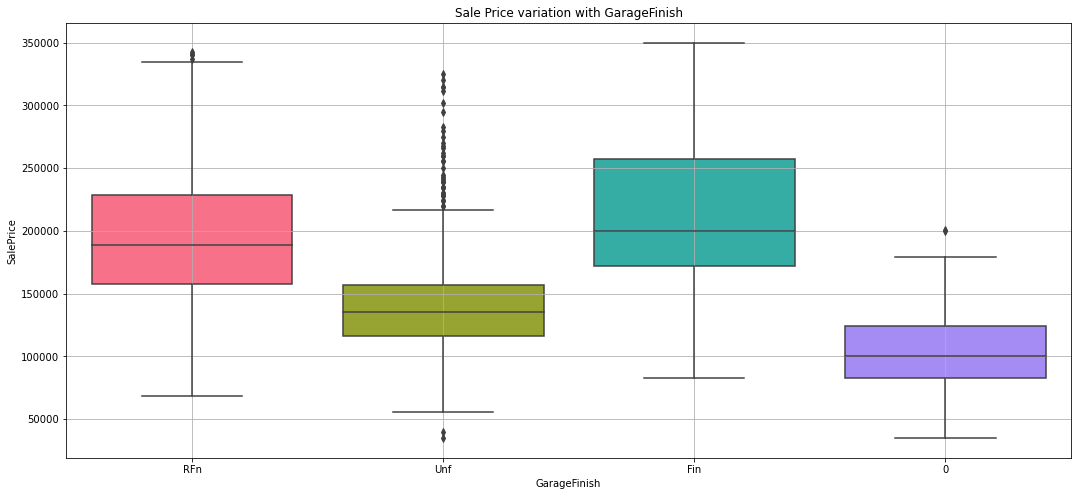

In [59]:
plt.figure(figsize=(18,8))
sns.boxplot(x='GarageFinish', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('GarageFinish')
plt.title('Sale Price variation with GarageFinish')
plt.grid()

_**GarageYrBlt**_ - Year garage was built

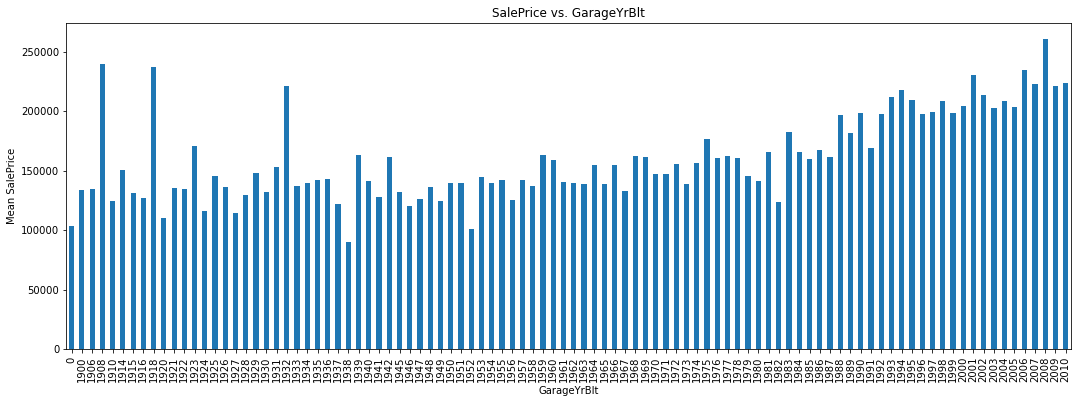

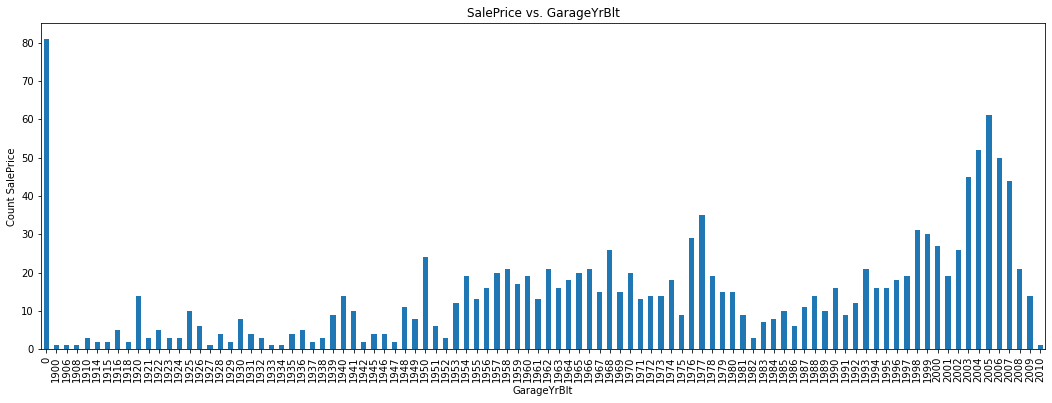

In [60]:
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int) 

garayr = df['SalePrice'].groupby(df['GarageYrBlt']).mean()
garayr2 = df['SalePrice'].groupby(df['GarageYrBlt']).count()

garayr.plot(kind='bar', title='SalePrice vs. GarageYrBlt', xlabel='GarageYrBlt', ylabel='Mean SalePrice', figsize=(18, 6))
plt.show()
garayr2.plot(kind='bar', title='SalePrice vs. GarageYrBlt', xlabel='GarageYrBlt', ylabel='Count SalePrice', figsize=(18, 6))
plt.show()

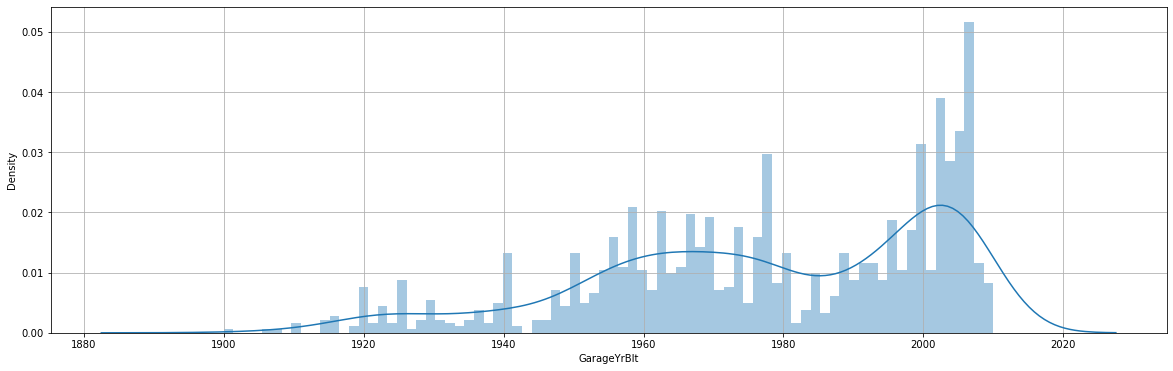

In [61]:
plt.figure(figsize=(20, 6))
sns.distplot(df['GarageYrBlt'][df['GarageYrBlt']>1800], bins=80, hist_kws={'alpha': 0.4});
plt.grid()
plt.show()

_**GarageType**_ - Garage location

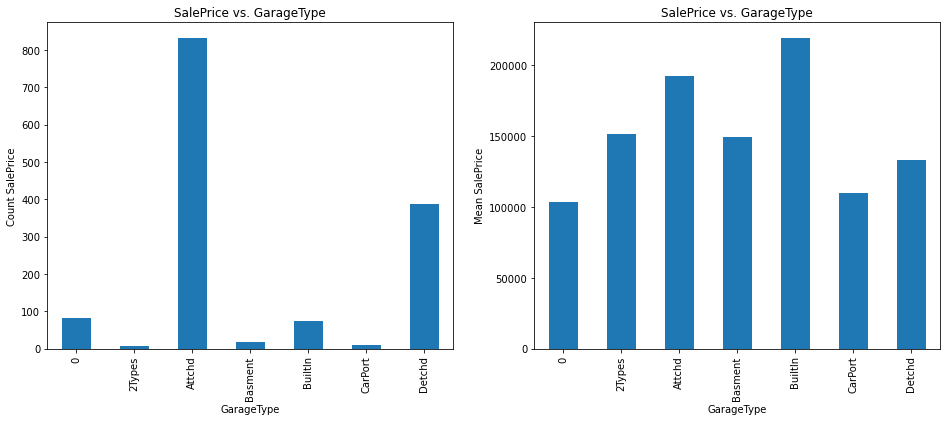

In [62]:
garat = df['SalePrice'].groupby(df['GarageType']).mean()
garat2 = df['SalePrice'].groupby(df['GarageType']).count()

plt.subplot(1, 2, 2)
garat.plot(kind='bar', title='SalePrice vs. GarageType', xlabel='GarageType', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
garat2.plot(kind='bar', title='SalePrice vs. GarageType', xlabel='GarageType', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

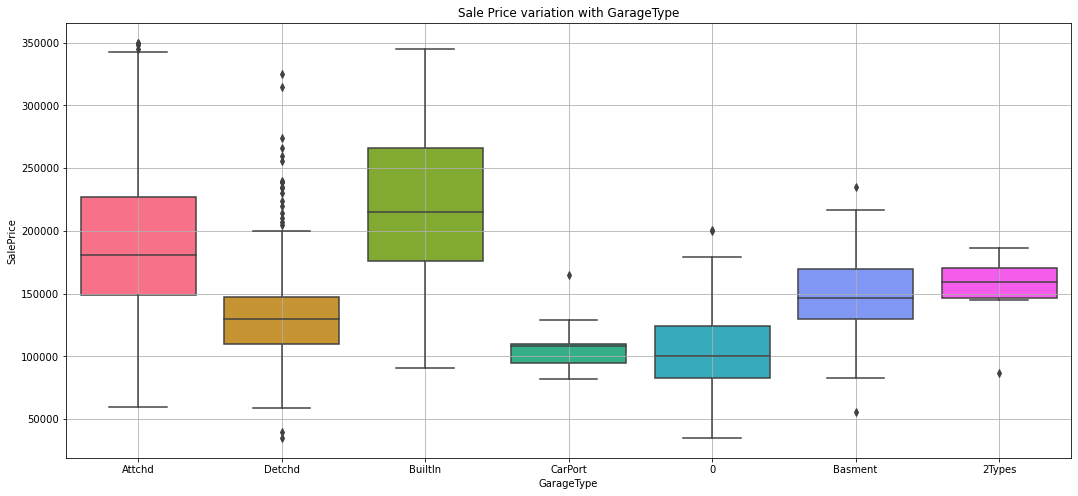

In [63]:
plt.figure(figsize=(18,8))
sns.boxplot(x='GarageType', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('GarageType')
plt.title('Sale Price variation with GarageType')
plt.grid()

_**FireplaceQu**_ - Fireplace quality

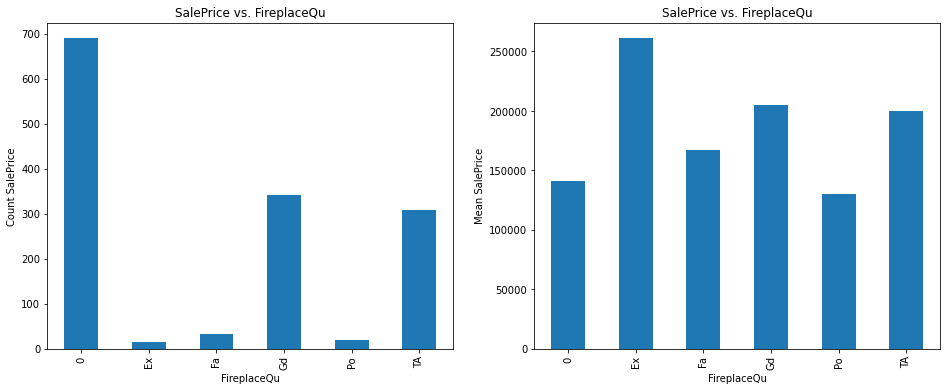

In [64]:
fire = df['SalePrice'].groupby(df['FireplaceQu']).mean()
fire2 = df['SalePrice'].groupby(df['FireplaceQu']).count()

plt.subplot(1, 2, 2)
fire.plot(kind='bar', title='SalePrice vs. FireplaceQu', xlabel='FireplaceQu', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
fire2.plot(kind='bar', title='SalePrice vs. FireplaceQu', xlabel='FireplaceQu', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

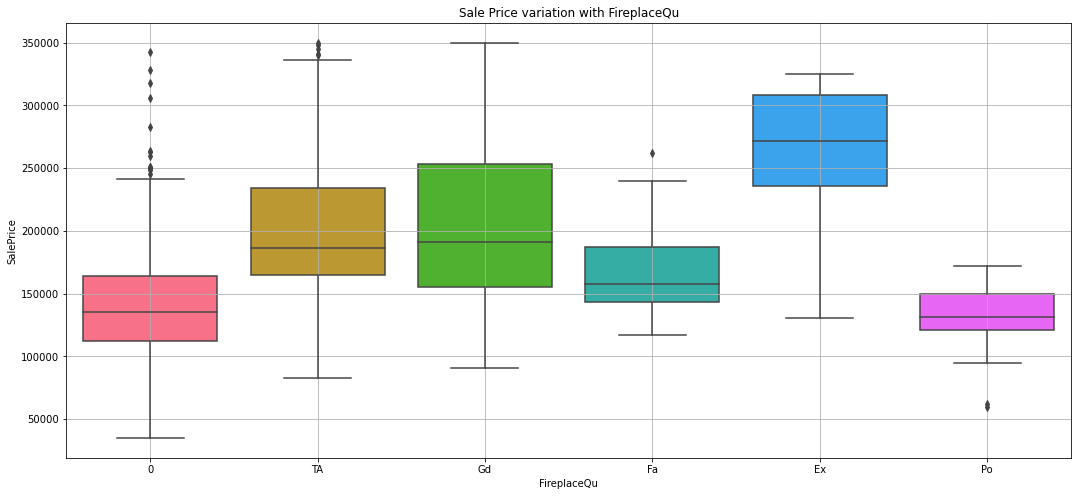

In [65]:
plt.figure(figsize=(18,8))
sns.boxplot(x='FireplaceQu', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('FireplaceQu')
plt.title('Sale Price variation with FireplaceQu')
plt.grid()

_**Fireplaces**_ - Number of fireplaces 

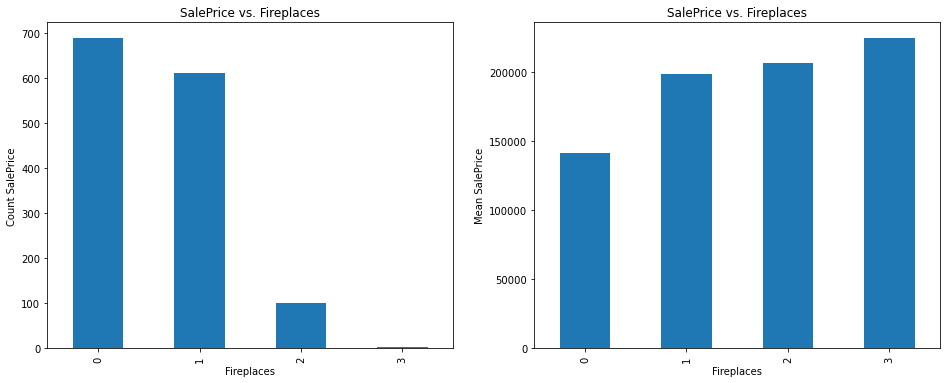

In [66]:
firen = df['SalePrice'].groupby(df['Fireplaces']).mean()
firen2 = df['SalePrice'].groupby(df['Fireplaces']).count()

plt.subplot(1, 2, 2)
firen.plot(kind='bar', title='SalePrice vs. Fireplaces', xlabel='Fireplaces', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
firen2.plot(kind='bar', title='SalePrice vs. Fireplaces', xlabel='Fireplaces', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

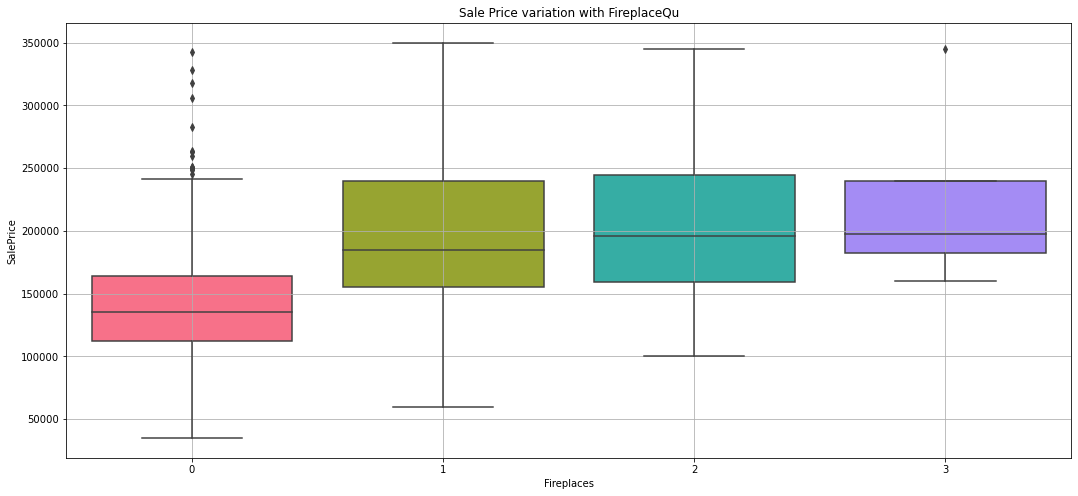

In [67]:
plt.figure(figsize=(18,8))
sns.boxplot(x='Fireplaces', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('Fireplaces')
plt.title('Sale Price variation with FireplaceQu')
plt.grid()

_**Functional**_ - Home functionality

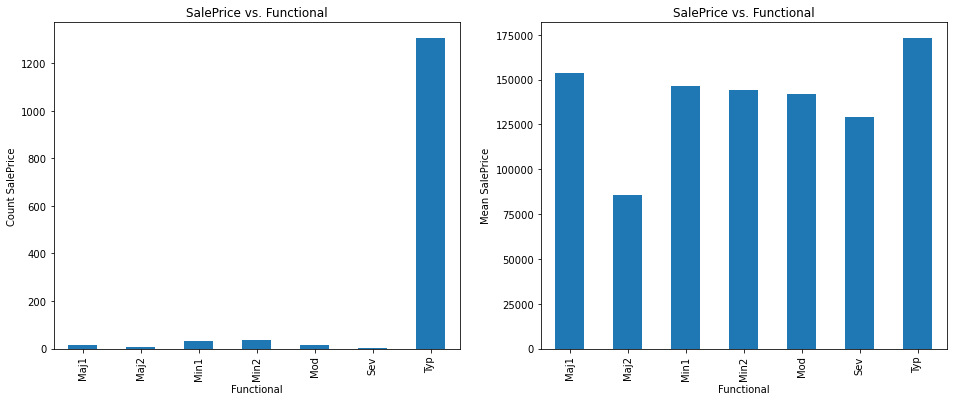

In [68]:
func = df['SalePrice'].groupby(df['Functional']).mean()
func2 = df['SalePrice'].groupby(df['Functional']).count()

plt.subplot(1, 2, 2)
func.plot(kind='bar', title='SalePrice vs. Functional', xlabel='Functional', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
func2.plot(kind='bar', title='SalePrice vs. Functional', xlabel='Functional', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

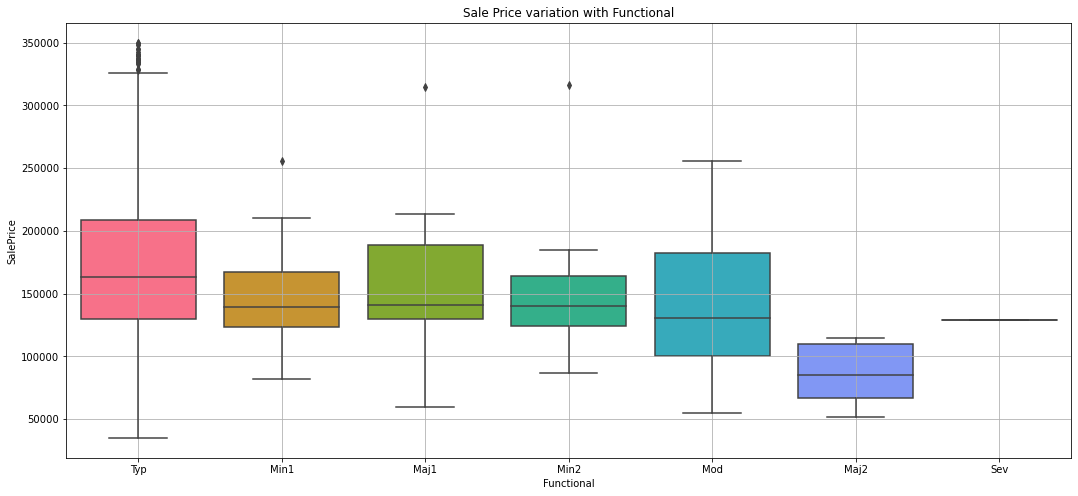

In [69]:
plt.figure(figsize=(18,8))
sns.boxplot(x='Functional', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('Functional')
plt.title('Sale Price variation with Functional')
plt.grid()

In [70]:
df = df.drop(columns=['Functional'])

_**TotRmsAbvGrd**_ - Total rooms above grade (does not include bathrooms)

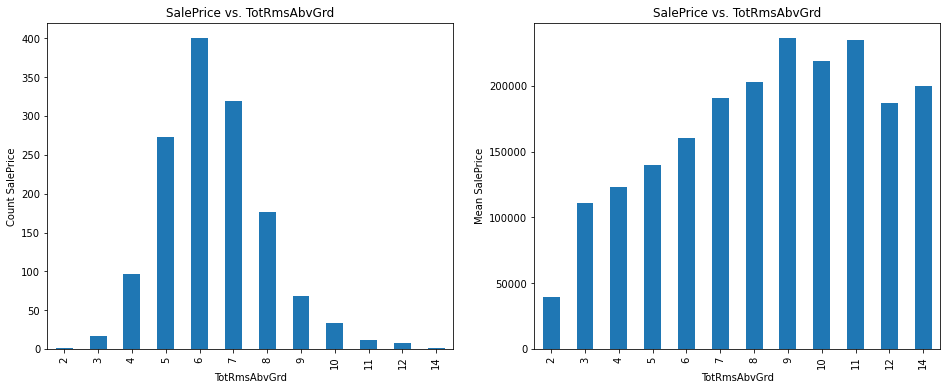

In [71]:
tot = df['SalePrice'].groupby(df['TotRmsAbvGrd']).mean()
tot2 = df['SalePrice'].groupby(df['TotRmsAbvGrd']).count()

plt.subplot(1, 2, 2)
tot.plot(kind='bar', title='SalePrice vs. TotRmsAbvGrd', xlabel='TotRmsAbvGrd', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
tot2.plot(kind='bar', title='SalePrice vs. TotRmsAbvGrd', xlabel='TotRmsAbvGrd', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

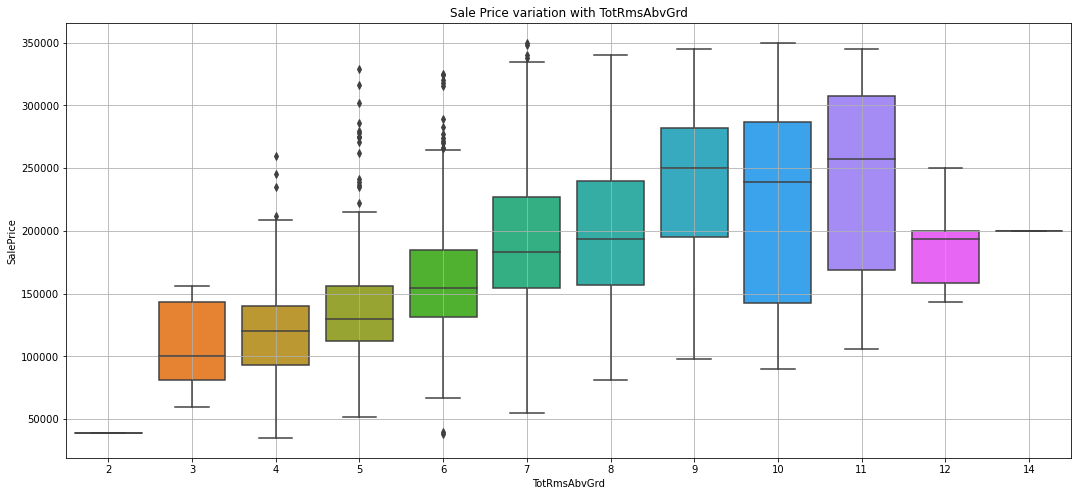

In [72]:
plt.figure(figsize=(18,8))
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('TotRmsAbvGrd')
plt.title('Sale Price variation with TotRmsAbvGrd')
plt.grid()

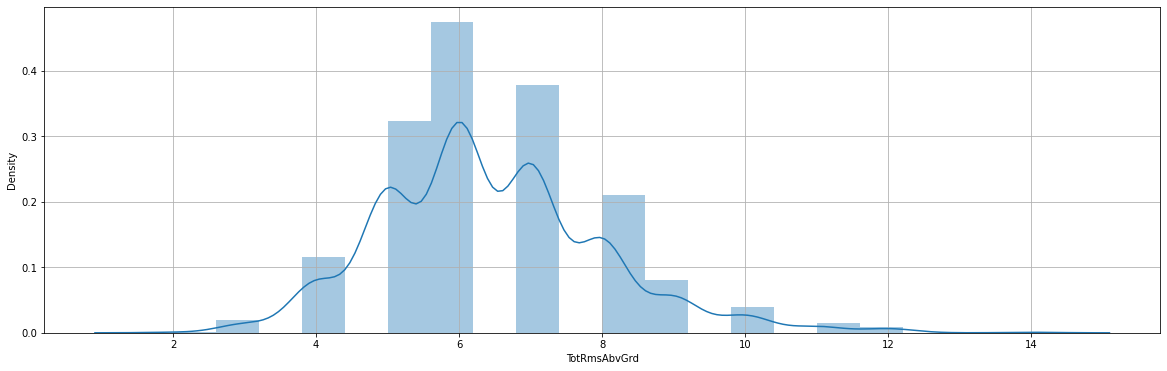

In [73]:
plt.figure(figsize=(20, 6))
sns.distplot(df['TotRmsAbvGrd'], bins=20, hist_kws={'alpha': 0.4});
plt.grid()
plt.show()

_**KitchenQual**_ - Kitchen quality

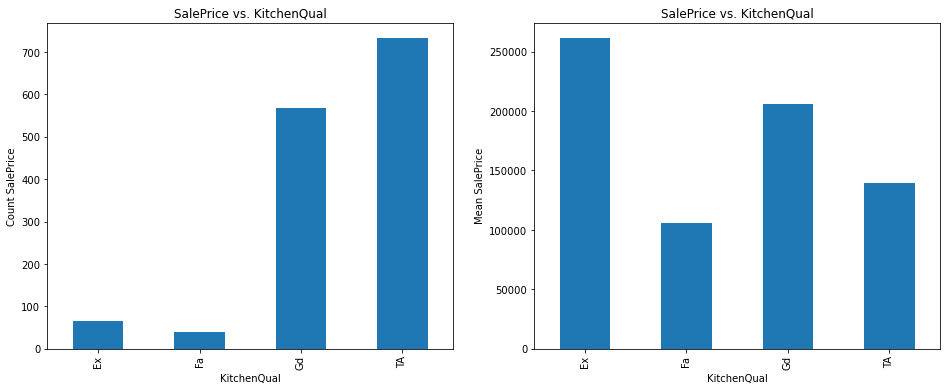

In [74]:
kit = df['SalePrice'].groupby(df['KitchenQual']).mean()
kit2 = df['SalePrice'].groupby(df['KitchenQual']).count()

plt.subplot(1, 2, 2)
kit.plot(kind='bar', title='SalePrice vs. KitchenQual', xlabel='KitchenQual', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
kit2.plot(kind='bar', title='SalePrice vs. KitchenQual', xlabel='KitchenQual', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

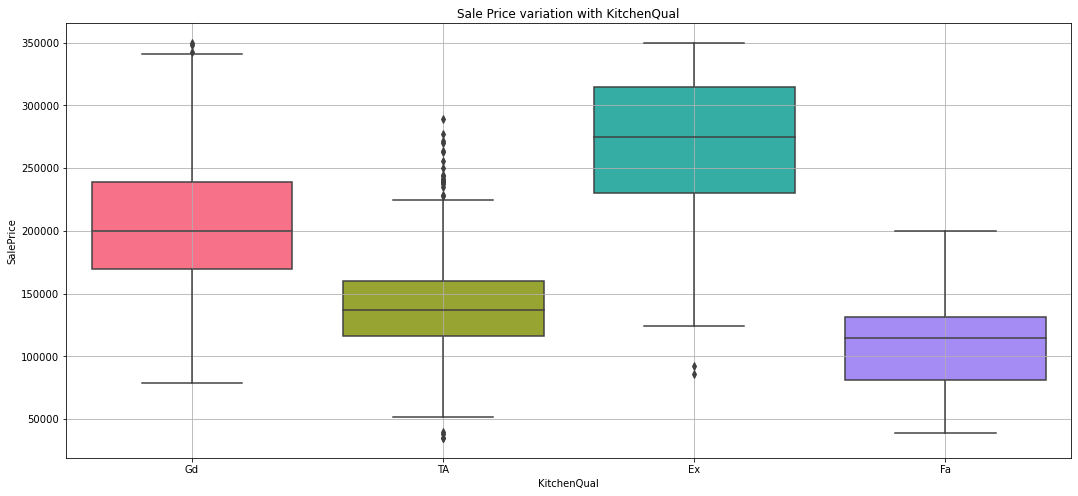

In [75]:
plt.figure(figsize=(18,8))
sns.boxplot(x='KitchenQual', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('KitchenQual')
plt.title('Sale Price variation with KitchenQual')
plt.grid()

_**BedroomAbvGr**_ - Bedrooms above grade (does NOT include basement bedrooms)

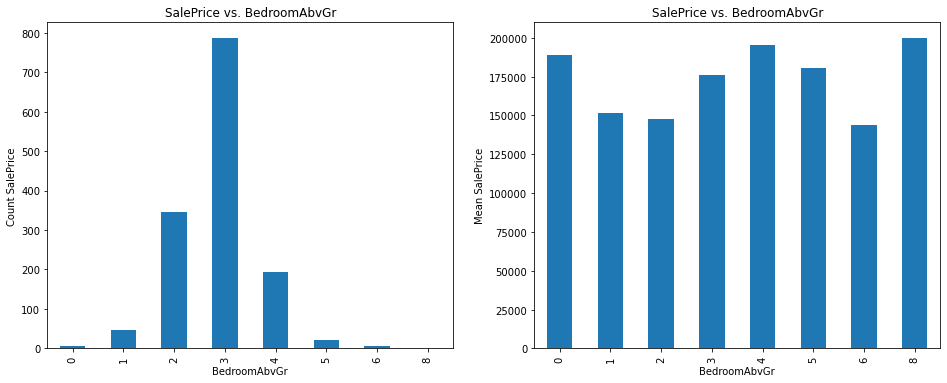

In [76]:
bed = df['SalePrice'].groupby(df['BedroomAbvGr']).mean()
bed2 = df['SalePrice'].groupby(df['BedroomAbvGr']).count()

plt.subplot(1, 2, 2)
bed.plot(kind='bar', title='SalePrice vs. BedroomAbvGr', xlabel='BedroomAbvGr', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
bed2.plot(kind='bar', title='SalePrice vs. BedroomAbvGr', xlabel='BedroomAbvGr', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

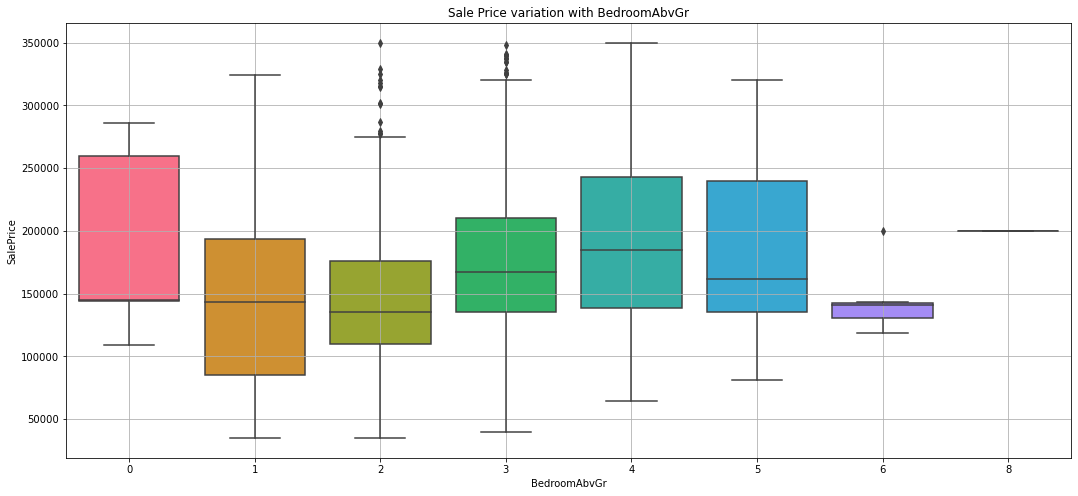

In [77]:
plt.figure(figsize=(18,8))
sns.boxplot(x='BedroomAbvGr', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('BedroomAbvGr')
plt.title('Sale Price variation with BedroomAbvGr')
plt.grid()

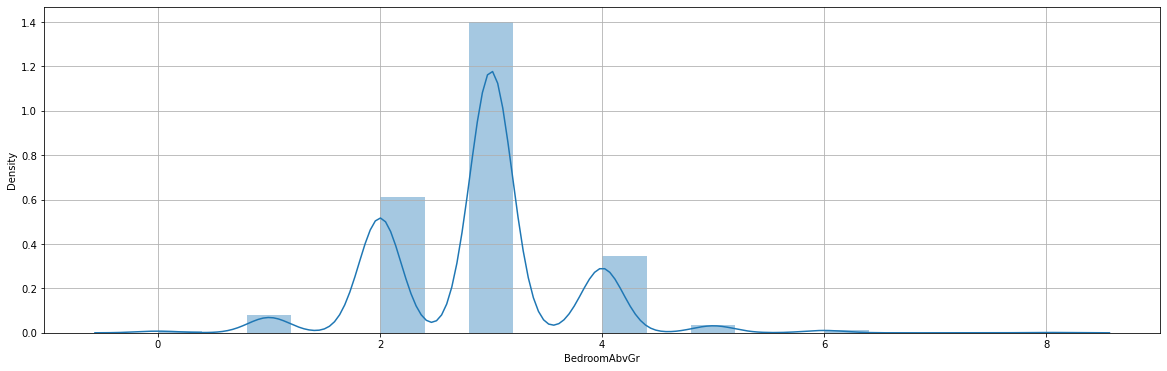

In [78]:
plt.figure(figsize=(20, 6))
sns.distplot(df['BedroomAbvGr'], bins=20, hist_kws={'alpha': 0.4});
plt.grid()
plt.show()

_**HalfBath**_ - Half baths above grade

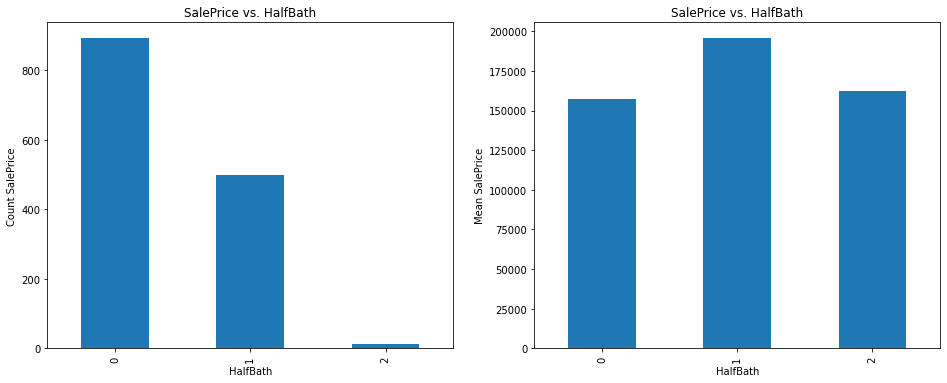

In [79]:
hb = df['SalePrice'].groupby(df['HalfBath']).mean()
hb2 = df['SalePrice'].groupby(df['HalfBath']).count()

plt.subplot(1, 2, 2)
hb.plot(kind='bar', title='SalePrice vs. HalfBath', xlabel='HalfBath', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
hb2.plot(kind='bar', title='SalePrice vs. HalfBath', xlabel='HalfBath', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

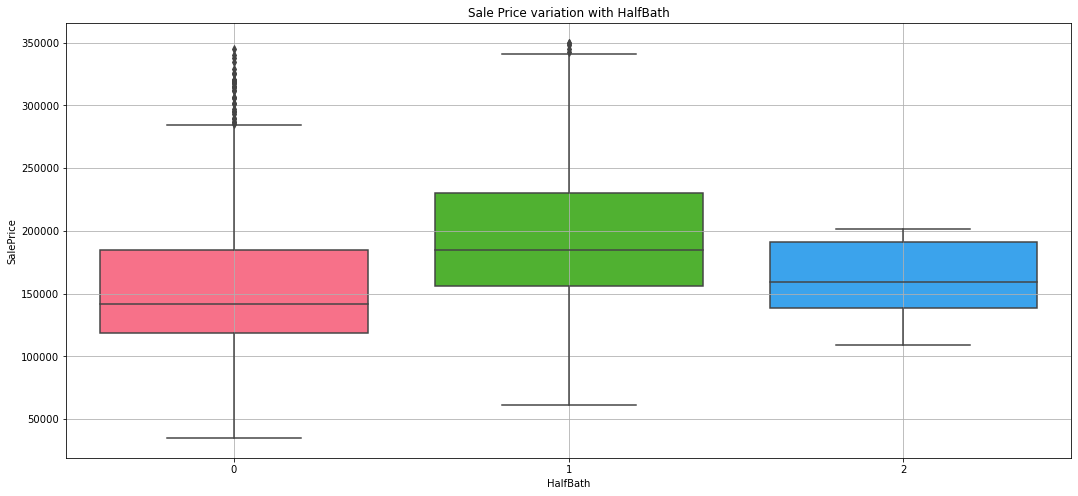

In [80]:
plt.figure(figsize=(18,8))
sns.boxplot(x='HalfBath', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('HalfBath')
plt.title('Sale Price variation with HalfBath')
plt.grid()

_**FullBath**_ - Full bathrooms above grade 

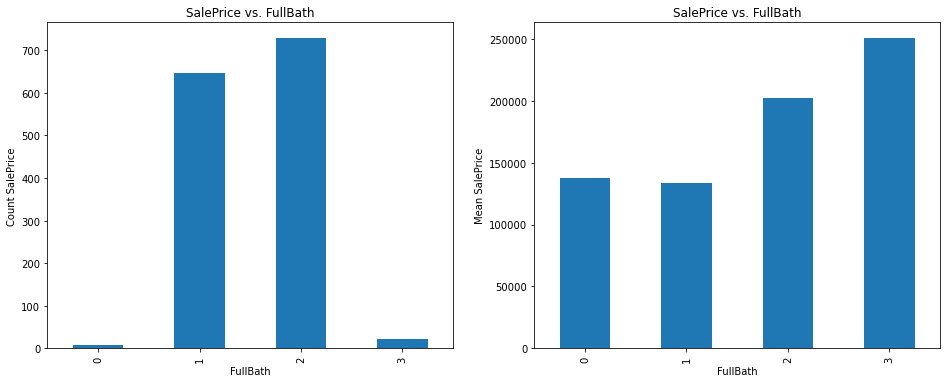

In [81]:
fbb = df['SalePrice'].groupby(df['FullBath']).mean()
fbb2 = df['SalePrice'].groupby(df['FullBath']).count()

plt.subplot(1, 2, 2)
fbb.plot(kind='bar', title='SalePrice vs. FullBath', xlabel='FullBath', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
fbb2.plot(kind='bar', title='SalePrice vs. FullBath', xlabel='FullBath', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

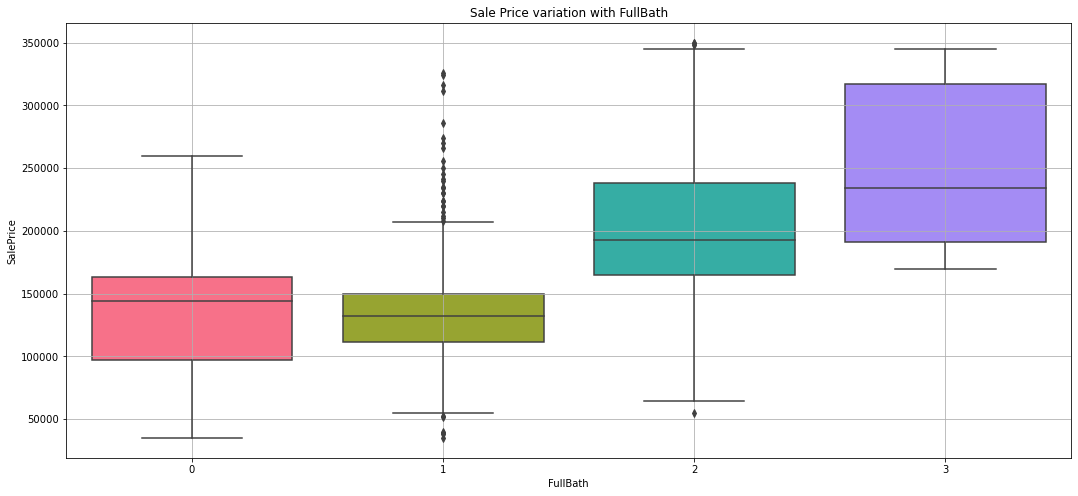

In [82]:
plt.figure(figsize=(18,8))
sns.boxplot(x='FullBath', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('FullBath')
plt.title('Sale Price variation with FullBath')
plt.grid()

_**BsmtFullBath**_ - Basement full bathrooms  

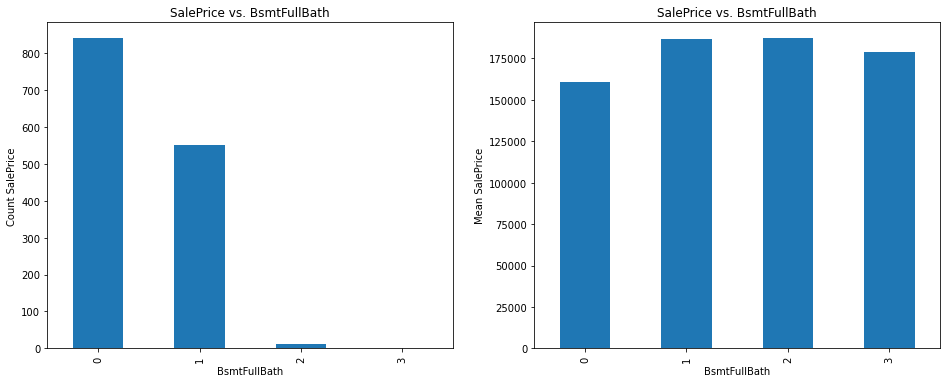

In [83]:
fb = df['SalePrice'].groupby(df['BsmtFullBath']).mean()
fb2 = df['SalePrice'].groupby(df['BsmtFullBath']).count()

plt.subplot(1, 2, 2)
fb.plot(kind='bar', title='SalePrice vs. BsmtFullBath', xlabel='BsmtFullBath', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
fb2.plot(kind='bar', title='SalePrice vs. BsmtFullBath', xlabel='BsmtFullBath', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

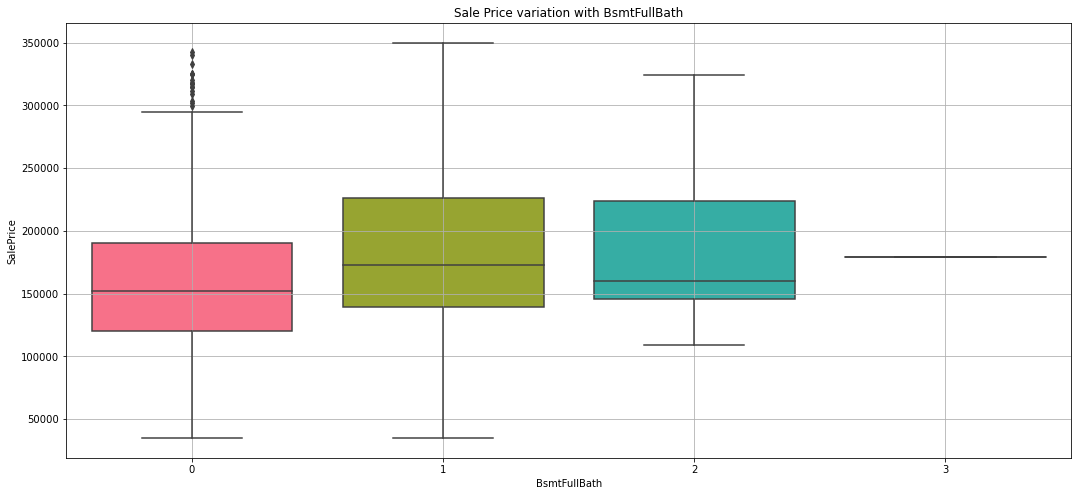

In [84]:
plt.figure(figsize=(18,8))
sns.boxplot(x='BsmtFullBath', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('BsmtFullBath')
plt.title('Sale Price variation with BsmtFullBath')
plt.grid()

_**GrLivArea**_ - Above grade (ground) living area square feet

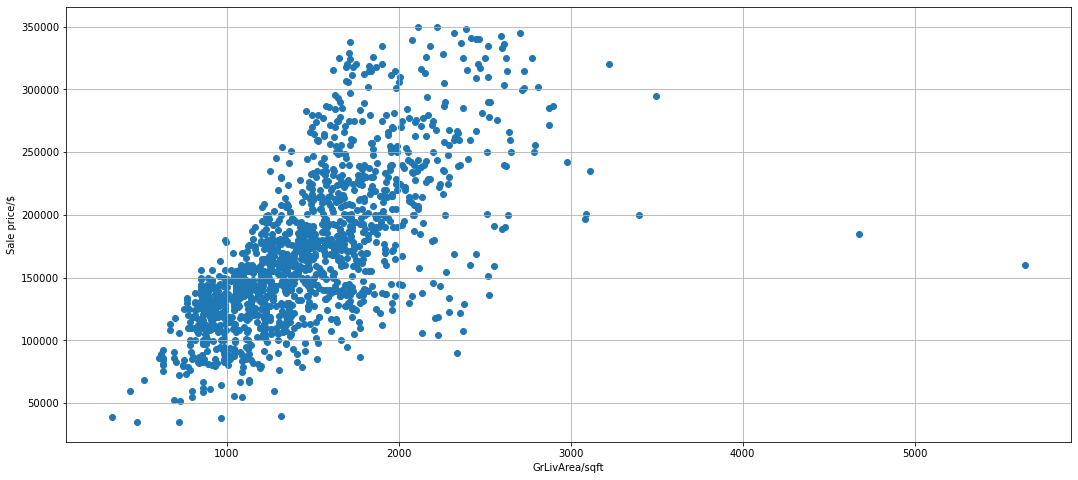

In [85]:
plt.figure(figsize=(18,8))
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.xlabel('GrLivArea/sqft')
plt.ylabel('Sale price/$')
plt.grid()
plt.show()

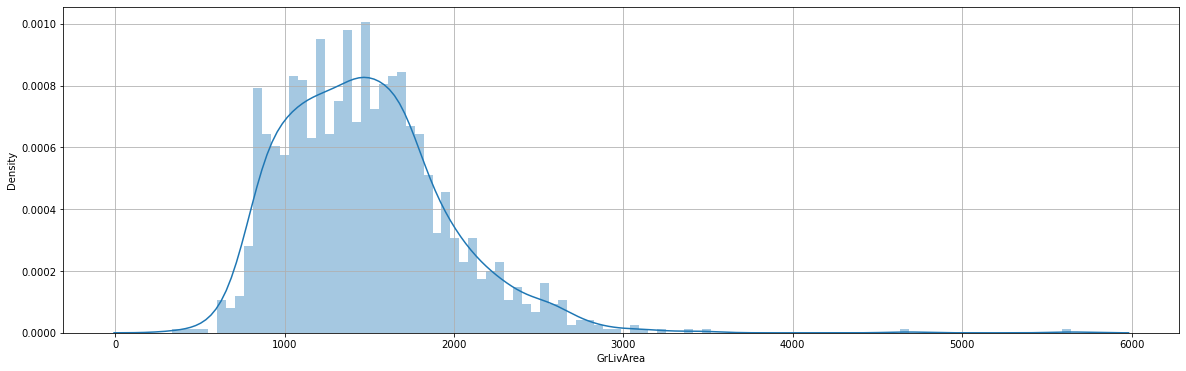

In [86]:
plt.figure(figsize=(20, 6))
sns.distplot(df['GrLivArea'], bins=100, hist_kws={'alpha': 0.4});
plt.grid()
plt.show()

_**2ndFlrSF**_ - Second floor square feet

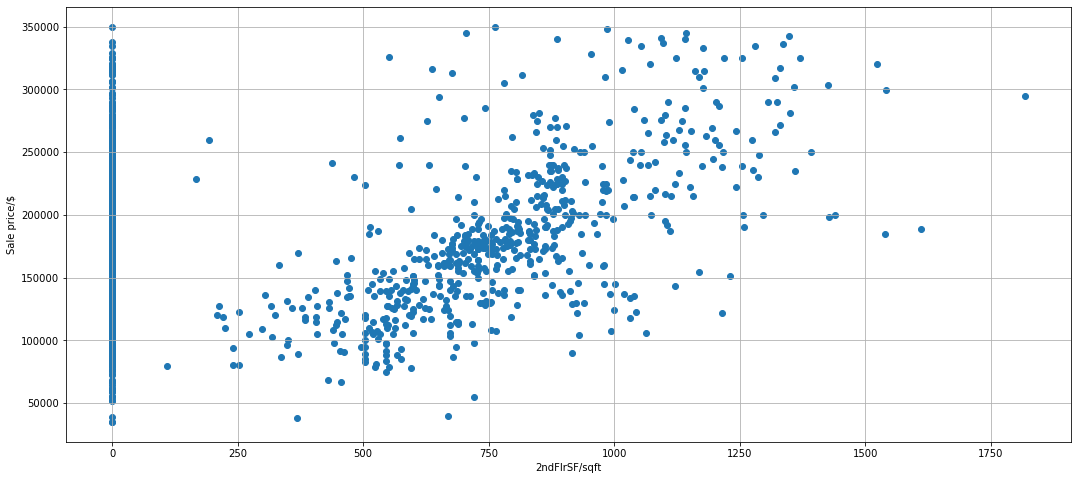

In [87]:
plt.figure(figsize=(18,8))
plt.scatter(df['2ndFlrSF'], df['SalePrice'])
plt.xlabel('2ndFlrSF/sqft')
plt.ylabel('Sale price/$')
plt.grid()
plt.show()

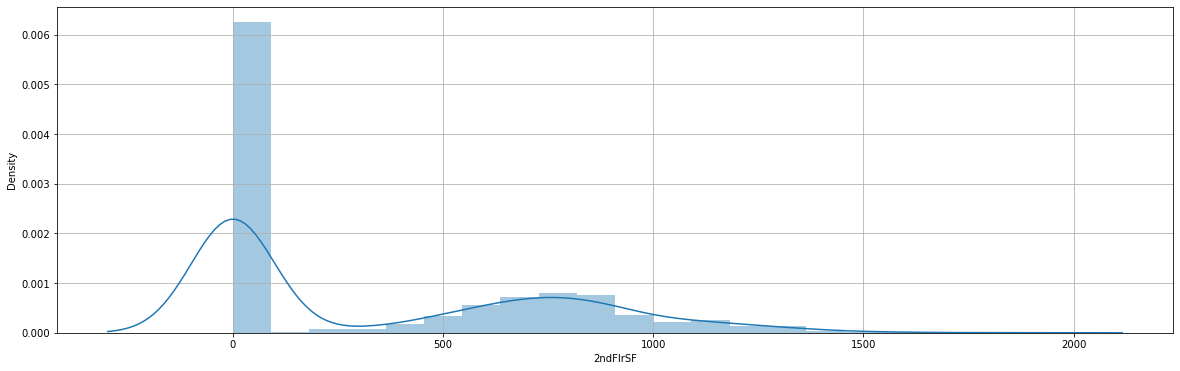

In [88]:
plt.figure(figsize=(20, 6))
sns.distplot(df['2ndFlrSF'], bins=20, hist_kws={'alpha': 0.4});
plt.grid()
plt.show()

In [89]:
df = df.drop(columns = ['2ndFlrSF'])

_**1stFlrSF**_ - First Floor square feet

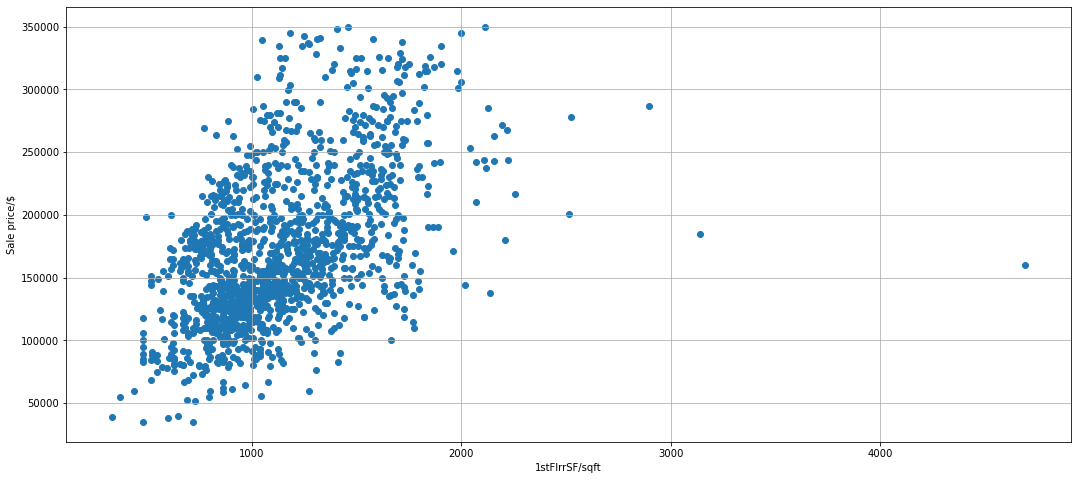

In [90]:
plt.figure(figsize=(18,8))
plt.scatter(df['1stFlrSF'], df['SalePrice'])
plt.xlabel('1stFlrrSF/sqft')
plt.ylabel('Sale price/$')
plt.grid()
plt.show()

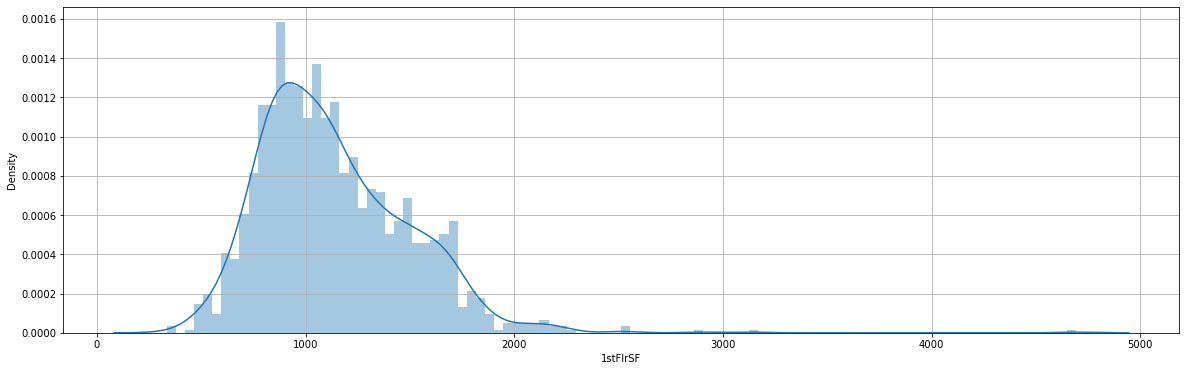

In [91]:
plt.figure(figsize=(20, 6))
sns.distplot(df['1stFlrSF'], bins=100, hist_kws={'alpha': 0.4});
plt.grid()
plt.show()

_**Electrical**_ - Electrical system

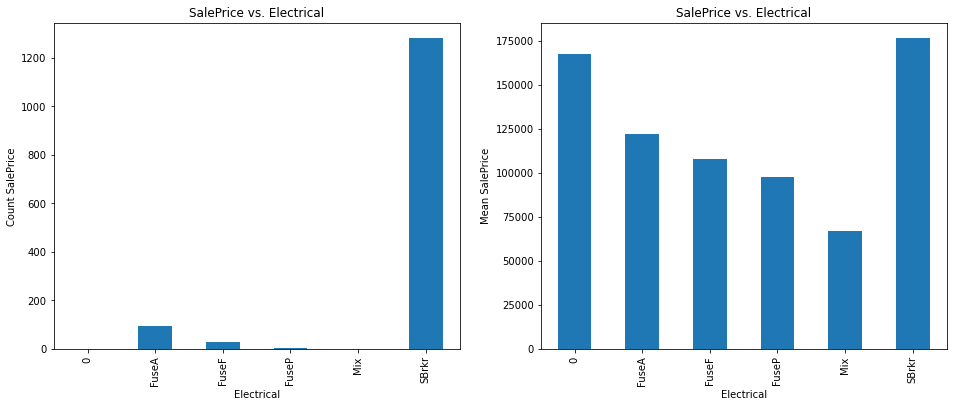

In [92]:
el = df['SalePrice'].groupby(df['Electrical']).mean()
el2 = df['SalePrice'].groupby(df['Electrical']).count()

plt.subplot(1, 2, 2)
el.plot(kind='bar', title='SalePrice vs. Electrical', xlabel='Electrical', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
el2.plot(kind='bar', title='SalePrice vs. Electrical', xlabel='Electrical', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

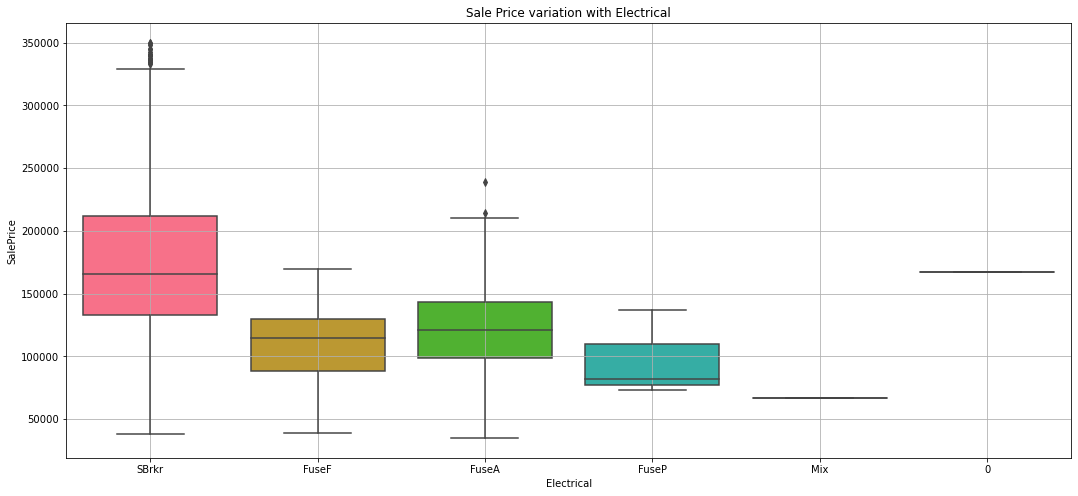

In [93]:
plt.figure(figsize=(18,8))
sns.boxplot(x='Electrical', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('Electrical')
plt.title('Sale Price variation with Electrical')
plt.grid()

_**CentralAir**_ - Central air conditioning 

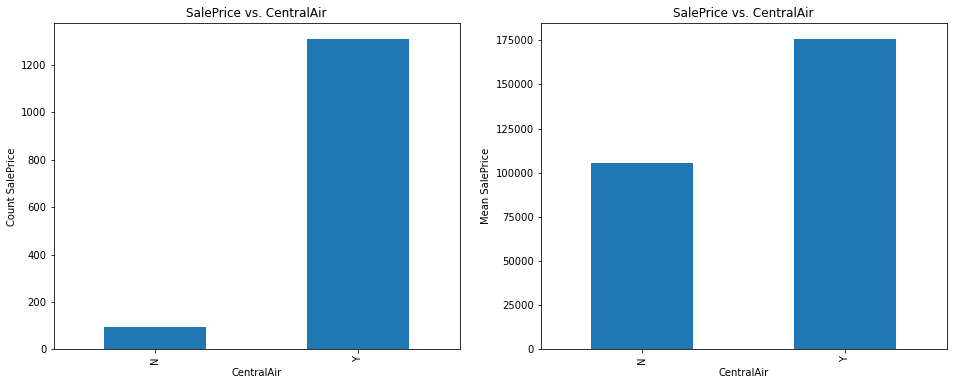

In [94]:
ca = df['SalePrice'].groupby(df['CentralAir']).mean()
ca2 = df['SalePrice'].groupby(df['CentralAir']).count()

plt.subplot(1, 2, 2)
ca.plot(kind='bar', title='SalePrice vs. CentralAir', xlabel='CentralAir', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
ca2.plot(kind='bar', title='SalePrice vs. CentralAir', xlabel='CentralAir', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

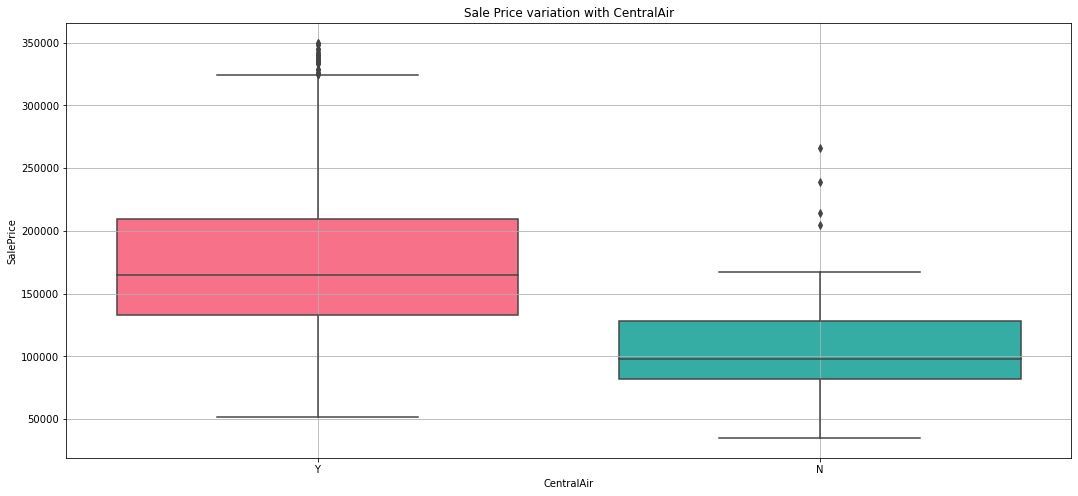

In [95]:
plt.figure(figsize=(18,8))
sns.boxplot(x='CentralAir', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('CentralAir')
plt.title('Sale Price variation with CentralAir')
plt.grid()

_**HeatingQC**_ - Heating quality and condition  

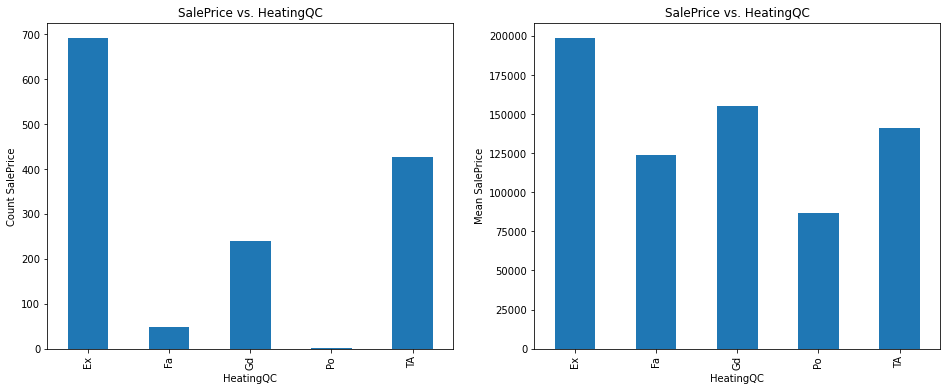

In [96]:
hq = df['SalePrice'].groupby(df['HeatingQC']).mean()
hq2 = df['SalePrice'].groupby(df['HeatingQC']).count()

plt.subplot(1, 2, 2)
hq.plot(kind='bar', title='SalePrice vs. HeatingQC', xlabel='HeatingQC', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
hq2.plot(kind='bar', title='SalePrice vs. HeatingQC', xlabel='HeatingQC', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

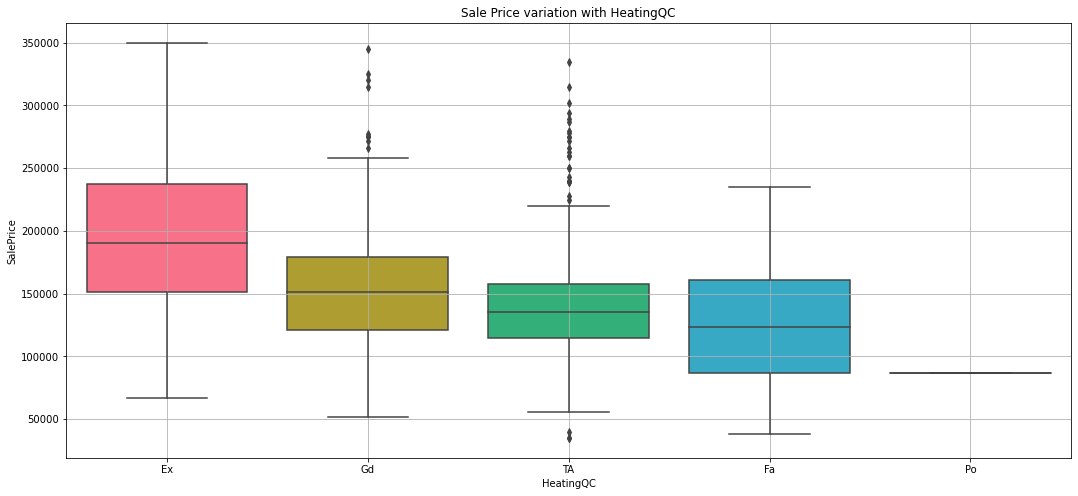

In [97]:
plt.figure(figsize=(18,8))
sns.boxplot(x='HeatingQC', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('HeatingQC')
plt.title('Sale Price variation with HeatingQC')
plt.grid()

_**Heating**_ - Type of heating

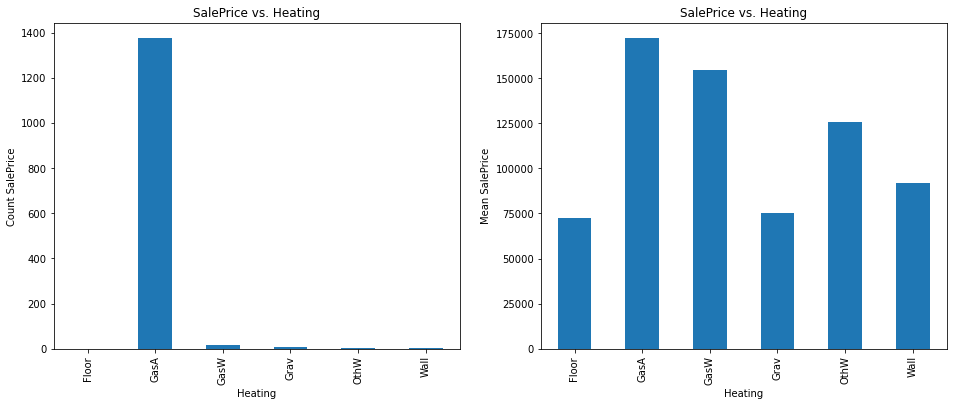

In [98]:
h = df['SalePrice'].groupby(df['Heating']).mean()
h2 = df['SalePrice'].groupby(df['Heating']).count()

plt.subplot(1, 2, 2)
h.plot(kind='bar', title='SalePrice vs. Heating', xlabel='Heating', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
h2.plot(kind='bar', title='SalePrice vs. Heating', xlabel='Heating', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

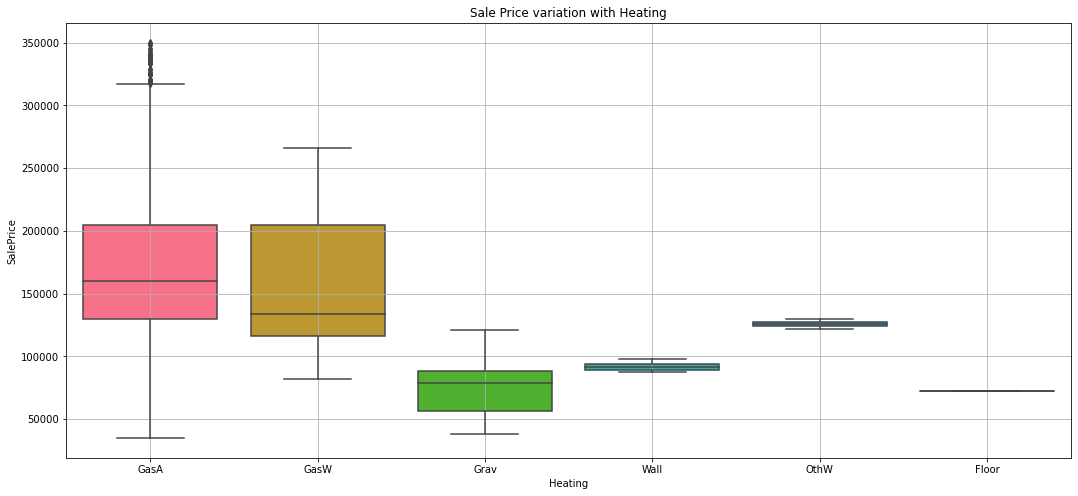

In [99]:
plt.figure(figsize=(18,8))
sns.boxplot(x='Heating', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('Heating')
plt.title('Sale Price variation with Heating')
plt.grid()

_**TotalBsmtSF**_ - Total square feet of basement area 

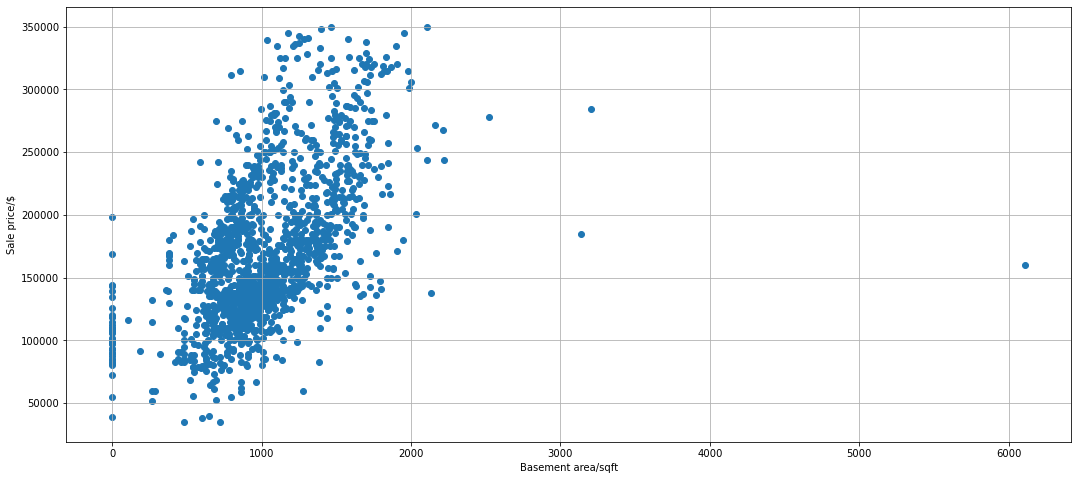

In [100]:
plt.figure(figsize=(18,8))
plt.scatter(df['TotalBsmtSF'], df['SalePrice'])
plt.xlabel('Basement area/sqft')
plt.ylabel('Sale price/$')
plt.grid()
plt.show()

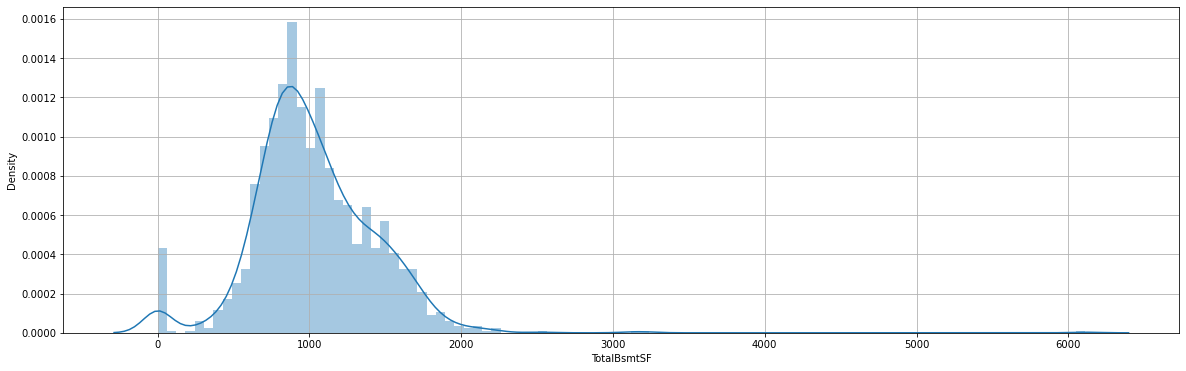

In [101]:
plt.figure(figsize=(20, 6))
sns.distplot(df['TotalBsmtSF'], bins=100, hist_kws={'alpha': 0.4});
plt.grid()
plt.show()

_**BsmtUnfSF**_ - Unfinished square feet of basement area

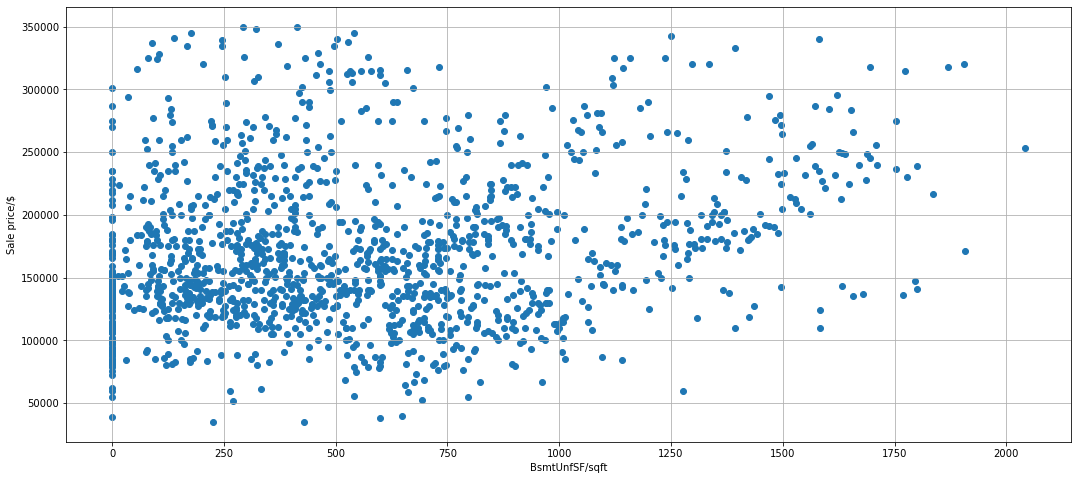

In [102]:
plt.figure(figsize=(18,8))
plt.scatter(df['BsmtUnfSF'], df['SalePrice'])
plt.xlabel('BsmtUnfSF/sqft')
plt.ylabel('Sale price/$')
plt.grid()
plt.show()

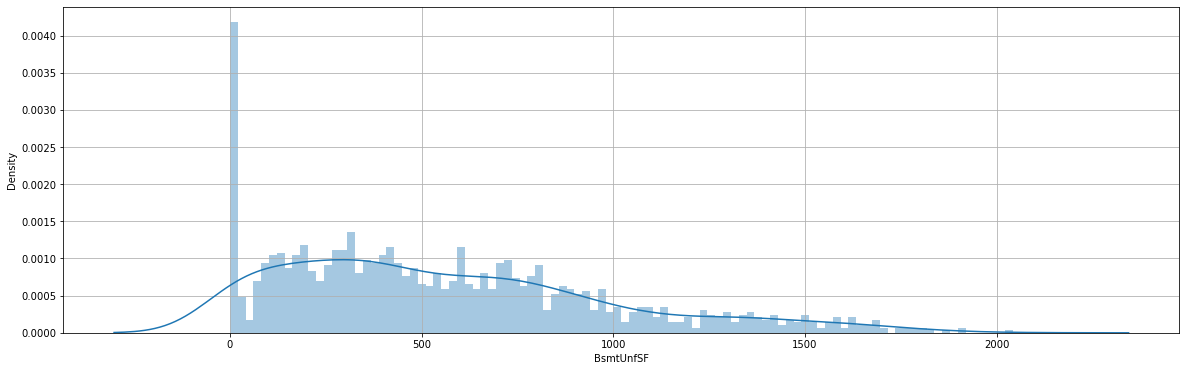

In [103]:
plt.figure(figsize=(20, 6))
sns.distplot(df['BsmtUnfSF'], bins=100, hist_kws={'alpha': 0.4});
plt.grid()
plt.show()

_**BsmtFinType2**_ - Rating of basement finished area (if multiple types) 

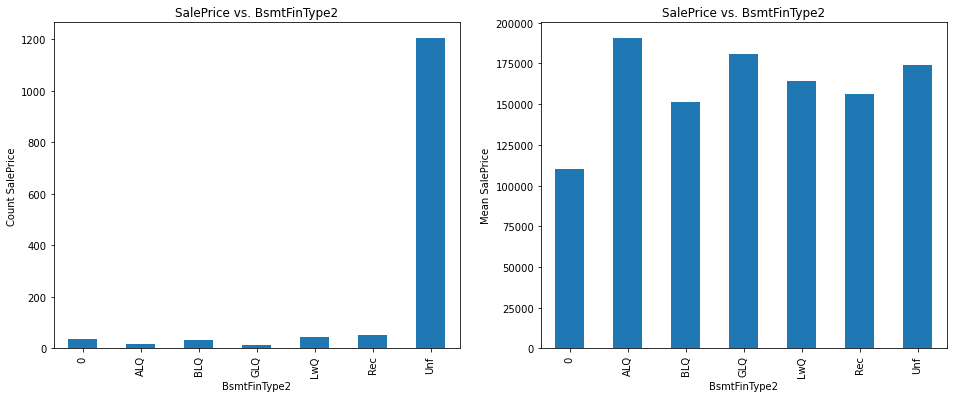

In [104]:
bf = df['SalePrice'].groupby(df['BsmtFinType2']).mean()
bf2 = df['SalePrice'].groupby(df['BsmtFinType2']).count()

plt.subplot(1, 2, 2)
bf.plot(kind='bar', title='SalePrice vs. BsmtFinType2', xlabel='BsmtFinType2', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
bf2.plot(kind='bar', title='SalePrice vs. BsmtFinType2', xlabel='BsmtFinType2', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

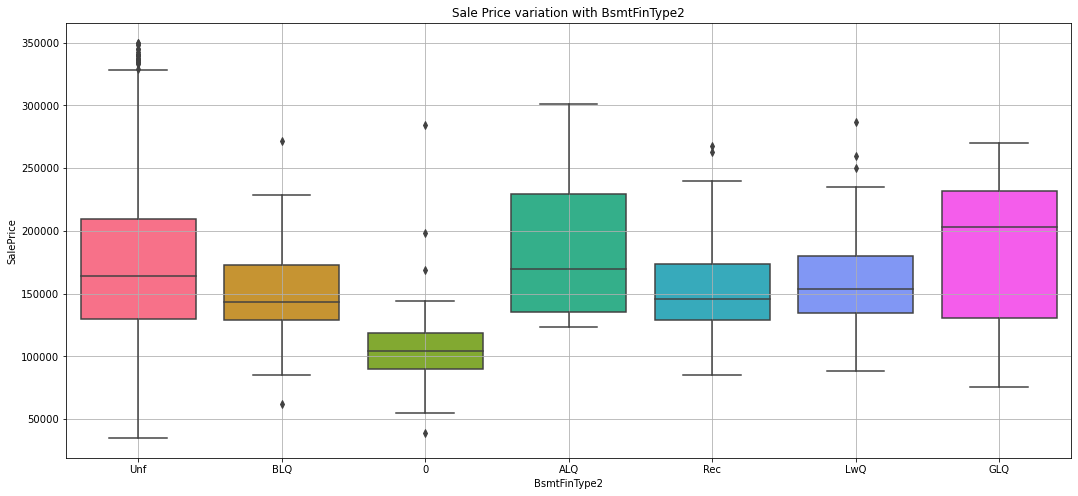

In [105]:
plt.figure(figsize=(18,8))
sns.boxplot(x='BsmtFinType2', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('BsmtFinType2')
plt.title('Sale Price variation with BsmtFinType2')
plt.grid()

_**BsmtFinSF1**_ - Type 1 finished square feet

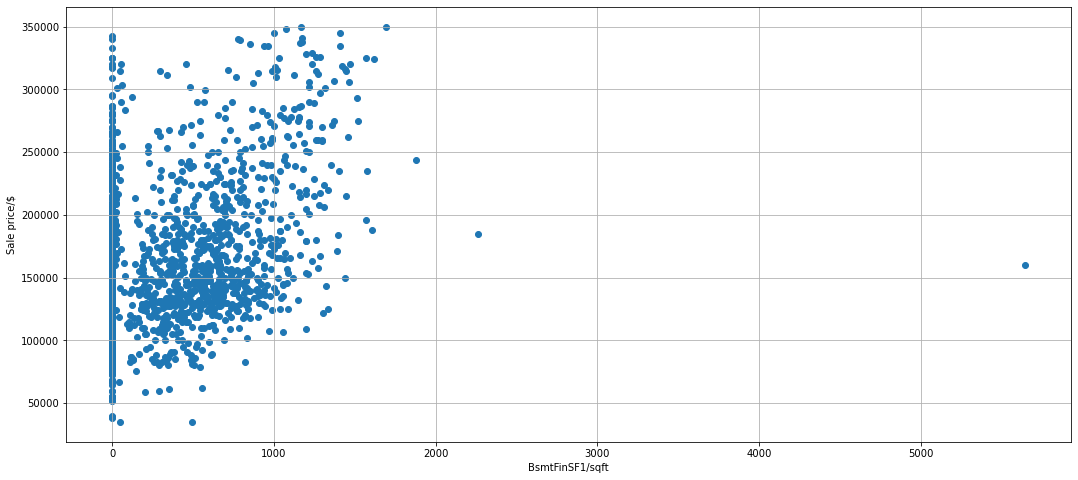

In [106]:
plt.figure(figsize=(18,8))
plt.scatter(df['BsmtFinSF1'], df['SalePrice'])
plt.xlabel('BsmtFinSF1/sqft')
plt.ylabel('Sale price/$')
plt.grid()
plt.show()

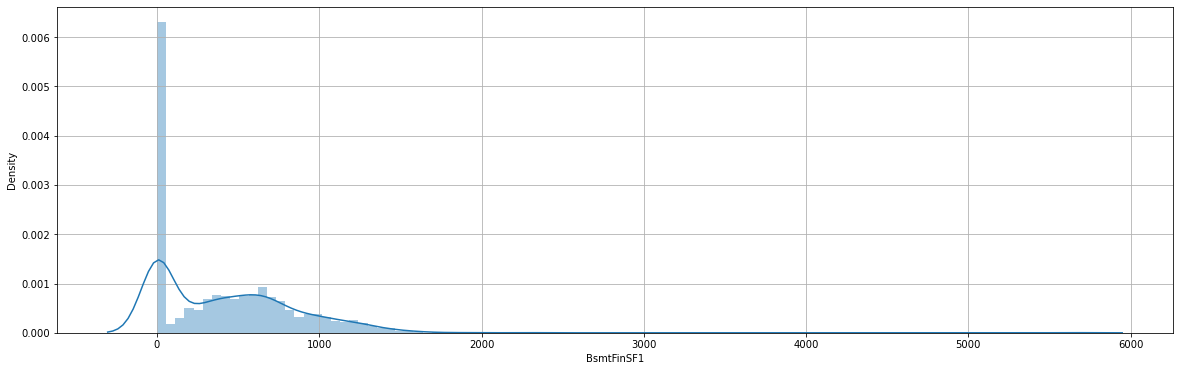

In [107]:
plt.figure(figsize=(20, 6))
sns.distplot(df['BsmtFinSF1'], bins=100, hist_kws={'alpha': 0.4});
plt.grid()
plt.show()

_**BsmtFinType1**_ - Rating of basement finished area

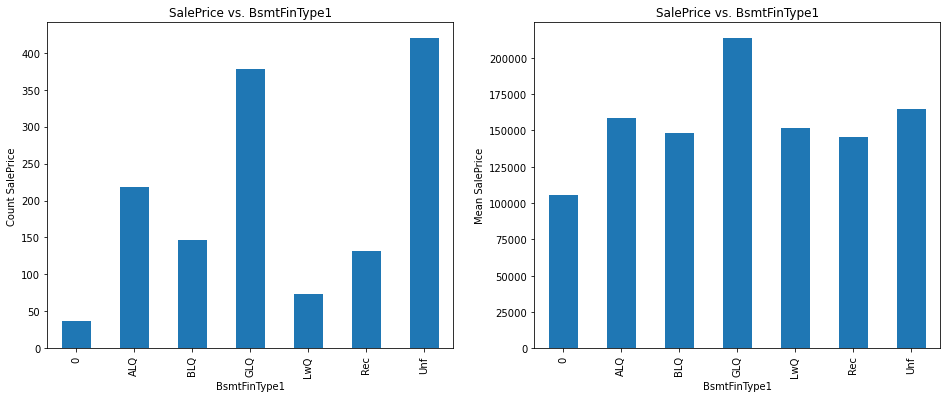

In [108]:
bf = df['SalePrice'].groupby(df['BsmtFinType1']).mean()
bf2 = df['SalePrice'].groupby(df['BsmtFinType1']).count()

plt.subplot(1, 2, 2)
bf.plot(kind='bar', title='SalePrice vs. BsmtFinType1', xlabel='BsmtFinType1', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
bf2.plot(kind='bar', title='SalePrice vs. BsmtFinType1', xlabel='BsmtFinType1', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

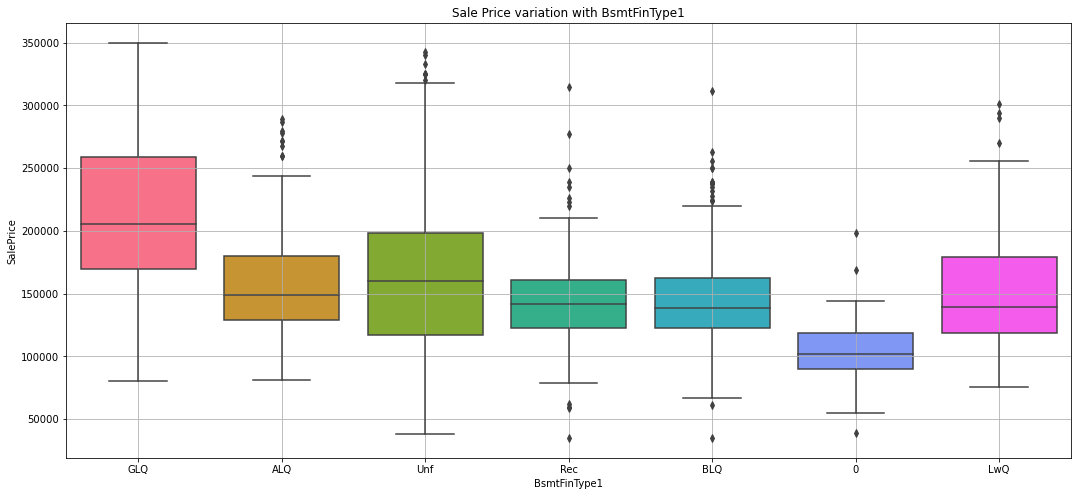

In [109]:
plt.figure(figsize=(18,8))
sns.boxplot(x='BsmtFinType1', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('BsmtFinType1')
plt.title('Sale Price variation with BsmtFinType1')
plt.grid()

_**BsmtExposure**_ - Refers to walkout or garden level walls

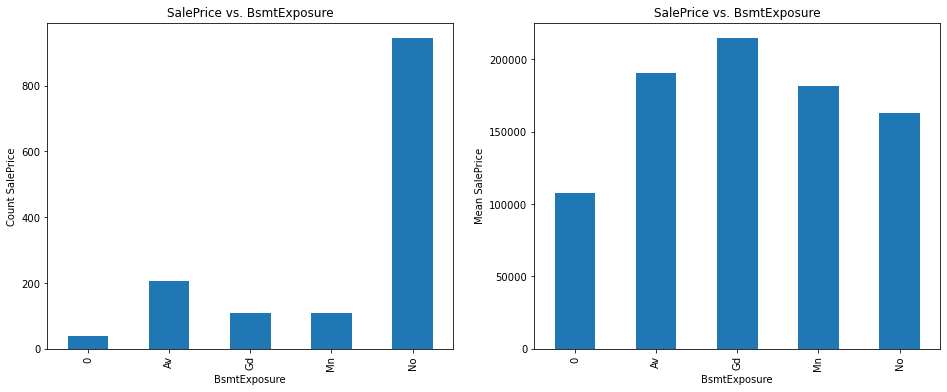

In [110]:
bf = df['SalePrice'].groupby(df['BsmtExposure']).mean()
bf2 = df['SalePrice'].groupby(df['BsmtExposure']).count()

plt.subplot(1, 2, 2)
bf.plot(kind='bar', title='SalePrice vs. BsmtExposure', xlabel='BsmtExposure', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
bf2.plot(kind='bar', title='SalePrice vs. BsmtExposure', xlabel='BsmtExposure', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

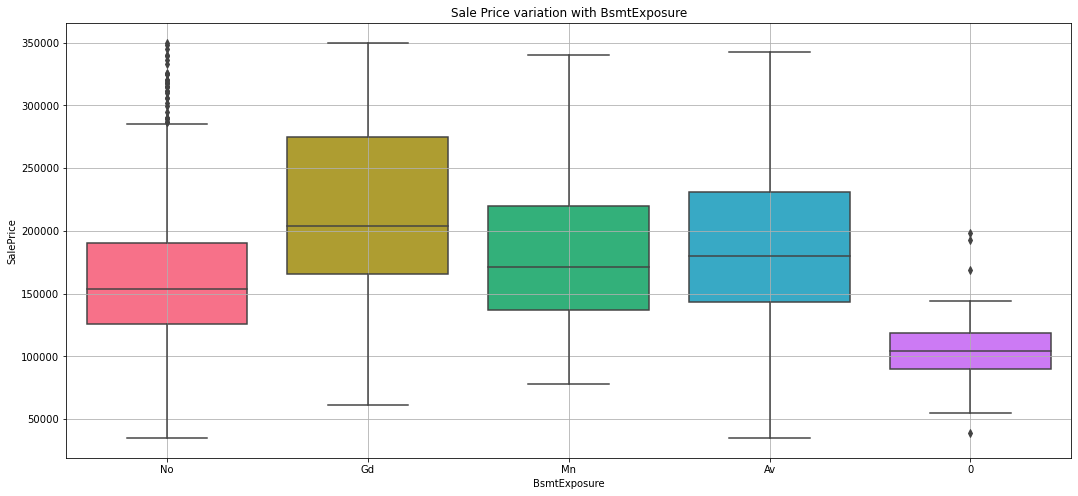

In [111]:
plt.figure(figsize=(18,8))
sns.boxplot(x='BsmtExposure', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('BsmtExposure')
plt.title('Sale Price variation with BsmtExposure')
plt.grid()

_**BsmtCond**_ - Evaluates the general condition of the basement

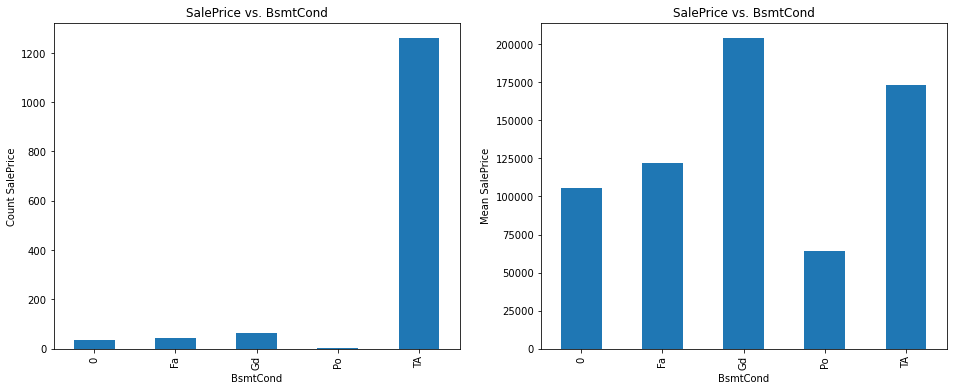

In [112]:
bf = df['SalePrice'].groupby(df['BsmtCond']).mean()
bf2 = df['SalePrice'].groupby(df['BsmtCond']).count()

plt.subplot(1, 2, 2)
bf.plot(kind='bar', title='SalePrice vs. BsmtCond', xlabel='BsmtCond', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
bf2.plot(kind='bar', title='SalePrice vs. BsmtCond', xlabel='BsmtCond', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

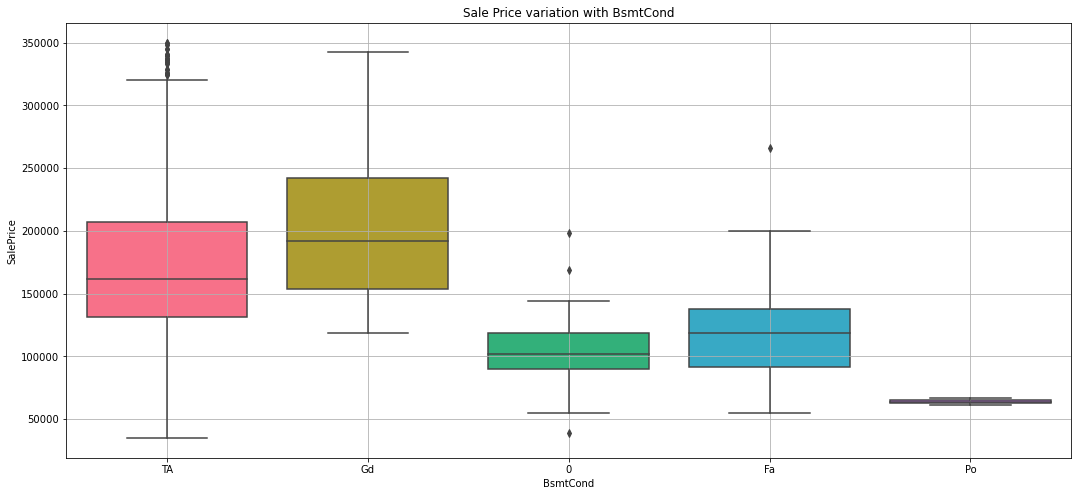

In [113]:
plt.figure(figsize=(18,8))
sns.boxplot(x='BsmtCond', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('BsmtCond')
plt.title('Sale Price variation with BsmtCond')
plt.grid()

_**BsmtQual**_ - Evaluates the height of the basement

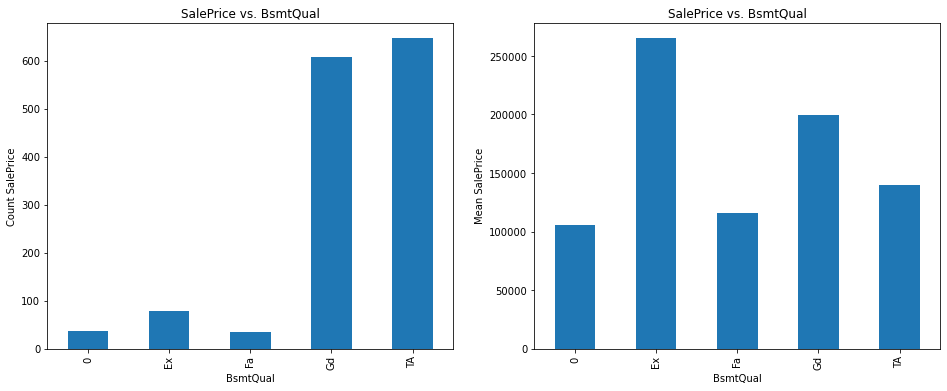

In [114]:
bf = df['SalePrice'].groupby(df['BsmtQual']).mean()
bf2 = df['SalePrice'].groupby(df['BsmtQual']).count()

plt.subplot(1, 2, 2)
bf.plot(kind='bar', title='SalePrice vs. BsmtQual', xlabel='BsmtQual', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
bf2.plot(kind='bar', title='SalePrice vs. BsmtQual', xlabel='BsmtQual', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

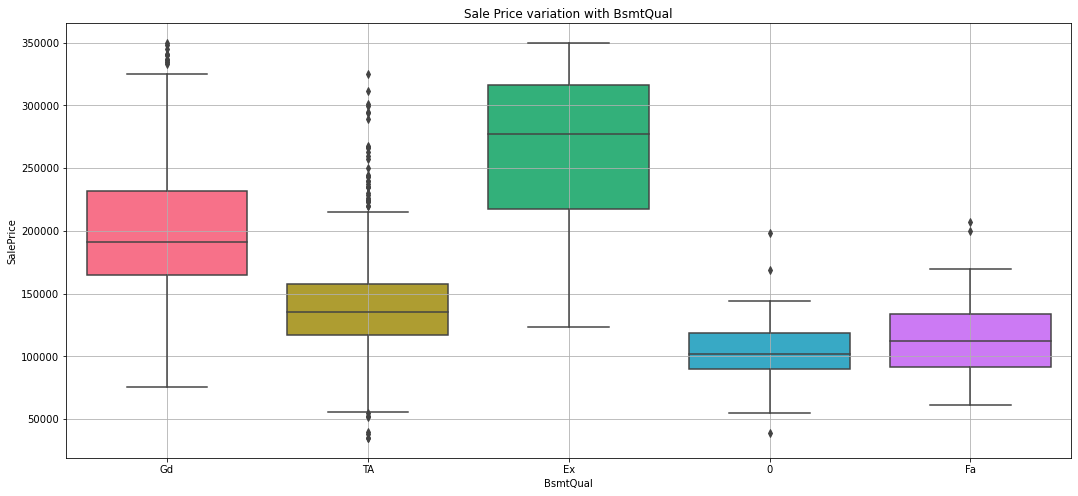

In [115]:
plt.figure(figsize=(18,8))
sns.boxplot(x='BsmtQual', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('BsmtQual')
plt.title('Sale Price variation with BsmtQual')
plt.grid()

_**Foundation**_ - Type of foundation 

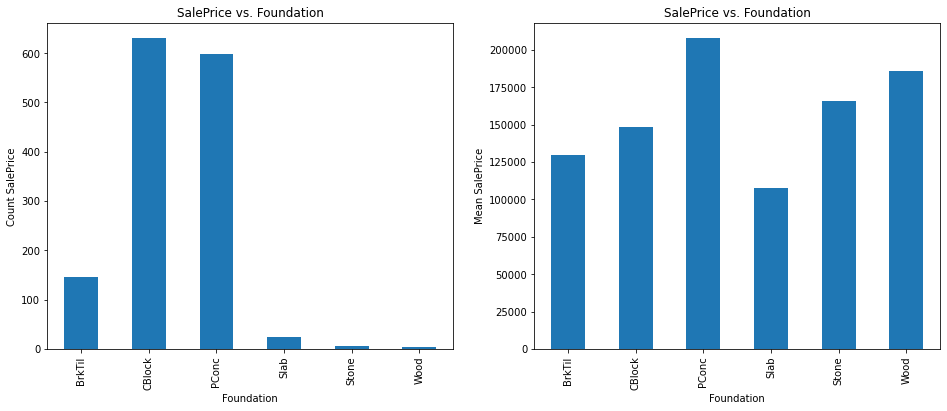

In [116]:
bf = df['SalePrice'].groupby(df['Foundation']).mean()
bf2 = df['SalePrice'].groupby(df['Foundation']).count()

plt.subplot(1, 2, 2)
bf.plot(kind='bar', title='SalePrice vs. Foundation', xlabel='Foundation', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
bf2.plot(kind='bar', title='SalePrice vs. Foundation', xlabel='Foundation', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

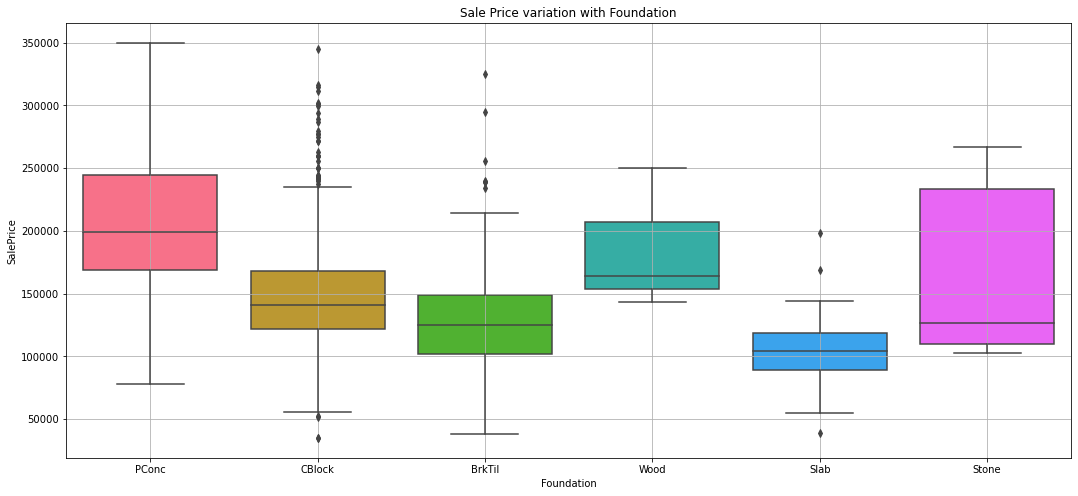

In [117]:
plt.figure(figsize=(18,8))
sns.boxplot(x='Foundation', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('Foundation')
plt.title('Sale Price variation with Foundation')
plt.grid()

_**ExterCond**_ - Evaluates the present condition of the material on the exterior

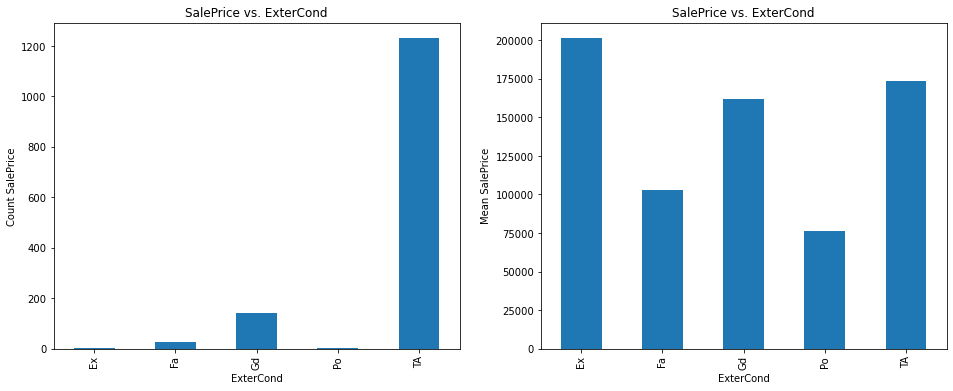

In [118]:
bf = df['SalePrice'].groupby(df['ExterCond']).mean()
bf2 = df['SalePrice'].groupby(df['ExterCond']).count()

plt.subplot(1, 2, 2)
bf.plot(kind='bar', title='SalePrice vs. ExterCond', xlabel='ExterCond', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
bf2.plot(kind='bar', title='SalePrice vs. ExterCond', xlabel='ExterCond', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

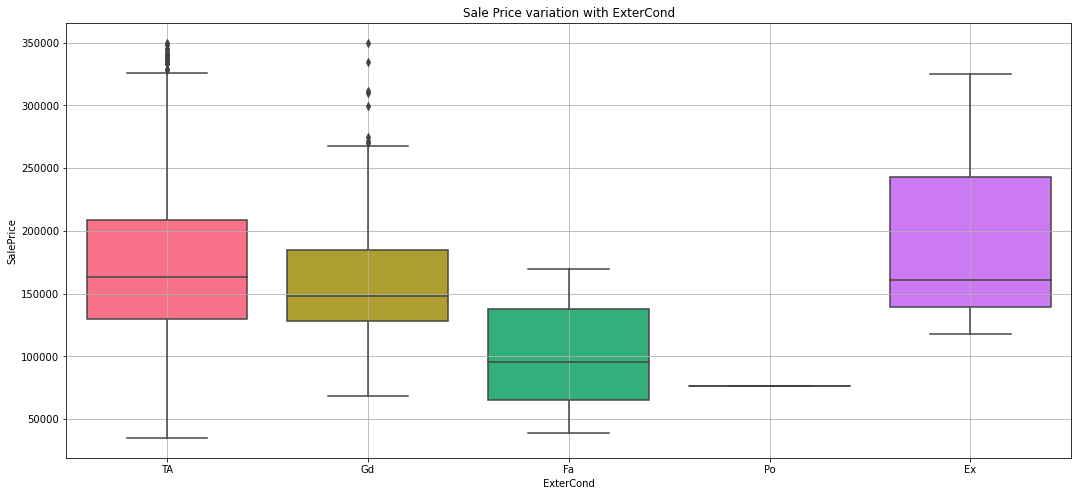

In [119]:
plt.figure(figsize=(18,8))
sns.boxplot(x='ExterCond', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('ExterCond')
plt.title('Sale Price variation with ExterCond')
plt.grid()

_**ExterQual**_ - Evaluates the quality of the material on the exterior 

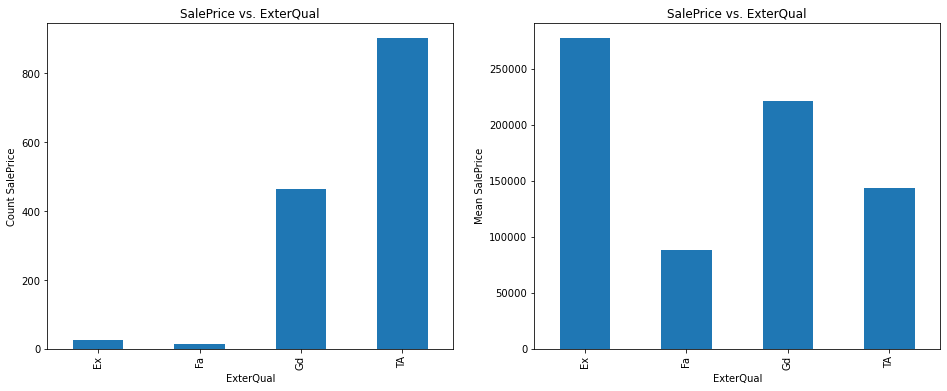

In [120]:
bf = df['SalePrice'].groupby(df['ExterQual']).mean()
bf2 = df['SalePrice'].groupby(df['ExterQual']).count()

plt.subplot(1, 2, 2)
bf.plot(kind='bar', title='SalePrice vs. ExterQual', xlabel='ExterQual', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
bf2.plot(kind='bar', title='SalePrice vs. ExterQual', xlabel='ExterQual', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

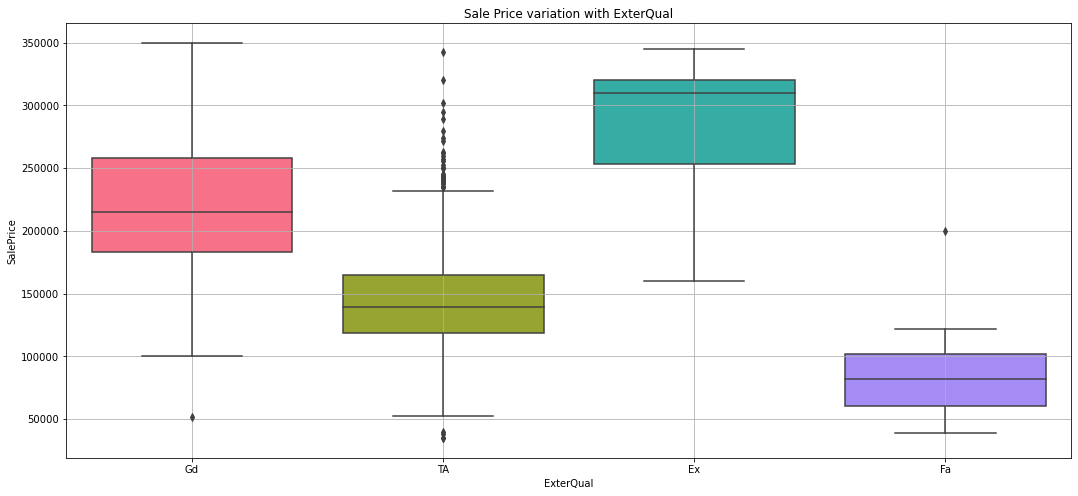

In [121]:
plt.figure(figsize=(18,8))
sns.boxplot(x='ExterQual', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('ExterQual')
plt.title('Sale Price variation with ExterQual')
plt.grid()

_**MasVnrArea**_ - Masonry veneer area in square feet

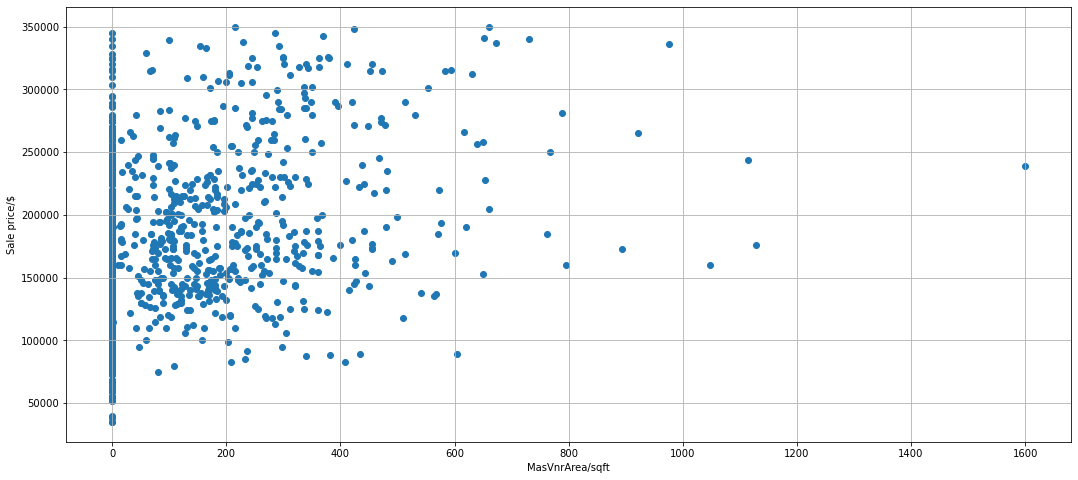

In [122]:
plt.figure(figsize=(18,8))
plt.scatter(df['MasVnrArea'], df['SalePrice'])
plt.xlabel('MasVnrArea/sqft')
plt.ylabel('Sale price/$')
plt.grid()
plt.show()

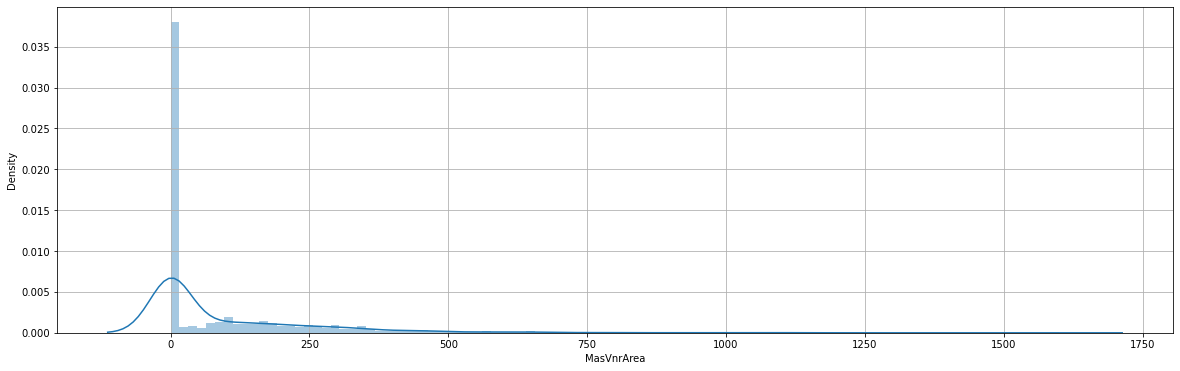

In [123]:
plt.figure(figsize=(20, 6))
sns.distplot(df['MasVnrArea'], bins=100, hist_kws={'alpha': 0.4});
plt.grid()
plt.show()

In [124]:
df = df.drop(columns = ['MasVnrArea'])

_**MasVnrType**_ -  Masonry veneer type

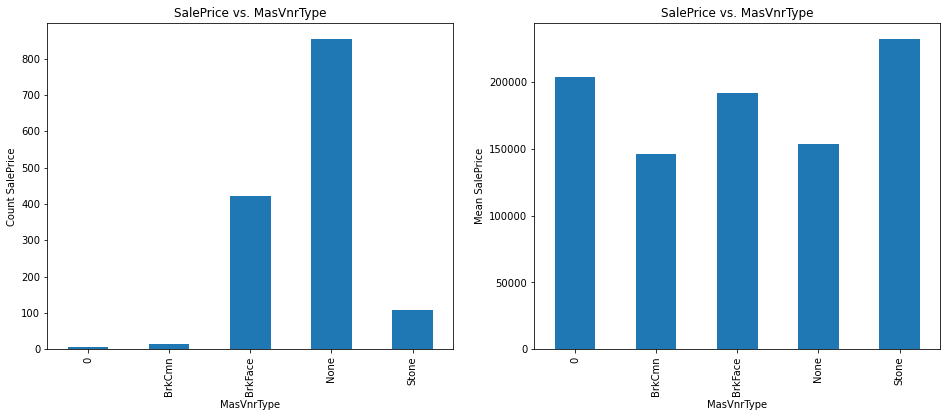

In [125]:
bf = df['SalePrice'].groupby(df['MasVnrType']).mean()
bf2 = df['SalePrice'].groupby(df['MasVnrType']).count()

plt.subplot(1, 2, 2)
bf.plot(kind='bar', title='SalePrice vs. MasVnrType', xlabel='MasVnrType', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
bf2.plot(kind='bar', title='SalePrice vs. MasVnrType', xlabel='MasVnrType', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

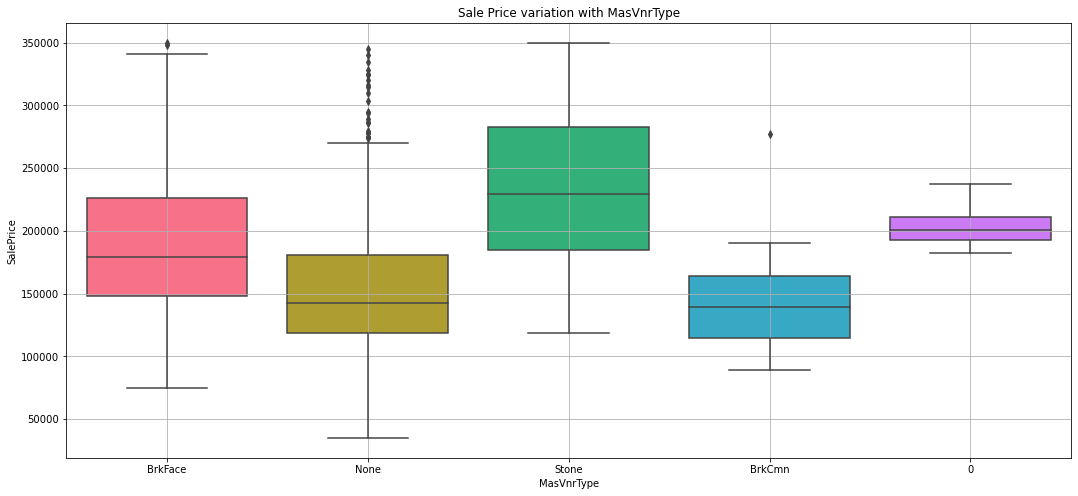

In [126]:
plt.figure(figsize=(18,8))
sns.boxplot(x='MasVnrType', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('MasVnrType')
plt.title('Sale Price variation with MasVnrType')
plt.grid()

_**Exterior2nd**_ - Exterior covering on house (if more than one material)

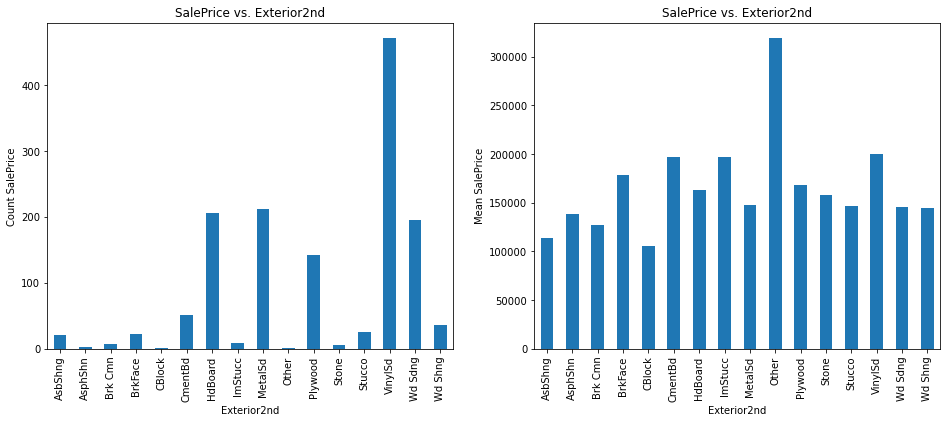

In [127]:
bf = df['SalePrice'].groupby(df['Exterior2nd']).mean()
bf2 = df['SalePrice'].groupby(df['Exterior2nd']).count()

plt.subplot(1, 2, 2)
bf.plot(kind='bar', title='SalePrice vs. Exterior2nd', xlabel='Exterior2nd', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
bf2.plot(kind='bar', title='SalePrice vs. Exterior2nd', xlabel='Exterior2nd', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

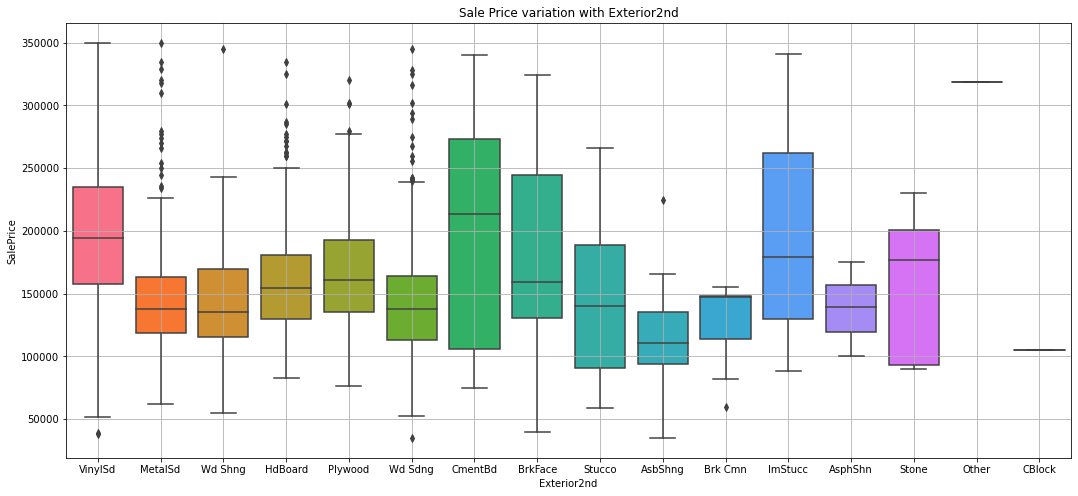

In [128]:
plt.figure(figsize=(18,8))
sns.boxplot(x='Exterior2nd', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('Exterior2nd')
plt.title('Sale Price variation with Exterior2nd')
plt.grid()

_**Exterior1st**_ - Exterior covering on house

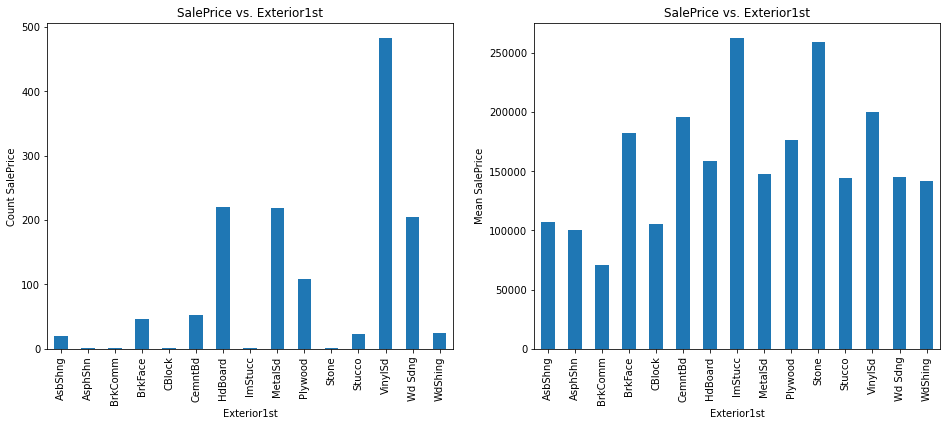

In [129]:
bf = df['SalePrice'].groupby(df['Exterior1st']).mean()
bf2 = df['SalePrice'].groupby(df['Exterior1st']).count()

plt.subplot(1, 2, 2)
bf.plot(kind='bar', title='SalePrice vs. Exterior1st', xlabel='Exterior1st', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
bf2.plot(kind='bar', title='SalePrice vs. Exterior1st', xlabel='Exterior1st', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

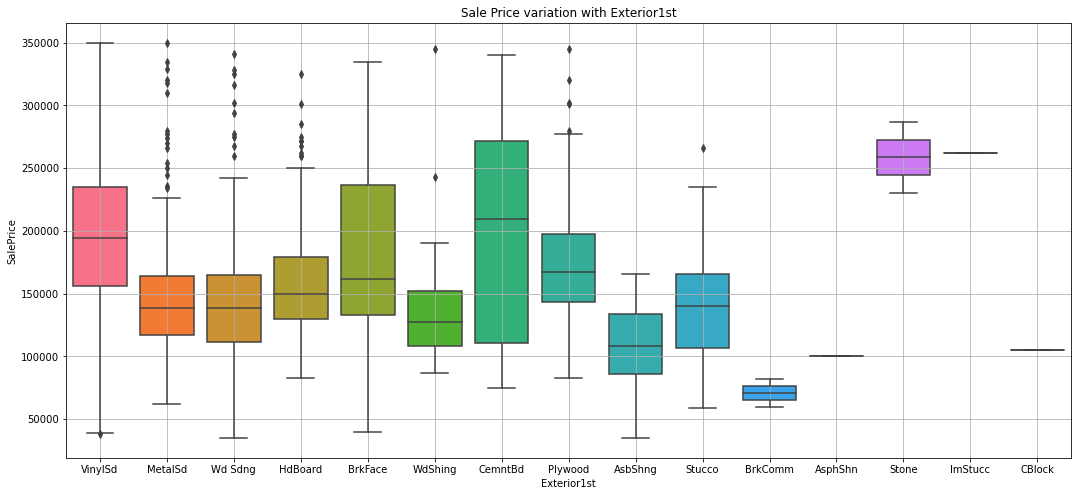

In [130]:
plt.figure(figsize=(18,8))
sns.boxplot(x='Exterior1st', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('Exterior1st')
plt.title('Sale Price variation with Exterior1st')
plt.grid()

_**RoofMatl**_ - Roof material

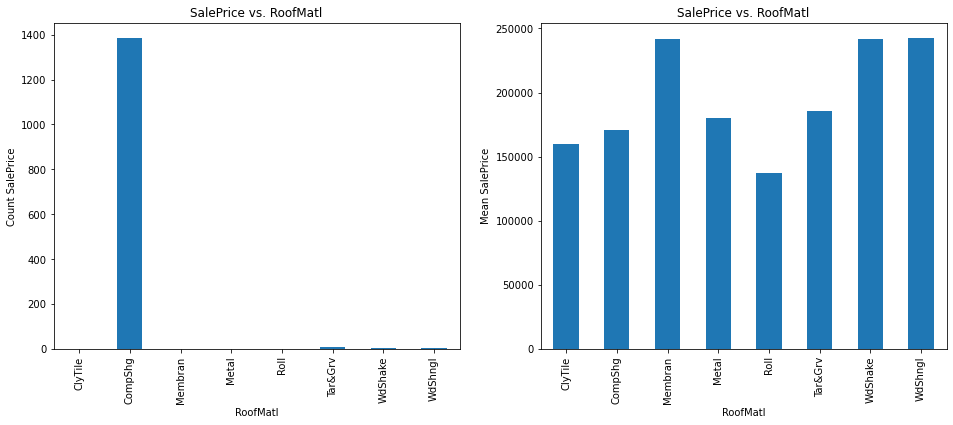

In [131]:
bf = df['SalePrice'].groupby(df['RoofMatl']).mean()
bf2 = df['SalePrice'].groupby(df['RoofMatl']).count()

plt.subplot(1, 2, 2)
bf.plot(kind='bar', title='SalePrice vs. RoofMatl', xlabel='RoofMatl', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
bf2.plot(kind='bar', title='SalePrice vs. RoofMatl', xlabel='RoofMatl', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

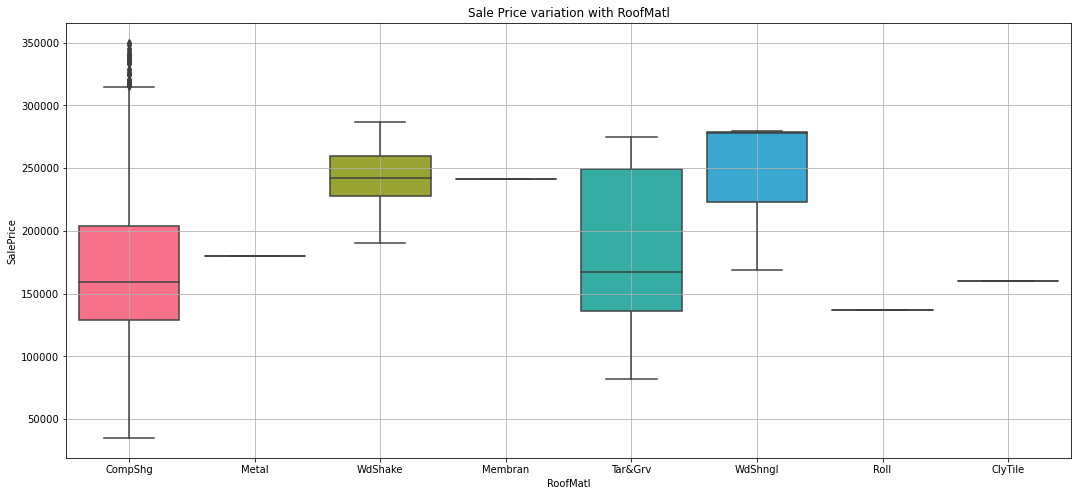

In [132]:
plt.figure(figsize=(18,8))
sns.boxplot(x='RoofMatl', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('RoofMatl')
plt.title('Sale Price variation with RoofMatl')
plt.grid()

_**RoofStyle**_ - Type of roof  

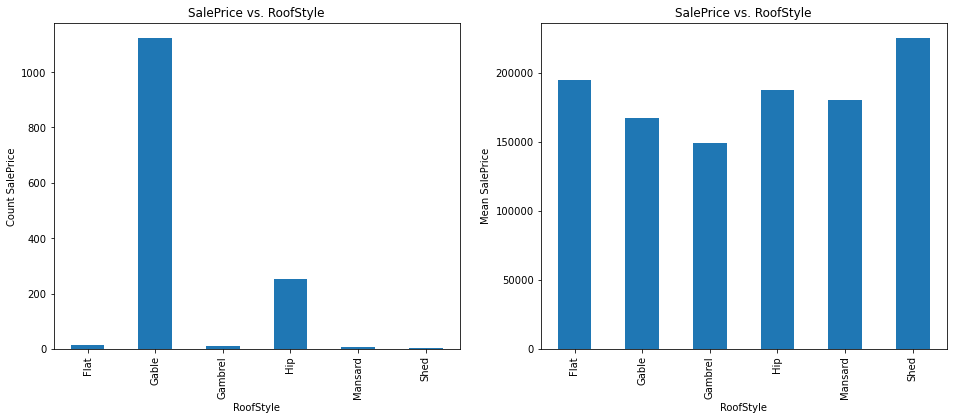

In [133]:
bf = df['SalePrice'].groupby(df['RoofStyle']).mean()
bf2 = df['SalePrice'].groupby(df['RoofStyle']).count()

plt.subplot(1, 2, 2)
bf.plot(kind='bar', title='SalePrice vs. RoofStyle', xlabel='RoofStyle', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
bf2.plot(kind='bar', title='SalePrice vs. RoofStyle', xlabel='RoofStyle', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

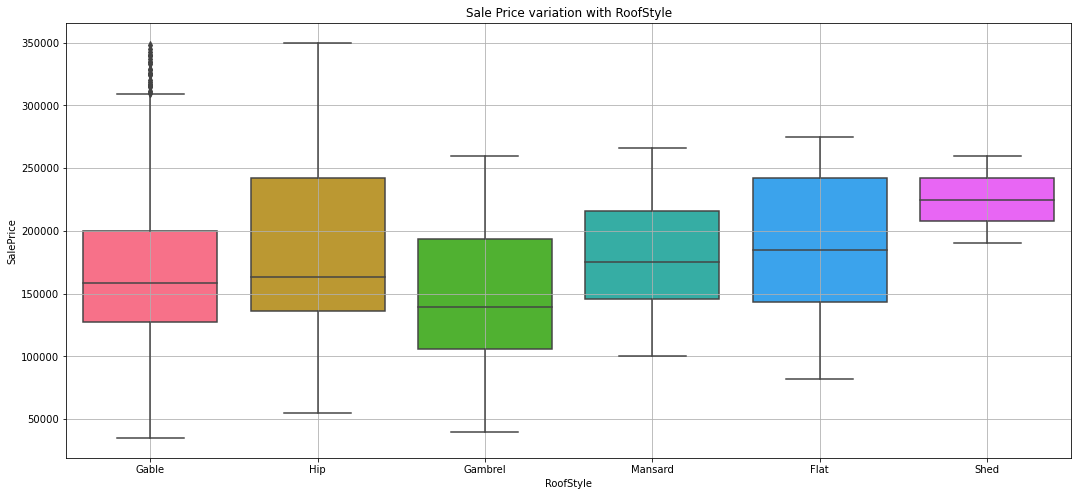

In [134]:
plt.figure(figsize=(18,8))
sns.boxplot(x='RoofStyle', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('RoofStyle')
plt.title('Sale Price variation with RoofStyle')
plt.grid()

_**YearRemodAdd**_ - Remodel date (same as construction date if no remodeling or additions)

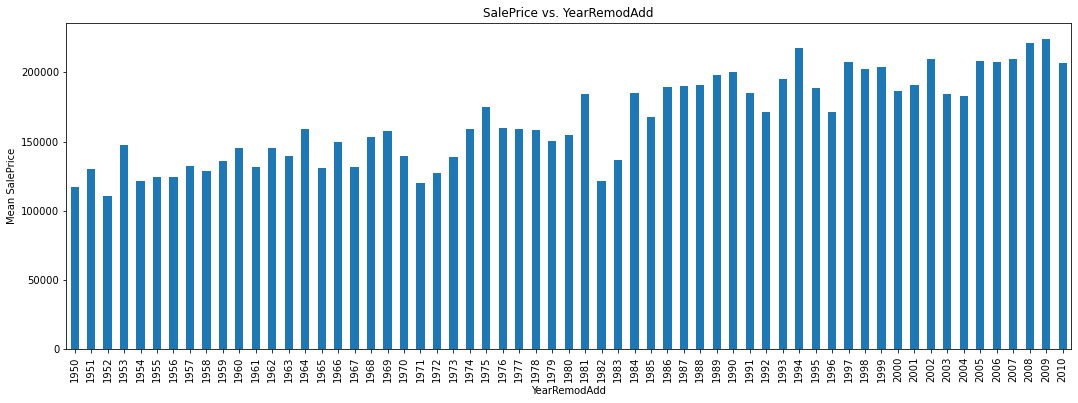

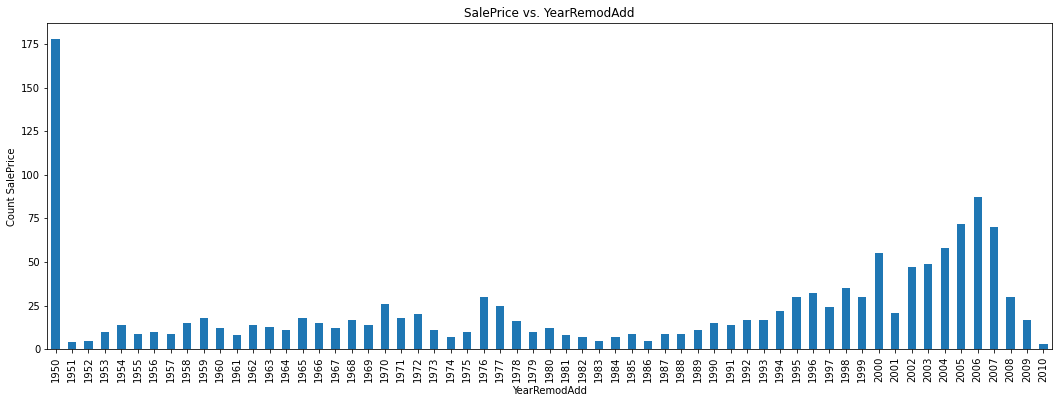

In [135]:
df['YearRemodAdd'] = df['YearRemodAdd'].astype(int) 

garayr = df['SalePrice'].groupby(df['YearRemodAdd']).mean()
garayr2 = df['SalePrice'].groupby(df['YearRemodAdd']).count()

garayr.plot(kind='bar', title='SalePrice vs. YearRemodAdd', xlabel='YearRemodAdd', ylabel='Mean SalePrice', figsize=(18, 6))
plt.show()
garayr2.plot(kind='bar', title='SalePrice vs. YearRemodAdd', xlabel='YearRemodAdd', ylabel='Count SalePrice', figsize=(18, 6))
plt.show()

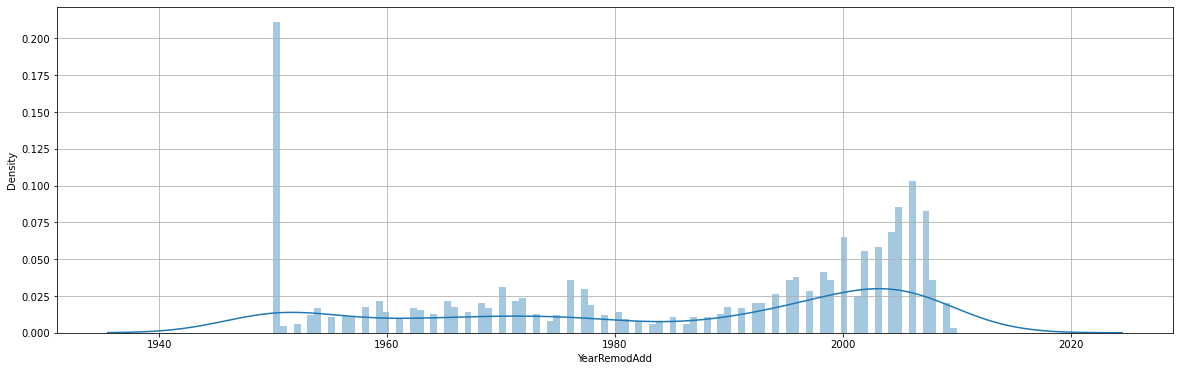

In [136]:
plt.figure(figsize=(20, 6))
sns.distplot(df['YearRemodAdd'], bins=100, hist_kws={'alpha': 0.4});
plt.grid()
plt.show()

_**YearBuilt**_ - Original construction date

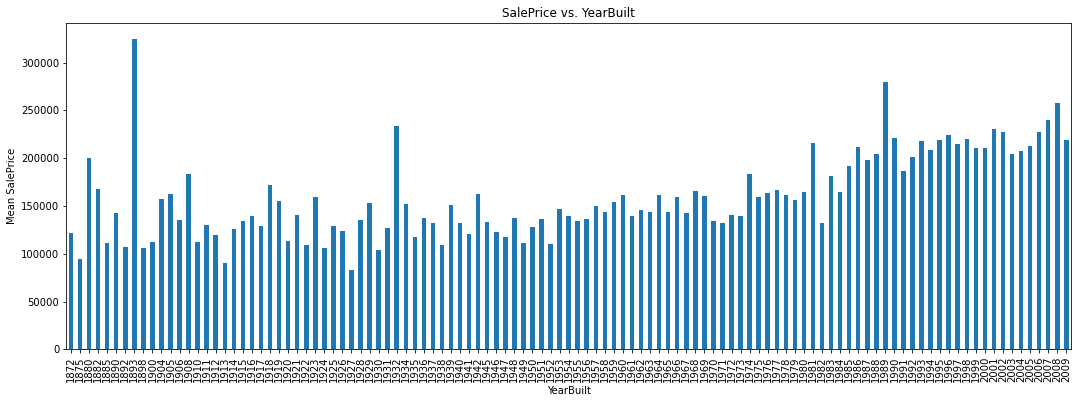

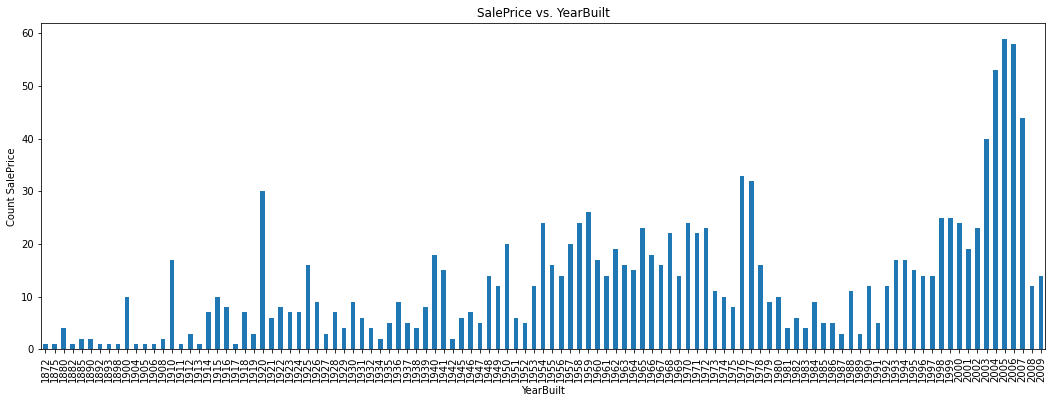

In [137]:
df['YearBuilt'] = df['YearBuilt'].astype(int) 

garayr = df['SalePrice'].groupby(df['YearBuilt']).mean()
garayr2 = df['SalePrice'].groupby(df['YearBuilt']).count()

garayr.plot(kind='bar', title='SalePrice vs. YearBuilt', xlabel='YearBuilt', ylabel='Mean SalePrice', figsize=(18, 6))
plt.show()
garayr2.plot(kind='bar', title='SalePrice vs. YearBuilt', xlabel='YearBuilt', ylabel='Count SalePrice', figsize=(18, 6))
plt.show()

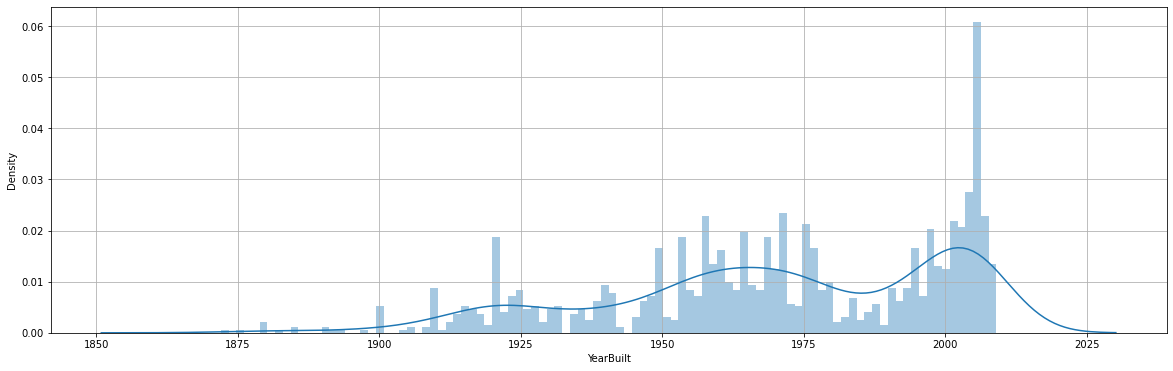

In [138]:
plt.figure(figsize=(20, 6))
sns.distplot(df['YearBuilt'], bins=100, hist_kws={'alpha': 0.4});
plt.grid()
plt.show()

_**OverallQual**_ - Rates the overall material and finish of the house

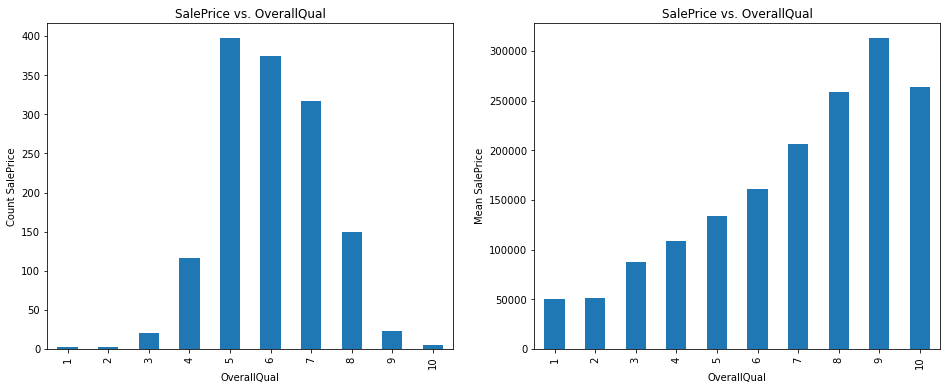

In [139]:
bf = df['SalePrice'].groupby(df['OverallQual']).mean()
bf2 = df['SalePrice'].groupby(df['OverallQual']).count()

plt.subplot(1, 2, 2)
bf.plot(kind='bar', title='SalePrice vs. OverallQual', xlabel='OverallQual', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
bf2.plot(kind='bar', title='SalePrice vs. OverallQual', xlabel='OverallQual', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

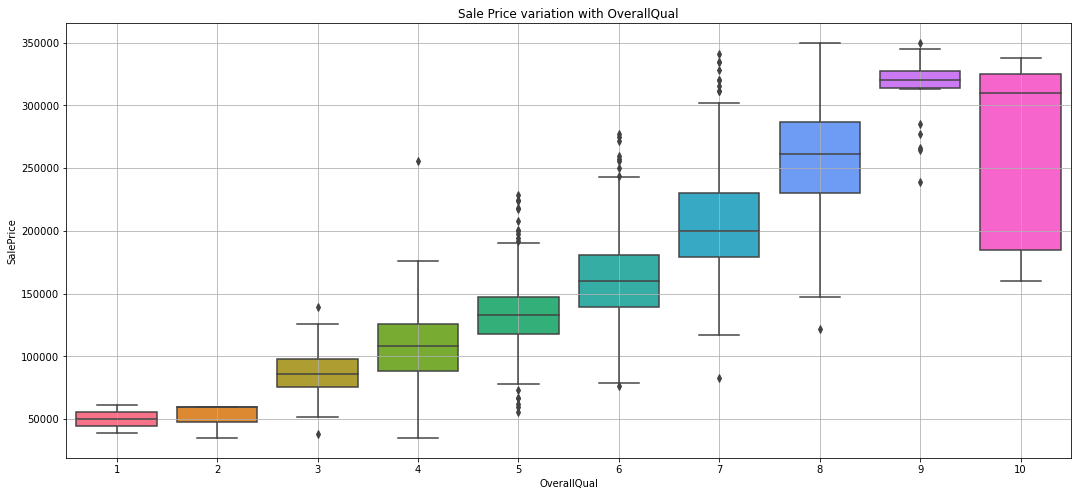

In [140]:
plt.figure(figsize=(18,8))
sns.boxplot(x='OverallQual', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('OverallQual')
plt.title('Sale Price variation with OverallQual')
plt.grid()

_**HouseStyle**_ - Style of dwelling

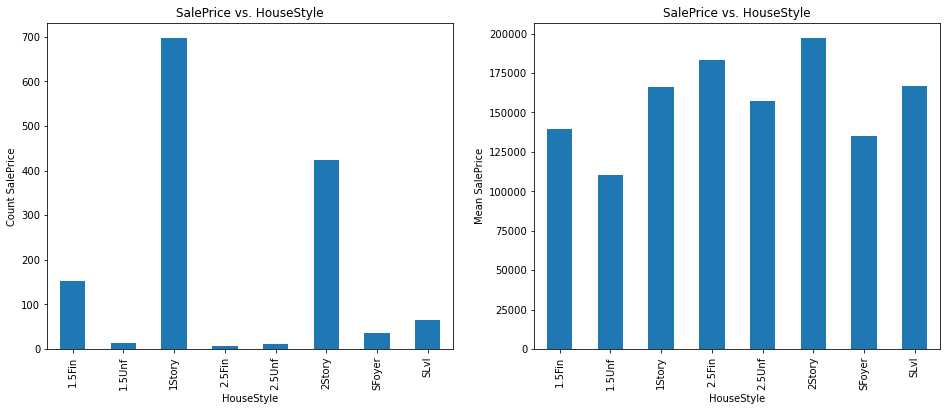

In [141]:
bf = df['SalePrice'].groupby(df['HouseStyle']).mean()
bf2 = df['SalePrice'].groupby(df['HouseStyle']).count()

plt.subplot(1, 2, 2)
bf.plot(kind='bar', title='SalePrice vs. HouseStyle', xlabel='HouseStyle', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
bf2.plot(kind='bar', title='SalePrice vs. HouseStyle', xlabel='HouseStyle', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

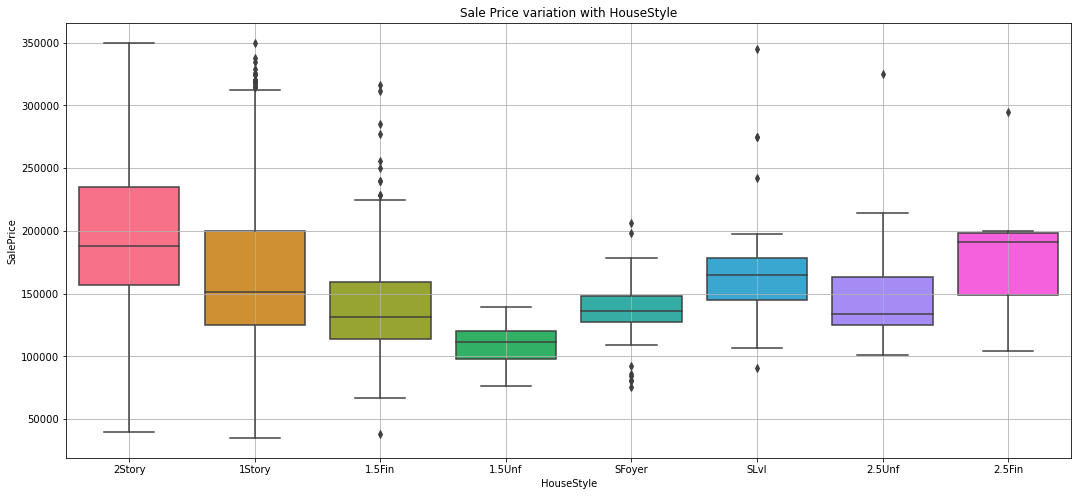

In [142]:
plt.figure(figsize=(18,8))
sns.boxplot(x='HouseStyle', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('HouseStyle')
plt.title('Sale Price variation with HouseStyle')
plt.grid()

_**BldgType**_ - Type of dwelling

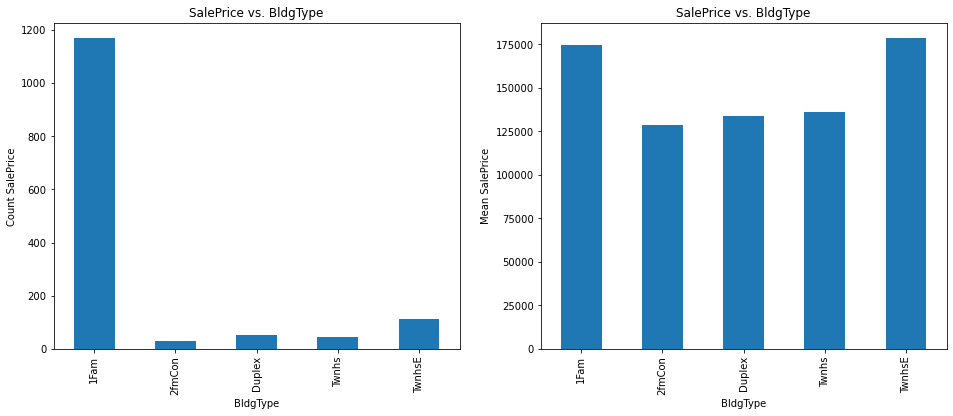

In [143]:
bf = df['SalePrice'].groupby(df['BldgType']).mean()
bf2 = df['SalePrice'].groupby(df['BldgType']).count()

plt.subplot(1, 2, 2)
bf.plot(kind='bar', title='SalePrice vs. BldgType', xlabel='BldgType', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
bf2.plot(kind='bar', title='SalePrice vs. BldgType', xlabel='BldgType', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

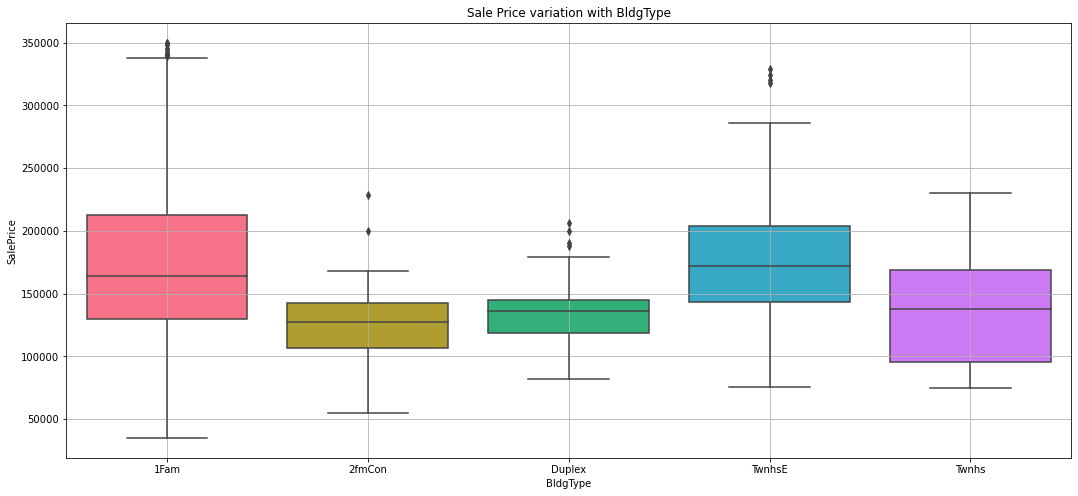

In [144]:
plt.figure(figsize=(18,8))
sns.boxplot(x='BldgType', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('BldgType')
plt.title('Sale Price variation with BldgType')
plt.grid()

_**Condition2**_ - Proximity to various conditions (if more than one is present)

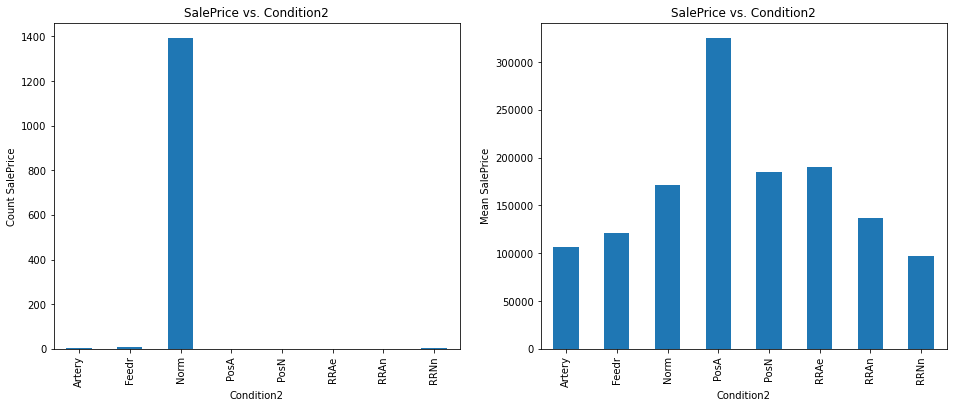

In [145]:
bf = df['SalePrice'].groupby(df['Condition2']).mean()
bf2 = df['SalePrice'].groupby(df['Condition2']).count()

plt.subplot(1, 2, 2)
bf.plot(kind='bar', title='SalePrice vs. Condition2', xlabel='Condition2', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
bf2.plot(kind='bar', title='SalePrice vs. Condition2', xlabel='Condition2', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

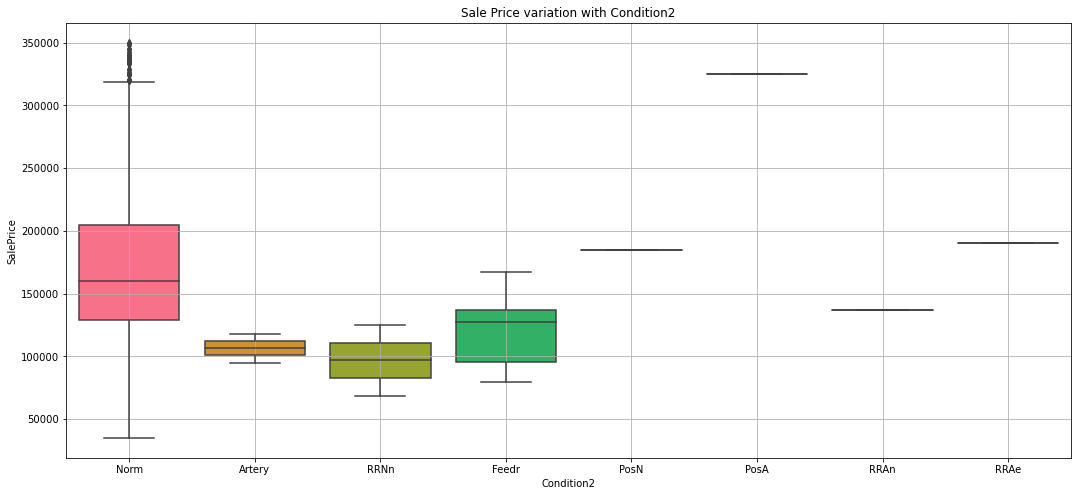

In [146]:
plt.figure(figsize=(18,8))
sns.boxplot(x='Condition2', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('Condition2')
plt.title('Sale Price variation with Condition2')
plt.grid()

_**Condition1**_ - Proximity to various conditions

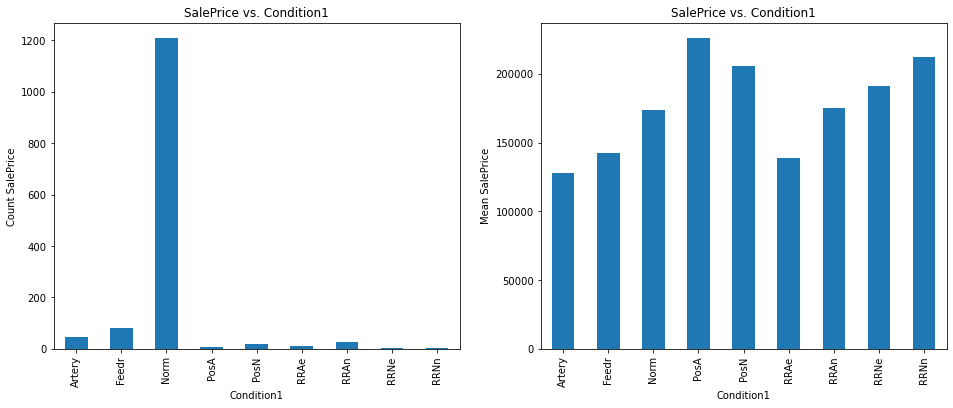

In [147]:
bf = df['SalePrice'].groupby(df['Condition1']).mean()
bf2 = df['SalePrice'].groupby(df['Condition1']).count()

plt.subplot(1, 2, 2)
bf.plot(kind='bar', title='SalePrice vs. Condition1', xlabel='Condition1', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
bf2.plot(kind='bar', title='SalePrice vs. Condition1', xlabel='Condition1', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

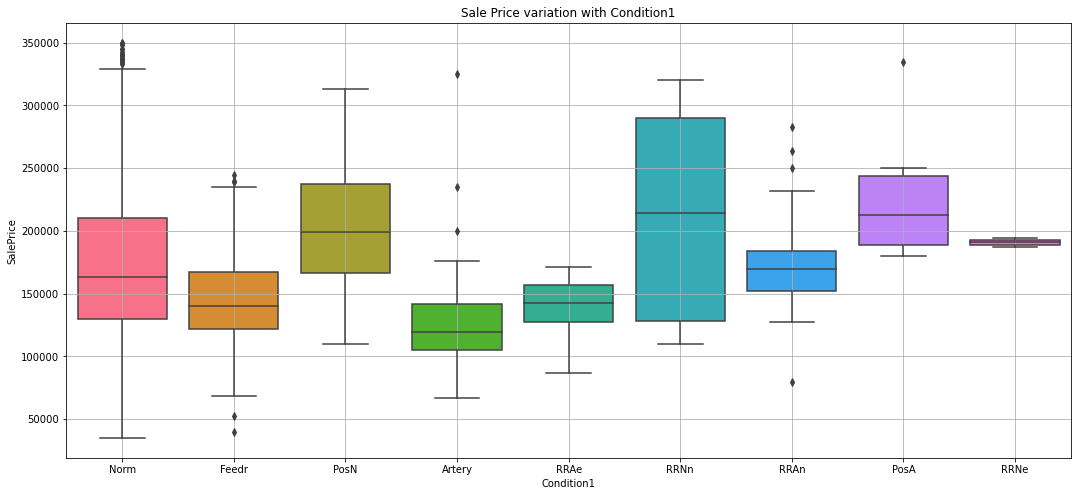

In [148]:
plt.figure(figsize=(18,8))
sns.boxplot(x='Condition1', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('Condition1')
plt.title('Sale Price variation with Condition1')
plt.grid()

_**Neighborhood**_ - Physical locations within Ames city limits 

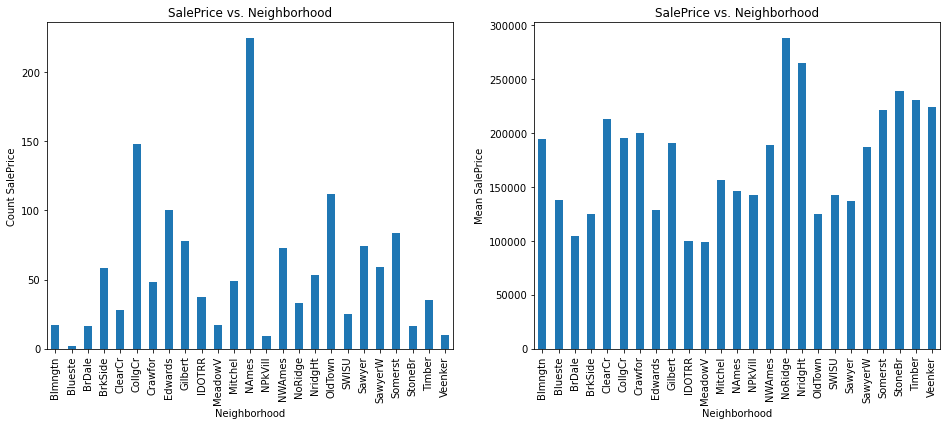

In [149]:
bf = df['SalePrice'].groupby(df['Neighborhood']).mean()
bf2 = df['SalePrice'].groupby(df['Neighborhood']).count()

plt.subplot(1, 2, 2)
bf.plot(kind='bar', title='SalePrice vs. Neighborhood', xlabel='Neighborhood', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
bf2.plot(kind='bar', title='SalePrice vs. Neighborhood', xlabel='Neighborhood', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

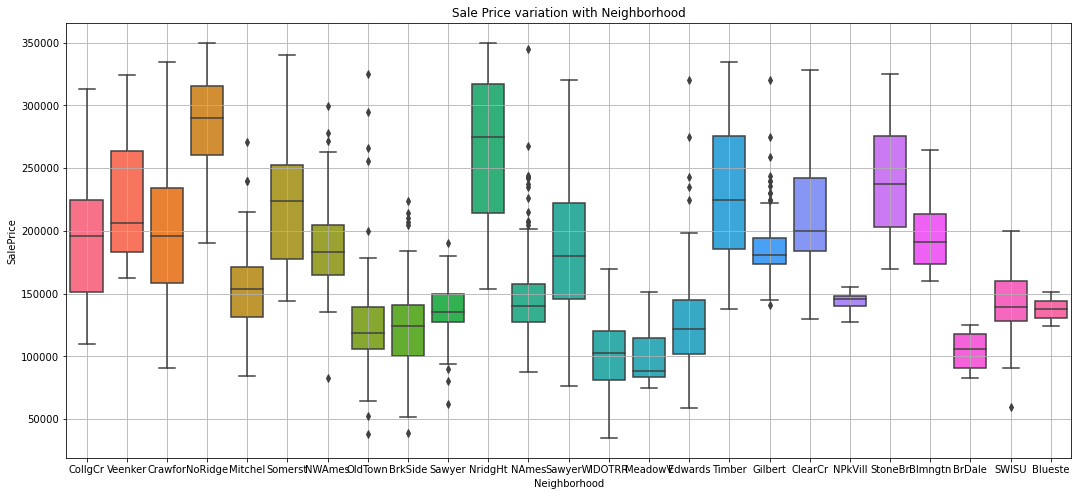

In [150]:
plt.figure(figsize=(18,8))
sns.boxplot(x='Neighborhood', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('Neighborhood')
plt.title('Sale Price variation with Neighborhood')
plt.grid()

_**LandSlope**_ - Slope of property

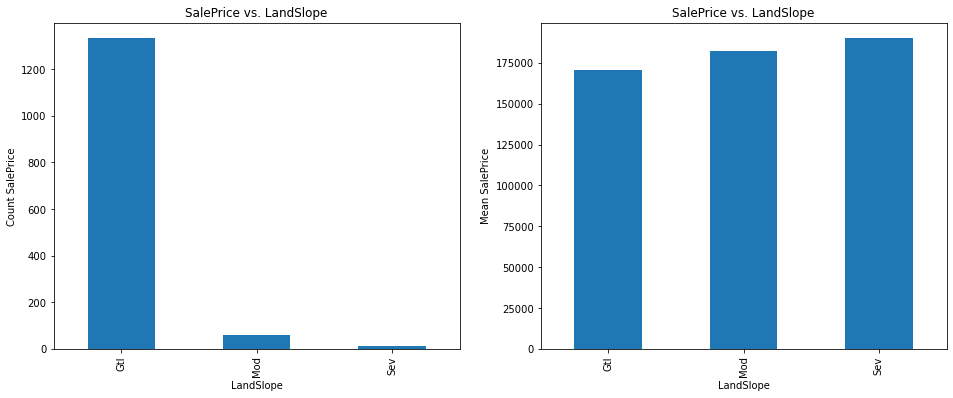

In [151]:
bf = df['SalePrice'].groupby(df['LandSlope']).mean()
bf2 = df['SalePrice'].groupby(df['LandSlope']).count()

plt.subplot(1, 2, 2)
bf.plot(kind='bar', title='SalePrice vs. LandSlope', xlabel='LandSlope', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
bf2.plot(kind='bar', title='SalePrice vs. LandSlope', xlabel='LandSlope', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

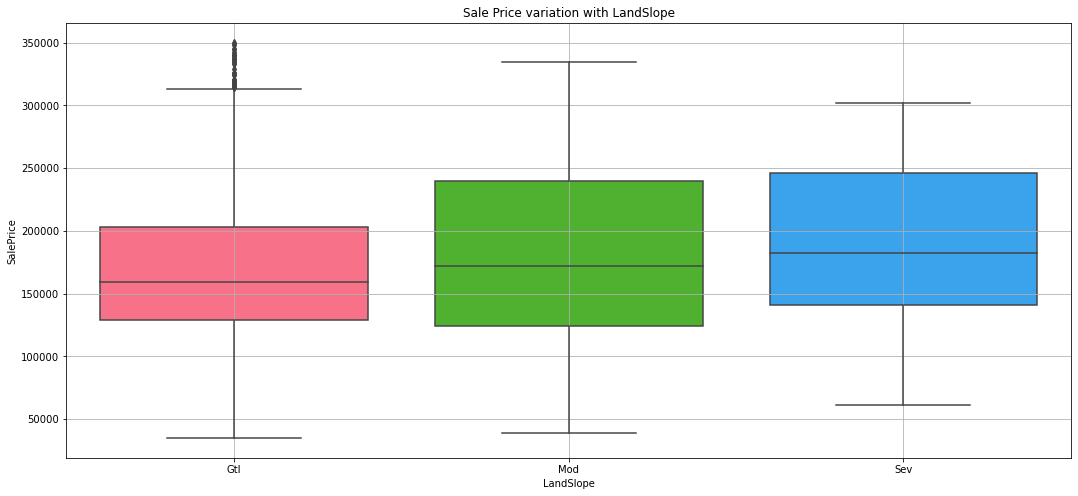

In [152]:
plt.figure(figsize=(18,8))
sns.boxplot(x='LandSlope', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('LandSlope')
plt.title('Sale Price variation with LandSlope')
plt.grid()

_**LotConfig**_ - Lot configuration

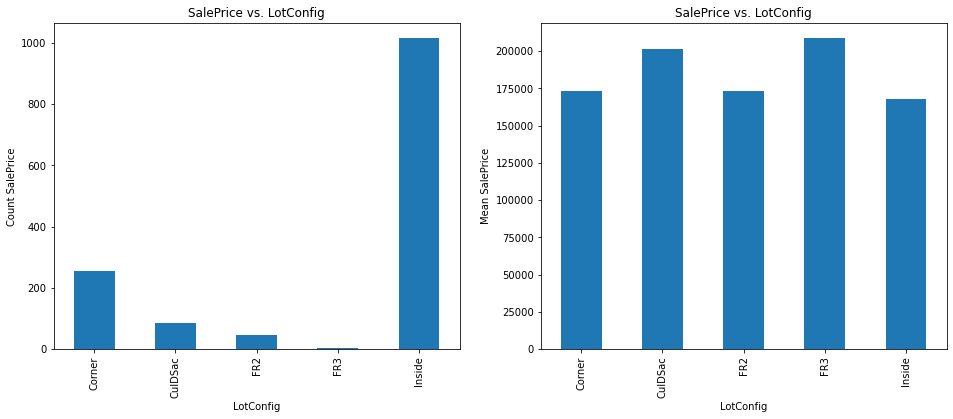

In [153]:
bf = df['SalePrice'].groupby(df['LotConfig']).mean()
bf2 = df['SalePrice'].groupby(df['LotConfig']).count()

plt.subplot(1, 2, 2)
bf.plot(kind='bar', title='SalePrice vs. LotConfig', xlabel='LotConfig', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
bf2.plot(kind='bar', title='SalePrice vs. LotConfig', xlabel='LotConfig', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

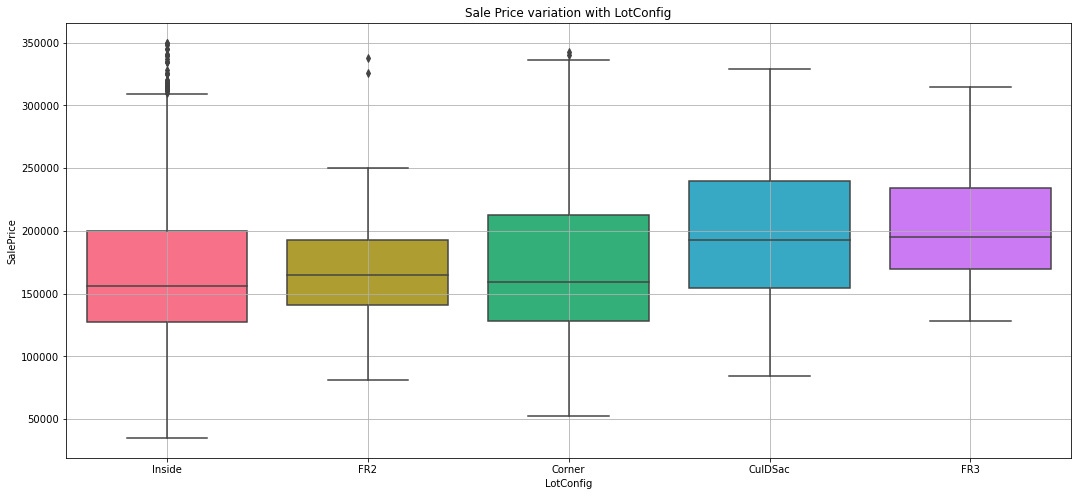

In [154]:
plt.figure(figsize=(18,8))
sns.boxplot(x='LotConfig', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('LotConfig')
plt.title('Sale Price variation with LotConfig')
plt.grid()

_**Utilities**_ - Type of utilities available

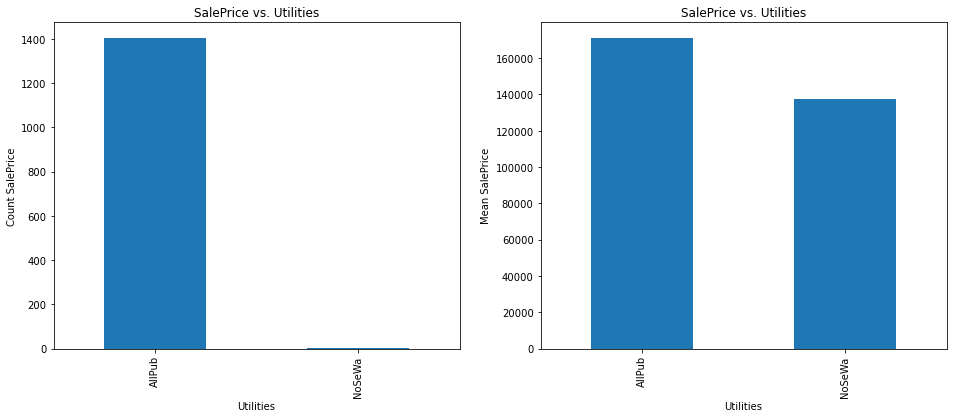

In [155]:
bf = df['SalePrice'].groupby(df['Utilities']).mean()
bf2 = df['SalePrice'].groupby(df['Utilities']).count()

plt.subplot(1, 2, 2)
bf.plot(kind='bar', title='SalePrice vs. Utilities', xlabel='Utilities', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
bf2.plot(kind='bar', title='SalePrice vs. Utilities', xlabel='Utilities', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

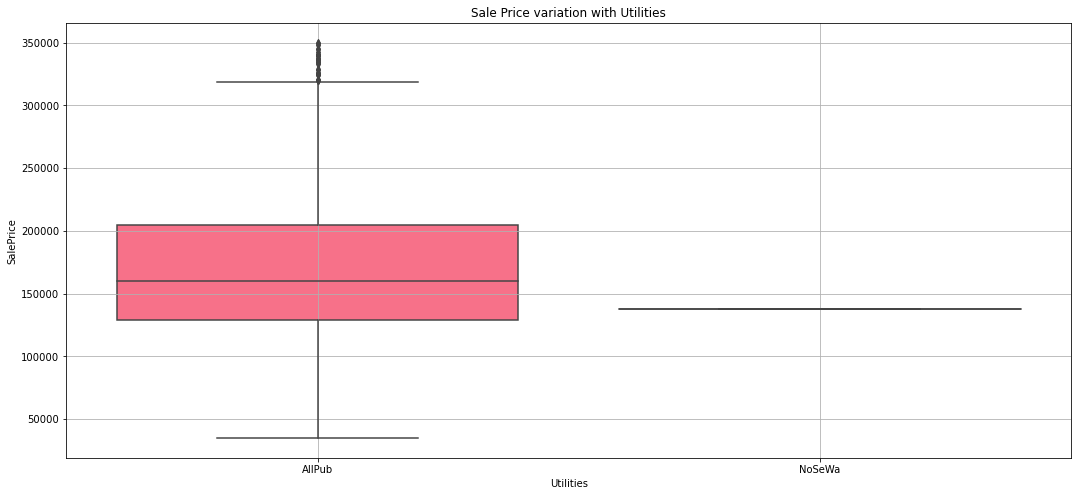

In [156]:
plt.figure(figsize=(18,8))
sns.boxplot(x='Utilities', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('Utilities')
plt.title('Sale Price variation with Utilities')
plt.grid()

In [157]:
df = df.drop(columns = ['Utilities'])

_**LandContour**_ - Flatness of the property 

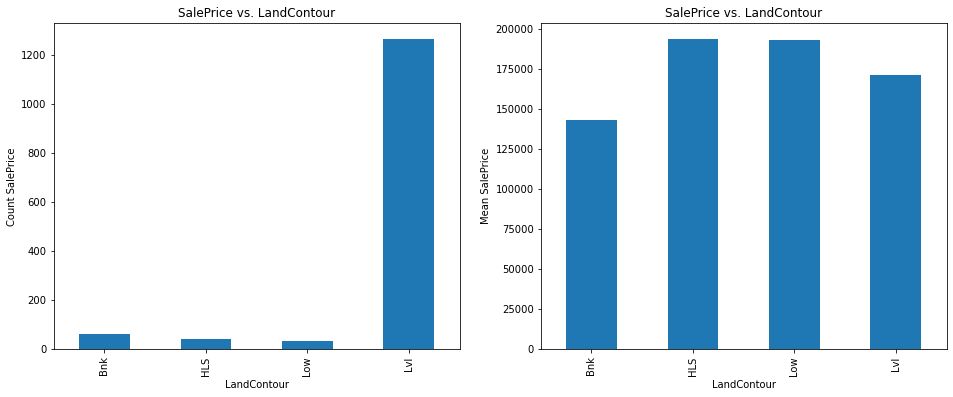

In [158]:
bf = df['SalePrice'].groupby(df['LandContour']).mean()
bf2 = df['SalePrice'].groupby(df['LandContour']).count()

plt.subplot(1, 2, 2)
bf.plot(kind='bar', title='SalePrice vs. LandContour', xlabel='LandContour', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
bf2.plot(kind='bar', title='SalePrice vs. LandContour', xlabel='LandContour', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

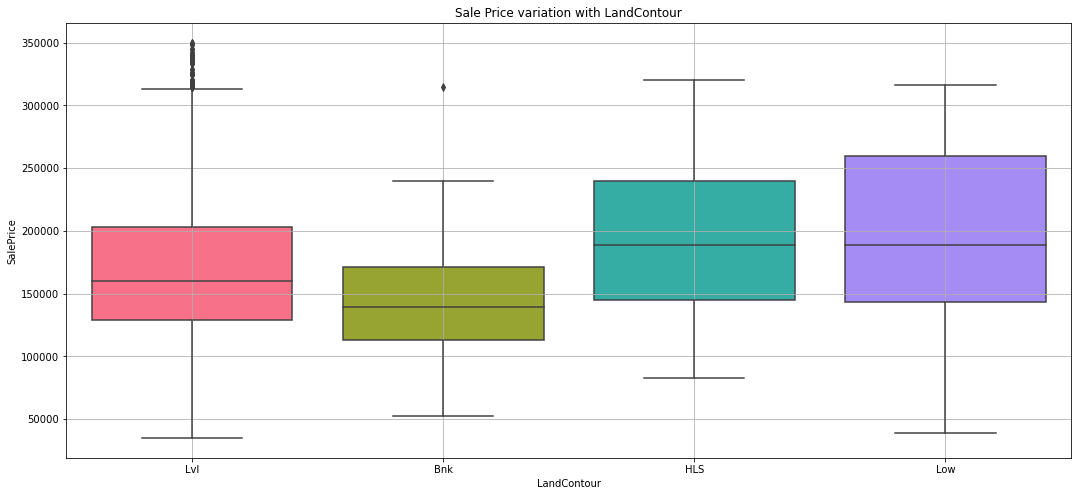

In [159]:
plt.figure(figsize=(18,8))
sns.boxplot(x='LandContour', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('LandContour')
plt.title('Sale Price variation with LandContour')
plt.grid()

_**LotShape**_ - General shape of property

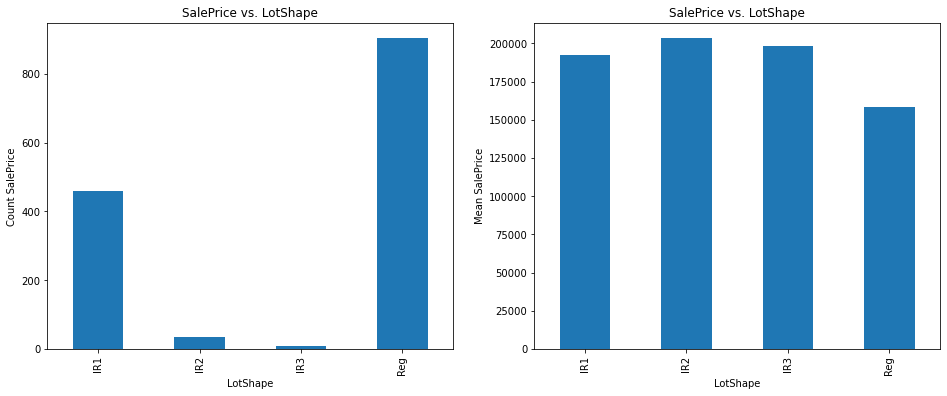

In [160]:
bf = df['SalePrice'].groupby(df['LotShape']).mean()
bf2 = df['SalePrice'].groupby(df['LotShape']).count()

plt.subplot(1, 2, 2)
bf.plot(kind='bar', title='SalePrice vs. LotShape', xlabel='LotShape', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
bf2.plot(kind='bar', title='SalePrice vs. LotShape', xlabel='LotShape', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

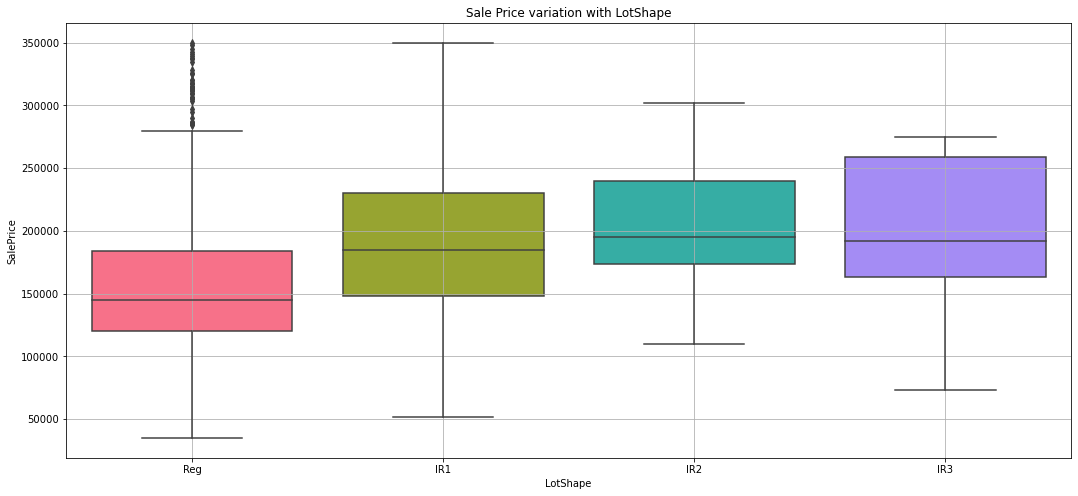

In [161]:
plt.figure(figsize=(18,8))
sns.boxplot(x='LotShape', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('LotShape')
plt.title('Sale Price variation with LotShape')
plt.grid()

_**Street**_ - Type of road access to property

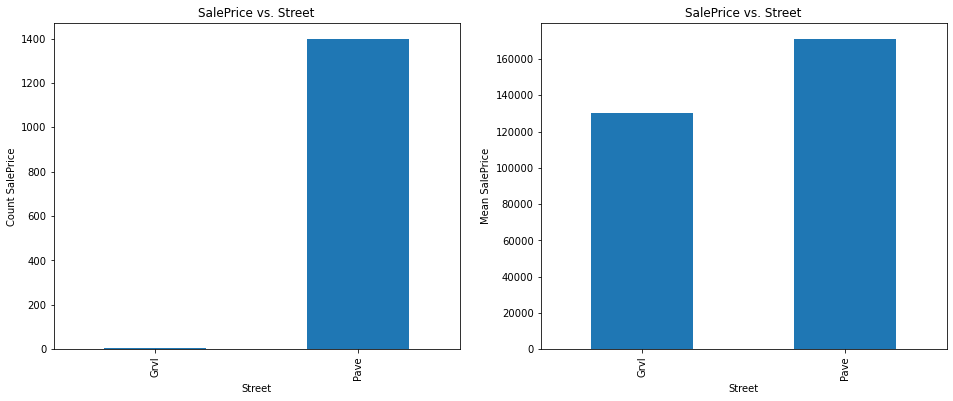

In [162]:
bf = df['SalePrice'].groupby(df['Street']).mean()
bf2 = df['SalePrice'].groupby(df['Street']).count()

plt.subplot(1, 2, 2)
bf.plot(kind='bar', title='SalePrice vs. Street', xlabel='Street', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
bf2.plot(kind='bar', title='SalePrice vs. Street', xlabel='Street', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

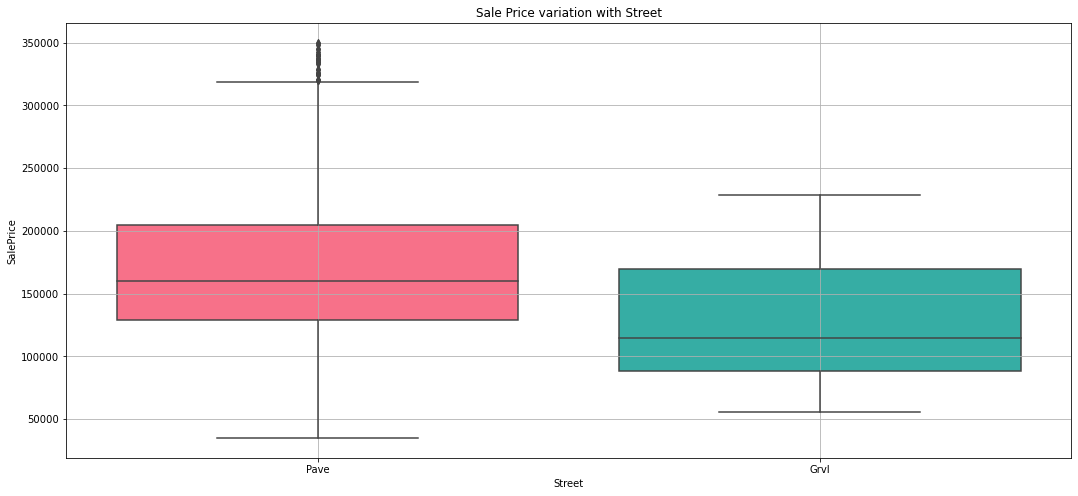

In [163]:
plt.figure(figsize=(18,8))
sns.boxplot(x='Street', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('Street')
plt.title('Sale Price variation with Street')
plt.grid()

_**LotArea**_ - Lot size in square feet


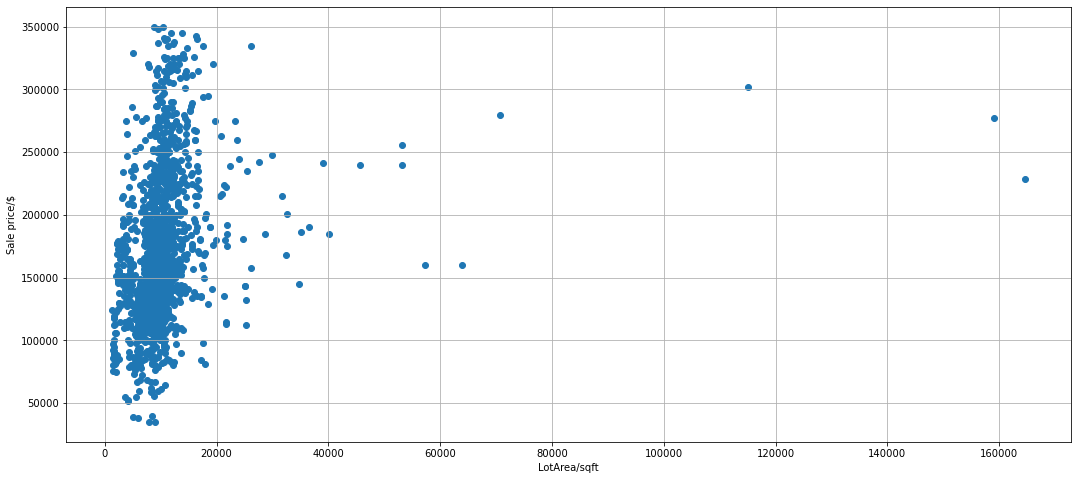

In [164]:
plt.figure(figsize=(18,8))
plt.scatter(df['LotArea'], df['SalePrice'])
plt.xlabel('LotArea/sqft')
plt.ylabel('Sale price/$')
plt.grid()
plt.show()

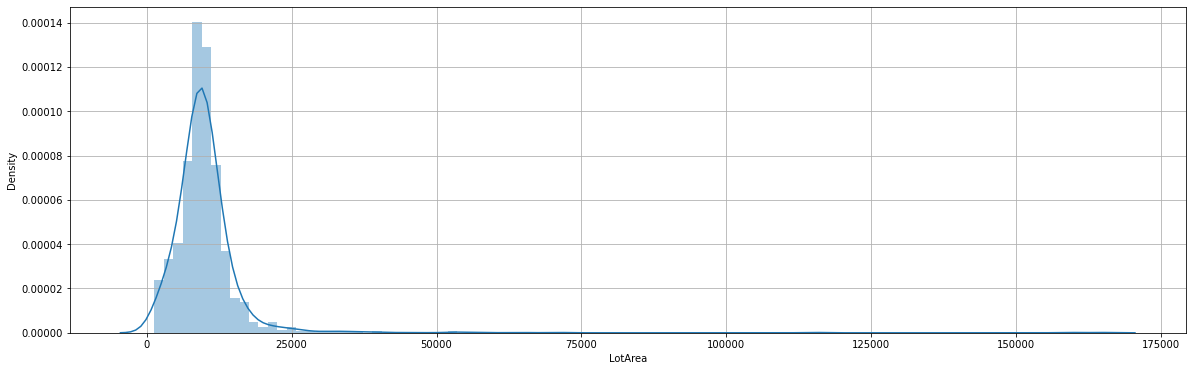

In [165]:
plt.figure(figsize=(20, 6))
sns.distplot(df['LotArea'], bins=100, hist_kws={'alpha': 0.4});
plt.grid()
plt.show()

_**LotFrontage**_ - Linear feet of street connected to property

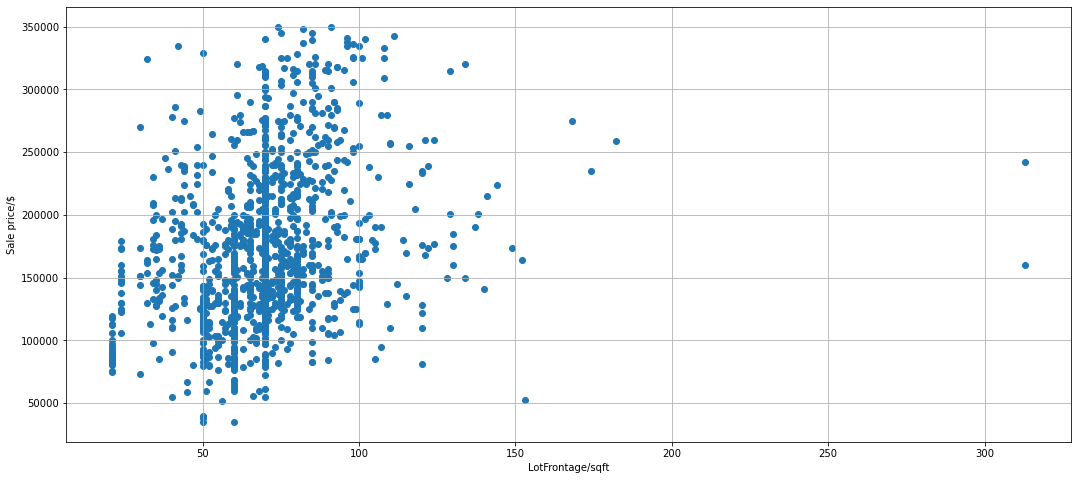

In [166]:
plt.figure(figsize=(18,8))
plt.scatter(df['LotFrontage'], df['SalePrice'])
plt.xlabel('LotFrontage/sqft')
plt.ylabel('Sale price/$')
plt.grid()
plt.show()

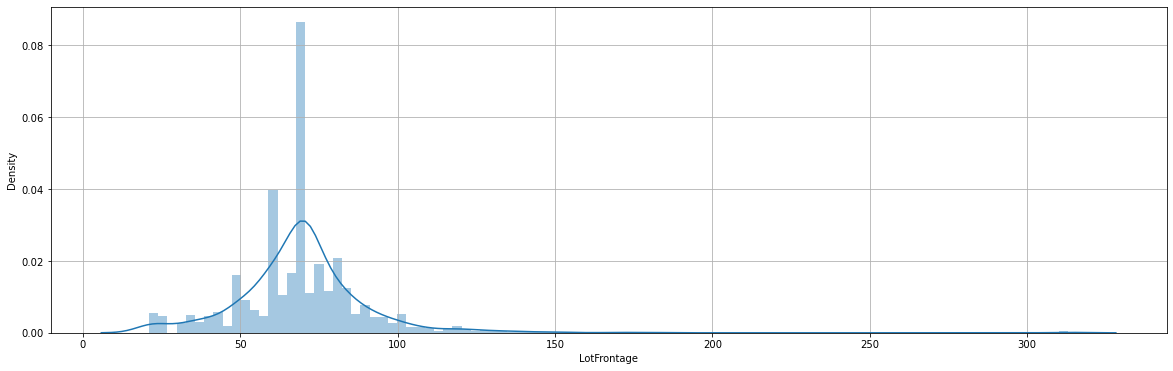

In [167]:
plt.figure(figsize=(20, 6))
sns.distplot(df['LotFrontage'], bins=100, hist_kws={'alpha': 0.4});
plt.grid()
plt.show()

_**MSZoning**_ - Identifies the general zoning classification of the sale

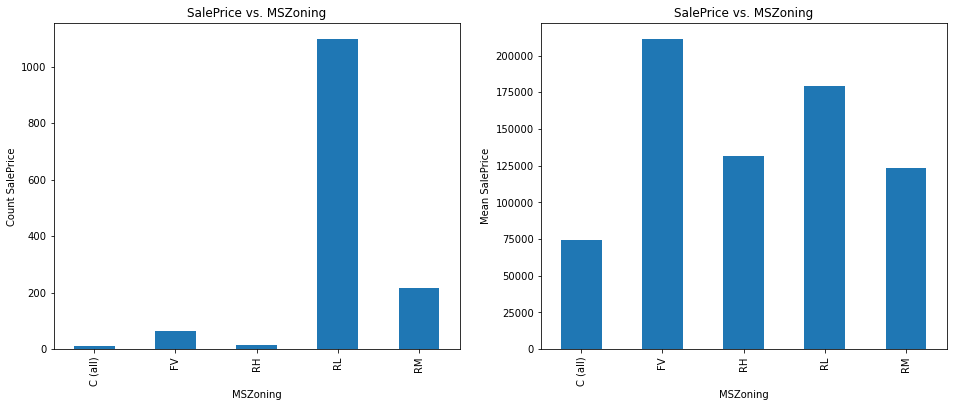

In [168]:
bf = df['SalePrice'].groupby(df['MSZoning']).mean()
bf2 = df['SalePrice'].groupby(df['MSZoning']).count()

plt.subplot(1, 2, 2)
bf.plot(kind='bar', title='SalePrice vs. MSZoning', xlabel='MSZoning', ylabel='Mean SalePrice', figsize=(16, 6))
plt.subplot(1, 2, 1)
bf2.plot(kind='bar', title='SalePrice vs. MSZoning', xlabel='MSZoning', ylabel='Count SalePrice', figsize=(16, 6))
plt.show()

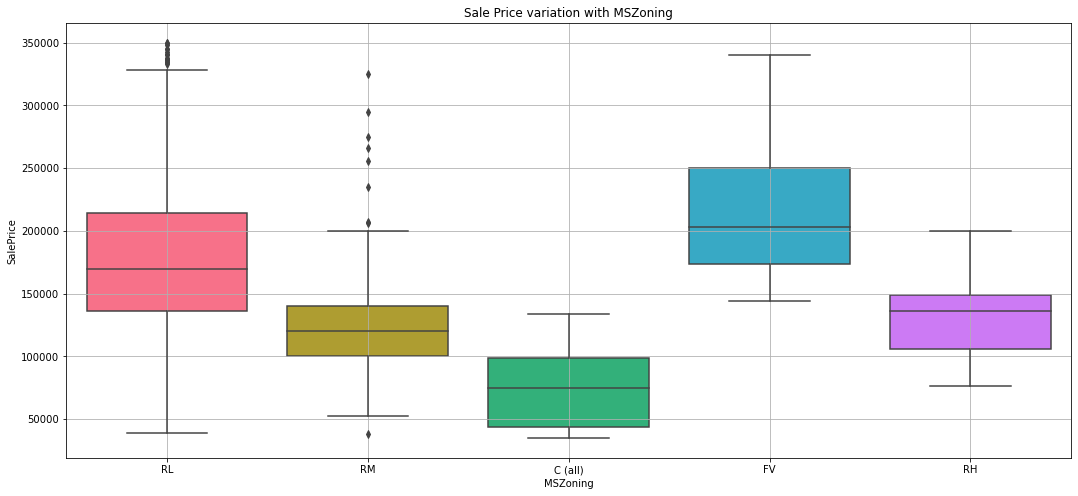

In [169]:
plt.figure(figsize=(18,8))
sns.boxplot(x='MSZoning', y='SalePrice',palette="husl", data=df,saturation=1)
plt.xticks(rotation=0)
plt.xlabel('MSZoning')
plt.title('Sale Price variation with MSZoning')
plt.grid()

## Development of Machine Learning Models <a class="anchor" id="ml"></a>

First, we need to convert categorical data so that it can interpreted by the models

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1406 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1406 non-null   object 
 1   LotFrontage    1406 non-null   float64
 2   LotArea        1406 non-null   int64  
 3   Street         1406 non-null   object 
 4   LotShape       1406 non-null   object 
 5   LandContour    1406 non-null   object 
 6   LotConfig      1406 non-null   object 
 7   LandSlope      1406 non-null   object 
 8   Neighborhood   1406 non-null   object 
 9   Condition1     1406 non-null   object 
 10  Condition2     1406 non-null   object 
 11  BldgType       1406 non-null   object 
 12  HouseStyle     1406 non-null   object 
 13  OverallQual    1406 non-null   int64  
 14  YearBuilt      1406 non-null   int32  
 15  YearRemodAdd   1406 non-null   int32  
 16  RoofStyle      1406 non-null   object 
 17  RoofMatl       1406 non-null   object 
 18  Exterior

In [201]:
df2 = pd.get_dummies(df, drop_first=True) #convert from categorical to numerical

In [202]:
df2.describe()

LotFrontage        LotArea  OverallQual    YearBuilt  YearRemodAdd  \
count  1406.000000    1406.000000  1406.000000  1406.000000   1406.000000   
mean     69.322902   10162.550498     5.995021  1970.209815   1984.137269   
std      21.528321    8306.491402     1.290250    30.000061     20.642845   
min      21.000000    1300.000000     1.000000  1872.000000   1950.000000   
25%      60.000000    7454.750000     5.000000  1953.000000   1966.000000   
50%      70.000000    9338.500000     6.000000  1972.000000   1992.000000   
75%      78.000000   11329.000000     7.000000  1999.000000   2003.000000   
max     313.000000  164660.000000    10.000000  2009.000000   2010.000000   

        BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF    GrLivArea  ...  \
count  1406.000000  1406.000000  1406.000000  1406.000000  1406.000000  ...   
mean    420.604552   558.904694  1026.751778  1134.247511  1479.001422  ...   
std     431.217489   429.095405   408.214050   358.365443   483.908357  ...   
min       0.000000     0.000000     0.000000   334.000000   334.000000  ...   
25%       0.000000   218.000000   788.250000   872.500000  1120.250000  ...   
50%     371.000000   474.000000   975.000000  1072.000000  1440.000000  ...   
75%     689.000000   806.000000  1255.250000  1350.000000  1732.750000  ...   
max    5644.000000  2042.000000  6110.000000  4692.000000  5642.000000  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count     1406.000000     1406.000000   1406.000000   1406.000000   
mean         0.002845        0.003556      0.066145      0.002134   
std          0.053281        0.059549      0.248624      0.046159   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count  1406.000000            1406.000000           1406.000000   
mean      0.884068               0.002845              0.007824   
std       0.320257               0.053281              0.088136   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count           1406.000000           1406.000000            1406.000000  
mean               0.014225              0.835704               0.068279  
std                0.118458              0.370676               0.252313  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 225 columns]

Next, we identify the independent and dependent variables.

In [203]:
df3 = df2_norm = (df2 - df2.min()) / (df2.max() - df2.min())

In [204]:
X = df2.drop("SalePrice", axis=1) #independent variables
Y = df2["SalePrice"] #dependent variable
X3 = df3.drop("SalePrice", axis=1) #independent variables
Y3 = df3["SalePrice"] #dependent variable

Now it is necessary to split the data intro a training set to train our models, and a testing set to determine the accuracy and validate them.

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [206]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.3, random_state=1)

In [207]:
X_train.shape

(984, 224)

In [208]:
y_train.shape

(984,)

In [209]:
X_test.shape

(422, 224)

In [210]:
y_test.shape

(422,)

_**Linear Regression**_

In [211]:
clf1 = LinearRegression()
clf1.fit(X_train, y_train)

LinearRegression()

In [212]:
print(clf1.intercept_)

-855122.2847259875


In [213]:
pd.DataFrame(clf1.coef_, X.columns, columns = ['Coeff'])

Coeff
LotFrontage               46.807830
LotArea                    0.834697
OverallQual             8037.047110
YearBuilt                198.742991
YearRemodAdd             215.307789
...                             ...
SaleCondition_AdjLand  -5430.962745
SaleCondition_Alloca   11765.058454
SaleCondition_Family    -644.677867
SaleCondition_Normal    4197.180711
SaleCondition_Partial  -6297.366656

[224 rows x 1 columns]

In [214]:
y_pred1 = clf1.predict(X_test)

In [215]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred1)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 16117.051722570035
MSE: 1093256104.2125926
RMSE: 33064.42354272326
R2 Score: 0.6769877608992203


In [216]:
results = pd.DataFrame()
results['Model'] = 'Linear regression'
results['MAE'] = mae
results['MSE'] = mse
results['RMSE'] = rmse
results['R2'] = r_squared

In [217]:
results = results.append({'Model': 'Linear regression', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r_squared}, ignore_index=True)

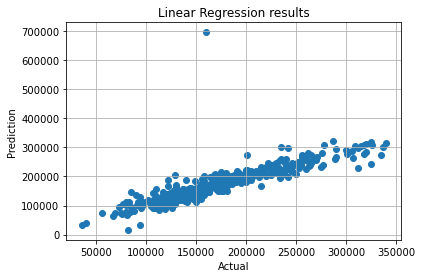

In [218]:
plt.scatter(y_test, y_pred1)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Linear Regression results')
plt.grid()
plt.show()

In [219]:
y_test2 = y_test.drop(y_test.index[393]) #remove outlier
y_pred12 = np.delete(y_pred1,393)

In [220]:
mae, mse, rmse, r_squared = evaluation(y_test2, y_pred12)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 14880.57220678327
MSE: 411719947.20839155
RMSE: 20290.883352096615
R2 Score: 0.8786271827492752


In [221]:
results = results.append({'Model': 'Linear Regression Opt', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r_squared}, ignore_index=True)

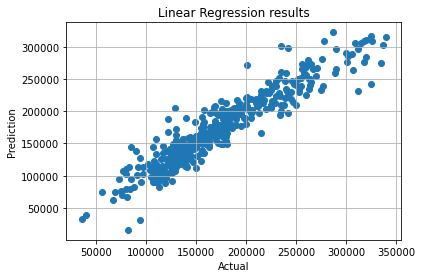

In [222]:
plt.scatter(y_test2, y_pred12)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Linear Regression results')
plt.grid()
plt.show()

_**SVM**_

SVMs assume that the data it works with is in a standard range, usually either 0 to 1, or -1 to 1 (roughly). So the normalization of feature vectors prior to feeding them to the SVM is very important.

In [223]:
clf2 = SVR(kernel='poly')   
clf2.fit(X_train3, y_train3)

SVR(kernel='poly')

In [224]:
y_pred2 = clf2.predict(X_test3)

In [225]:
mae, mse, rmse, r_squared = evaluation(y_test3, y_pred2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 0.06445340523974037
MSE: 0.007421770235876425
RMSE: 0.08614969666735005
R2 Score: 0.7822784692924196


In [226]:
results = results.append({'Model': 'SVM', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r_squared}, ignore_index=True)

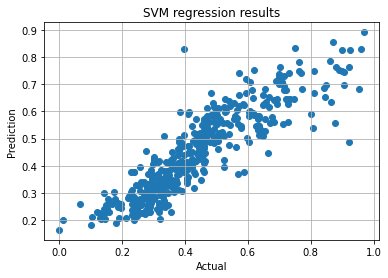

In [227]:
plt.scatter(y_test3, y_pred2)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('SVM regression results')
plt.grid()
plt.show()

In [196]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['poly','linear']}
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train3, y_train3)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1

[CV 1/5] END ................C=10, gamma=0.01, kernel=linear; total time=   1.0s
[CV 2/5] END ................C=10, gamma=0.01, kernel=linear; total time=   1.6s
[CV 3/5] END ................C=10, gamma=0.01, kernel=linear; total time=   0.5s
[CV 4/5] END ................C=10, gamma=0.01, kernel=linear; total time=   1.5s
[CV 5/5] END ................C=10, gamma=0.01, kernel=linear; total time=   0.7s
[CV 1/5] END .................C=10, gamma=0.001, kernel=poly; total time=   0.0s
[CV 2/5] END .................C=10, gamma=0.001, kernel=poly; total time=   0.0s
[CV 3/5] END .................C=10, gamma=0.001, kernel=poly; total time=   0.0s
[CV 4/5] END .................C=10, gamma=0.001, kernel=poly; total time=   0.0s
[CV 5/5] END .................C=10, gamma=0.001, kernel=poly; total time=   0.0s
[CV 1/5] END ...............C=10, gamma=0.001, kernel=linear; total time=   1.2s
[CV 2/5] END ...............C=10, gamma=0.001, kernel=linear; total time=   1.7s
[CV 3/5] END ...............

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['poly', 'linear']},
             verbose=3)

In [197]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVR(C=0.1, gamma=1, kernel='linear')


In [228]:
clf2_opt = SVR(C=0.1, gamma=0.1, kernel='linear')   
clf2_opt.fit(X_train3, y_train3)

SVR(C=0.1, gamma=0.1, kernel='linear')

In [229]:
y_pred2_opt = clf2_opt.predict(X_test3)

In [230]:
mae, mse, rmse, r_squared = evaluation(y_test3, y_pred2_opt)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 0.06118824274719089
MSE: 0.008536853328251543
RMSE: 0.09239509363733306
R2 Score: 0.7495669206965766


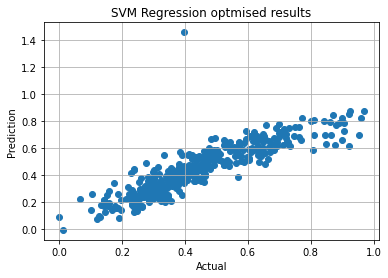

In [231]:
plt.scatter(y_test3, y_pred2_opt)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('SVM Regression optmised results')
plt.grid()
plt.show()

In [232]:
y_testsvm = y_test3.drop(y_test3.index[393]) #remove outlier
y_predsvm = np.delete(y_pred2_opt,393)

In [233]:
mae, mse, rmse, r_squared = evaluation(y_testsvm, y_predsvm)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 0.05880668414823446
MSE: 0.005868954211457061
RMSE: 0.07660910005643626
R2 Score: 0.8282182384751774


In [234]:
results = results.append({'Model': 'SVM Opt', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r_squared}, ignore_index=True)

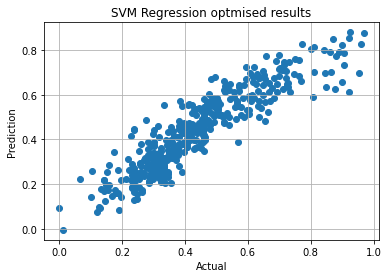

In [235]:
plt.scatter(y_testsvm, y_predsvm)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('SVM Regression optmised results')
plt.grid()
plt.show()

_**Decision Tree**_

In [236]:
clf3 = DecisionTreeClassifier()  
clf3.fit(X_train, y_train)

DecisionTreeClassifier()

In [237]:
y_pred3 = clf3.predict(X_test)

In [238]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred3)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 28073.62796208531
MSE: 1563676408.5379148
RMSE: 39543.3484740217
R2 Score: 0.537997898200915


In [239]:
results = results.append({'Model': 'Decision Tree', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r_squared}, ignore_index=True)

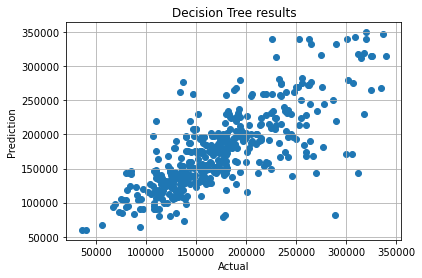

In [240]:
plt.scatter(y_test, y_pred3)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Decision Tree results')
plt.grid()
plt.show()

In [241]:
clf3_opt = DecisionTreeClassifier(criterion='entropy', max_depth=20)  
clf3_opt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [242]:
y_pred3_opt = clf3_opt.predict(X_test)

In [243]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred3_opt)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 26028.60663507109
MSE: 1375730514.0
RMSE: 37090.841376275086
R2 Score: 0.5935281842798716


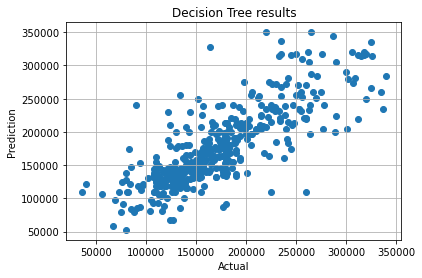

In [244]:
plt.scatter(y_test, y_pred3_opt)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Decision Tree results')
plt.grid()
plt.show()

In [245]:
results = results.append({'Model': 'Decision Tree Opt', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r_squared}, ignore_index=True)

_**Random Forest**_

In [246]:
clf4 = RandomForestRegressor() 
clf4.fit(X_train, y_train)

RandomForestRegressor()

In [247]:
y_pred4 = clf4.predict(X_test)

In [248]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred4)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 15955.86741706161
MSE: 545880040.7914416
RMSE: 23364.075859991586
R2 Score: 0.8387148870451855


In [249]:
results = results.append({'Model': 'Random Forest', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r_squared}, ignore_index=True)

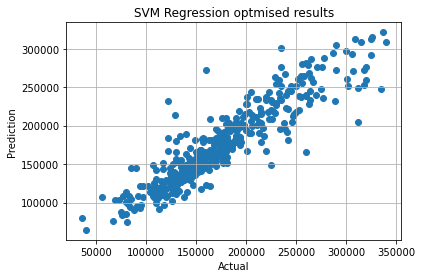

In [250]:
plt.scatter(y_test, y_pred4)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('SVM Regression optmised results')
plt.grid()
plt.show()

In [220]:
n_estimators = [400,500,600,] # number of trees in the random forest
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node

random_grid = {'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf}

In [221]:
from sklearn.model_selection import RandomizedSearchCV
clf_random = RandomizedSearchCV(estimator = clf4,param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2)

clf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total time=   5.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total time=   4.7s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total time=   4.8s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total time=   4.6s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=500; total time=   4.5s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=   4.1s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=   4.1s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=   4.2s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=   3.9s
[CV] END max_depth=10, m

[CV] END max_depth=70, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   3.5s
[CV] END max_depth=70, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   3.5s
[CV] END max_depth=70, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   3.6s
[CV] END max_depth=70, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   3.5s
[CV] END max_depth=70, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   4.0s
[CV] END max_depth=90, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  20.2s
[CV] END max_depth=90, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  18.8s
[CV] END max_depth=90, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   9.5s
[CV] END max_depth=90, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   7.8s
[CV] END max_depth=90, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total tim

[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=600; total time=   6.7s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=600; total time=   5.7s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=600; total time=   5.7s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=600; total time=   5.5s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   4.7s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   5.8s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   5.7s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   5.9s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   5.1s
[CV] END max_depth=60, min_samples_leaf=4, min_samples_split=10, n_estimators=500; tota

[CV] END max_depth=60, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   5.7s
[CV] END max_depth=60, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   6.2s
[CV] END max_depth=60, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   6.3s
[CV] END max_depth=110, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   4.2s
[CV] END max_depth=110, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   3.9s
[CV] END max_depth=110, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   3.7s
[CV] END max_depth=110, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   3.8s
[CV] END max_depth=110, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   3.6s
[CV] END max_depth=100, min_samples_leaf=3, min_samples_split=6, n_estimators=400; total time=   4.1s
[CV] END max_depth=100, min_samples_leaf=3, min_samples_split=6, n_estimators=40

[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=6, n_estimators=600; total time=   5.3s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=6, n_estimators=600; total time=   5.2s
[CV] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=500; total time=   4.4s
[CV] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=500; total time=   4.4s
[CV] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=500; total time=   4.5s
[CV] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=500; total time=   4.5s
[CV] END max_depth=100, min_samples_leaf=3, min_samples_split=2, n_estimators=500; total time=   4.4s
[CV] END max_depth=120, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   4.3s
[CV] END max_depth=120, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   4.0s
[CV] END max_depth=120, min_samples_leaf=4, min_samples_split=6, n_estimators=500; t

[CV] END max_depth=70, min_samples_leaf=3, min_samples_split=10, n_estimators=600; total time=   4.6s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   3.8s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   4.6s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   4.8s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   4.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   4.7s
[CV] END max_depth=120, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   5.8s
[CV] END max_depth=120, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   6.0s
[CV] END max_depth=120, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   6.8s
[CV] END max_depth=120, min_samples_leaf=1, min_samples_split=2, n_estimators=400; tota

[CV] END max_depth=120, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   3.1s
[CV] END max_depth=120, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   3.3s
[CV] END max_depth=120, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   3.3s
[CV] END max_depth=120, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   3.4s
[CV] END max_depth=120, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   3.2s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   4.2s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   4.1s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   4.1s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=6, n_estimators=400; total time=   4.0s
[CV] END max_depth=40, min_samples_leaf=1, min_samples_split=6, n_estimators=400;

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [400, 500, 600]},
                   verbose=2)

In [222]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', clf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [400, 500, 600], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4]} 

Best Parameters:  {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 60}  



In [251]:
clf4_opt = RandomForestRegressor(n_estimators=500, min_samples_split=2, min_samples_leaf = 1, max_features='auto', max_depth=60) 
clf4_opt.fit(X_train, y_train)

RandomForestRegressor(max_depth=60, n_estimators=500)

In [252]:
y_pred4_opt = clf4_opt.predict(X_test)

In [253]:
mae, mse, rmse, r_squared = evaluation(y_test, y_pred4_opt)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

MAE: 15976.415208530805
MSE: 553634285.1357157
RMSE: 23529.434441475973
R2 Score: 0.8364238265896095


In [254]:
results = results.append({'Model': 'Random Forest Opt', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r_squared}, ignore_index=True)

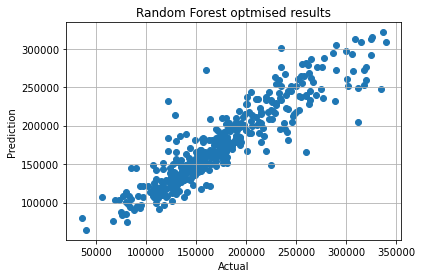

In [255]:
plt.scatter(y_test, y_pred4)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Random Forest optmised results')
plt.grid()
plt.show()

_**Model Comparison**_

In [256]:
results

Model           MAE           MSE          RMSE        R2
0      Linear regression  16117.051723  1.093256e+09  33064.423543  0.676988
1  Linear Regression Opt  14880.572207  4.117199e+08  20290.883352  0.878627
2                    SVM      0.064453  7.421770e-03      0.086150  0.782278
3                SVM Opt      0.058807  5.868954e-03      0.076609  0.828218
4          Decision Tree  28073.627962  1.563676e+09  39543.348474  0.537998
5      Decision Tree Opt  26028.606635  1.375731e+09  37090.841376  0.593528
6          Random Forest  15955.867417  5.458800e+08  23364.075860  0.838715
7      Random Forest Opt  15976.415209  5.536343e+08  23529.434441  0.836424

Better results are achieved for the optimised Linear Regression.

## Predicitions and Results <a class="anchor" id="pred"></a>

Finally, we will apply out models to a new fresh dataset:

In [257]:
df_val = pd.read_csv('HousePrices-FreshDataToPredict.csv') #read the dataset
df_val.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [258]:
#Data cleaning and formating
df_val = df_val.drop(columns=['MiscFeature', 'Fence', 'PoolQC', 'Alley'])
df_val[['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','GarageYrBlt','KitchenQual']] = df_val[['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','GarageYrBlt','KitchenQual']].replace(np.nan, 0)

for i in ['LotFrontage']:
    varMean = df_val[i].mean()
    df_val[i] = df_val[i].replace(np.nan, round(varMean))

df_val = df_val.drop(columns=['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch','MiscVal','YrSold','MoSold'])
df_val = df_val.drop(columns = ['PoolArea','ScreenPorch','3SsnPorch','OpenPorchSF','WoodDeckSF','Functional','2ndFlrSF','MasVnrArea','Utilities'])
df_val['GarageYrBlt'] = df_val['GarageYrBlt'].astype(int) 
df_val['YearBuilt'] = df_val['YearBuilt'].astype(int) 
df_val['YearRemodAdd'] = df_val['YearRemodAdd'].astype(int) 

In [259]:
#categorial data conversion
df_valf = pd.get_dummies(df_val, drop_first=True)

In [260]:
tot = []
for i in X_train.columns:
    if i not in df_valf.columns:
        tot.append(i)

In [261]:
for i in tot[1:]:
    df_valf[i] = 0

In [262]:
df_valf.reindex(columns=list(X_train.columns))

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  \
0          80.0    11622            5       1961          1961         468   
1          81.0    14267            6       1958          1958         923   
2          74.0    13830            5       1997          1998         791   
3          78.0     9978            6       1998          1998         602   
4          43.0     5005            8       1992          1992         263   
..          ...      ...          ...        ...           ...         ...   
95         72.0    10632            5       1917          1950           0   
96         60.0     9900            5       1915          1950        1026   
97         65.0     6001            6       1940          1950         368   
98         66.0     6449            4       1907          1950          73   
99         60.0     6048            5       1910          1950         736   

    BsmtUnfSF  TotalBsmtSF  1stFlrSF  GrLivArea  ...  SaleType_ConLI  \
0         270          882       896        896  ...               0   
1         406         1329      1329       1329  ...               0   
2         137          928       928       1629  ...               0   
3         324          926       926       1604  ...               0   
4        1017         1280      1280       1280  ...               0   
..        ...          ...       ...        ...  ...             ...   
95        689          689       725       1224  ...               0   
96        186         1212      1212       1392  ...               0   
97        232          600       600        919  ...               0   
98        634          707       942       1884  ...               0   
99        120          856       936       1680  ...               0   

    SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                0             0             0            1   
1                0             0             0            1   
2                0             0             0            1   
3                0             0             0            1   
4                0             0             0            1   
..             ...           ...           ...          ...   
95               0             0             0            0   
96               0             0             0            0   
97               0             0             0            1   
98               0             0             0            1   
99               0             0             0            0   

    SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                       0                     0                     0   
1                       0                     0                     0   
2                       0                     0                     0   
3                       0                     0                     0   
4                       0                     0                     0   
..                    ...                   ...                   ...   
95                      0                     0                     0   
96                      0                     0                     0   
97                      0                     0                     0   
98                      0                     0                     0   
99                      0                     0                     0   

    SaleCondition_Normal  SaleCondition_Partial  
0                      1                      0  
1                      1                      0  
2                      1                      0  
3                      1                      0  
4                      1                      0  
..                   ...                    ...  
95                     1                      0  
96                     1                      0  
97                     1                      0  
98                     0                      0  
99                

Now that the new set adequately formatted, we can apply our models

In [263]:
df_valfno = (df_valf - df_valf.min()) / (df_valf.max() - df_valf.min())

In [264]:
y_val1 = clf1.predict(df_valf)
y_val2 = clf2.predict(df_valf)
y_val2o = clf2_opt.predict(df_valf)
y_val3 = clf3.predict(df_valf)
y_val3o = clf3_opt.predict(df_valf)
y_val4 = clf4.predict(df_valf)
y_val4o = clf4_opt.predict(df_valf)

In [265]:
results2 = pd.DataFrame({'Linear':y_val1,'SVM':y_val2, 'SVM opt':y_val2o, 'DT':y_val3, 'DT opt':y_val3o, 'RF':y_val4, 'RF':y_val4o})
results2

Linear           SVM      SVM opt      DT  DT opt          RF
0  -196329.495333  2.979121e+07  1293.916035  100000  115000  117838.930
1   -68807.823028  3.923632e+07  1637.270516  167000  157900  138033.520
2   -53143.952597  3.779279e+07  1571.089931  108959  181000  183559.452
3    58105.859731  3.115360e+07  1296.361893  187000  181000  176998.482
4  -152909.254047  2.707957e+07   982.750270  130500  185850  201857.304
..            ...           ...          ...     ...     ...         ...
95 -172387.957515  2.474278e+07  1152.156842  135000  128000   94611.572
96  148338.154168  1.218063e+07  1326.301163   95000  118000  137100.970
97 -229550.357947  1.616367e+07   783.403211  104000   95000   87614.266
98   65140.105215  9.781010e+06  1028.995227  108959   82000  117295.480
99 -108874.164098  2.329606e+07  1038.832761   85000  159000  158271.410

[100 rows x 6 columns]

count       100.000000
mean     -80625.287600
std      101191.924972
min     -324678.182245
25%     -157971.618172
50%      -85450.357823
75%      -16485.545805
max      203005.187209
Name: Linear, dtype: float64


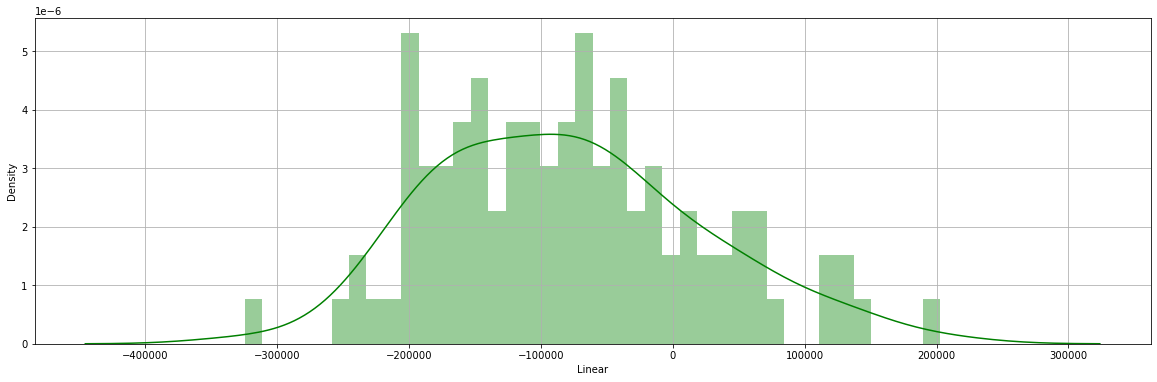

count    1.000000e+02
mean     3.075409e+07
std      1.368248e+07
min      6.510816e+06
25%      2.215272e+07
50%      2.898314e+07
75%      3.547452e+07
max      8.738956e+07
Name: SVM, dtype: float64


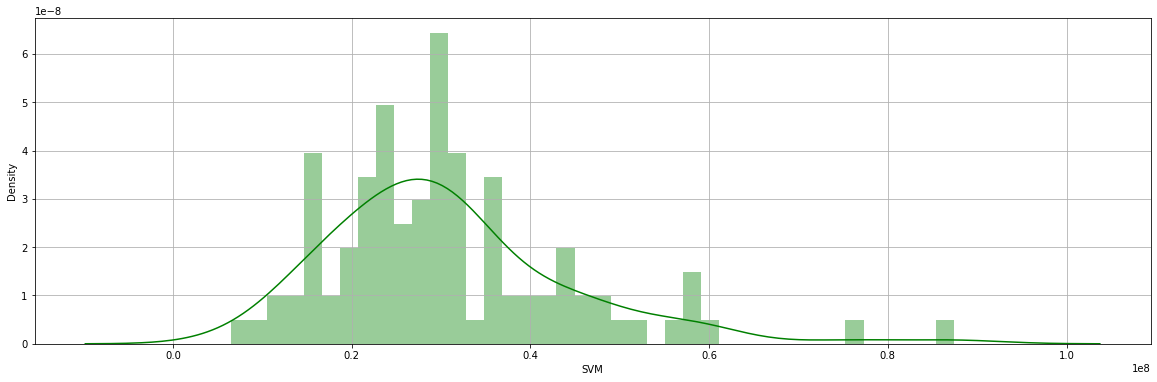

count     100.000000
mean     1235.667423
std       374.008092
min       465.154221
25%      1019.167418
50%      1236.643500
75%      1419.902533
max      2355.742997
Name: SVM opt, dtype: float64


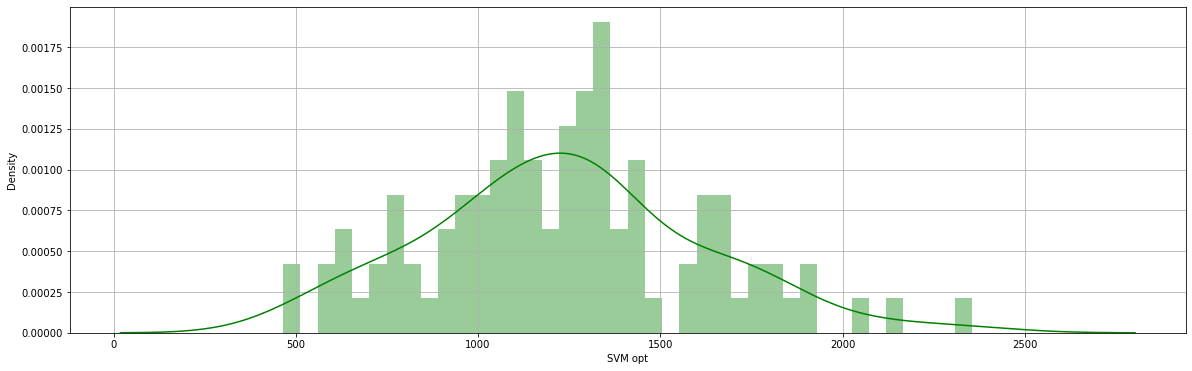

count       100.000000
mean     163910.930000
std       73576.580817
min       52500.000000
25%      104000.000000
50%      144000.000000
75%      189875.000000
max      348000.000000
Name: DT, dtype: float64


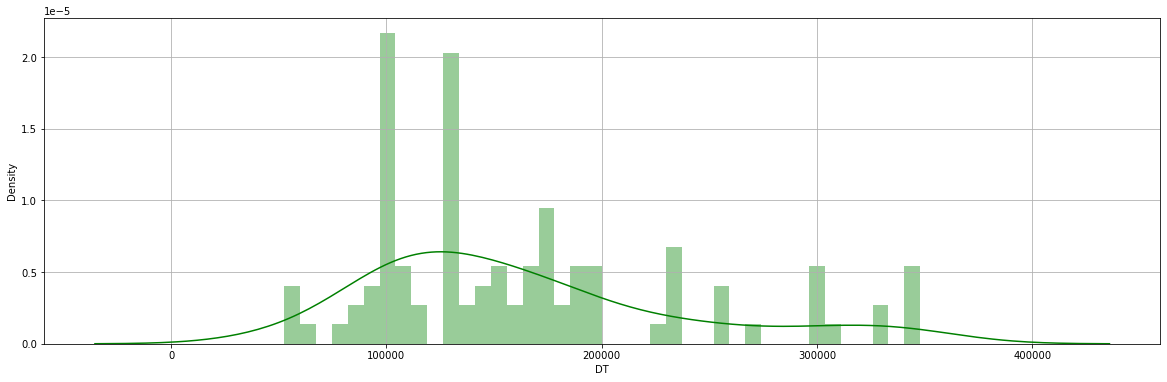

count       100.000000
mean     171881.090000
std       61376.484857
min       52500.000000
25%      129875.000000
50%      158950.000000
75%      197375.000000
max      335000.000000
Name: DT opt, dtype: float64


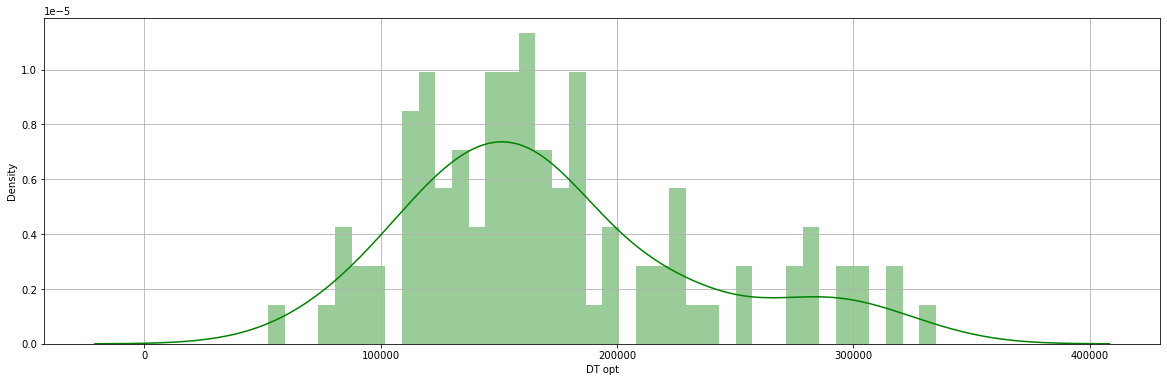

count       100.000000
mean     163447.700320
std       55919.552054
min       68668.094000
25%      122302.016500
50%      157555.580000
75%      189553.693500
max      309426.120000
Name: RF, dtype: float64


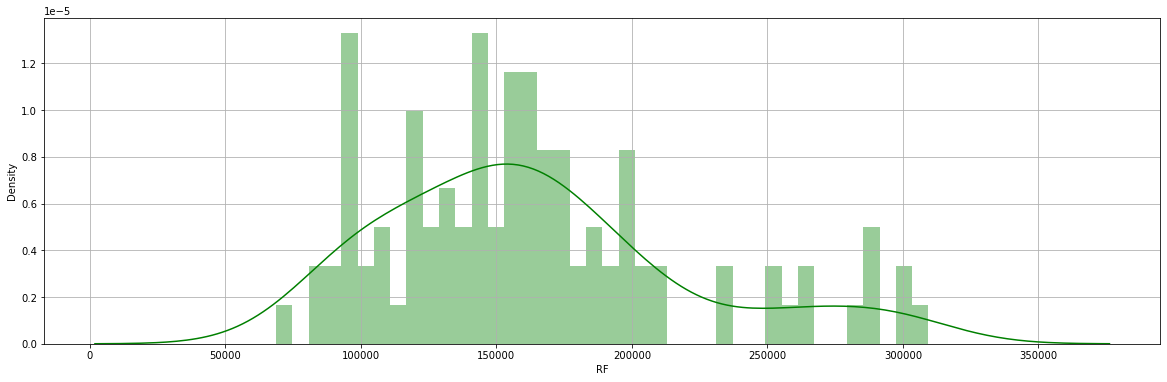

In [266]:
for i in results2.columns:
    print(results2[i].describe())
    plt.figure(figsize=(20, 6))
    sns.distplot(results2[i], color='g', bins=40, hist_kws={'alpha': 0.4});
    plt.grid()
    plt.show()

## Discussion <a class="anchor" id="discussion"></a>

Since we have obtained in the training data better results for Linear regression, one possible path is to explore other variations, such as the Lasso regression and the Ridge regression to compare results. An alteration in the variables used in each model can also possibly yield better results, as well remove variables that have lower correlation coefficients, for example, below 0.5.

As for the other models, it would also be intersting to explore more in depth how their parameters affect accuary, as well as validate our results with a new fresh set of data that contains the SalePrice variable, so that it could be compared to the predicted.